# 環境構築



*   Pythonモジュールへのパス追加





In [3]:
!pwd

/mnt/MachineLearning/NoteBook/NumDropletsRoI


In [4]:
# import os

# os.chdir("/mnt/MachineLearning")

In [5]:
import sys
sys.path.append('/mnt/MachineLearning/modules')

In [6]:
%matplotlib inline
import os
import glob
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import interpolate
import show_mod

# 前処理

In [4]:
#読み込むデータのパスの設定

# data_path = './data'
# input_list = glob.glob(data_path+"/*"+"/inputdata.csv")

# input_list

In [5]:
#input(空調条件等)の読み込み
# df_input = None

# for input_fname in input_list:
#     df_read = pd.read_csv(input_fname, index_col="case_name")
#     if df_input is None:
#         df_input = df_read
#     else:
#         df_input = pd.concat([df_input, df_read])

# df_input

In [6]:
#空調条件のみ抽出
# df_meta = df_input.loc[:, ['aircon', 'ventilation', 'exhaust']]

# df_meta

In [7]:
#排気口位置a,b,offをダミー変数化

# df_meta = pd.get_dummies(df_meta, columns=['exhaust'])
# # dummies = pd.get_dummies(df_input['exhaust'])
# # df_input.drop("exhaust", axis=1, inplace=True)
# # df_input = pd.concat([df_input, dummies], axis=1)
# # df_input = df_input.reindex(columns=['aircon','ventilation','exhaust_a','b','off'
# #           ,'1_x','1_y','1_z','1_angle','2_x','2_y','2_z','2_angle','3_x','3_y','3_z','3_angle'
# #           ,'4_x','4_y','4_z','4_angle','5_x','5_y','5_z','5_angle',"office_size_x","office_size_y"
# #           ,"aircon_position_x","aircon_position_y"])

# df_meta

# データ追加（2022/10/26）

- データ数：from 263 to 431
- オフィス数：from 9 to 15 (ID : 1,2,3,4,5,6,7,8,9,10,14,15,16,22,28)

In [8]:
# df_count = pd.read_csv("./CountResults/data_added_221018/sitting/count_from2sec_patientAverage.csv", index_col="casename")
df_count = pd.read_csv("/mnt/MachineLearning/CountResults/data_added_221018/sitting/count_from2sec_patientAverage.csv")
df_count

,casename,num_drop,volume[ml],RoI
0,office2_0_0,6739.4,0.000067,204.224242
1,office2_0_164_aout,7865.4,0.000063,238.345455
2,office2_0_164_bout,6049.8,0.000062,183.327273
3,office2_0_246_aout,7934.4,0.000050,240.436364
4,office2_0_246_bout,7662.0,0.000082,232.181818
...,...,...,...,...
426,office3_960_164_bout,5117.4,0.000075,155.072727
427,office3_960_246_aout,4428.0,0.000073,134.181818
428,office3_960_246_bout,3890.0,0.000066,117.878788
429,office3_960_82_aout,5221.2,0.000072,158.218182


In [9]:
def get_val_from_casename(casename:str, index:int):
    return float(casename.split("_")[index])

print(get_val_from_casename("office2_0_164_aout", 2))

164.0


In [10]:
def get_exhaust_from_casename(casename:str):
    s_split = casename.split("_")
    if len(s_split) == 4:
        exhaust_str = s_split[3]
        if exhaust_str == "aout":
            exhaust = "a"
        elif exhaust_str == "bout":
            exhaust = "b"
    else:
        exhaust = "off"
        
    return exhaust

print(get_exhaust_from_casename("office2_0_164"))

off


In [11]:
# df_count["aircon"] = df_count["casename"].apply(get_val_from_casename, args=(1,))
# df_count["ventilation"] = df_count["casename"].apply(get_val_from_casename, args=(2,))
# df_count["exhaust"] = df_count["casename"].apply(get_exhaust_from_casename)
                                                     
# df_count

In [12]:
# df_summary = df_count

In [13]:
# df_summary.to_csv("/mnt/MachineLearning/data/summary_221015.csv", index=False)

# データ取り込み

In [7]:
df_summary = pd.read_csv("/mnt/MachineLearning/data/summary_20221216.csv")

df_summary

,case_name,office,aircon,ventilation,exhaust,n_from2sec,n_from2sec/S,countTimeMean_sit,countTimeMean_sit2stand
0,office2_0_0,office2,0.0,0.0,off,6739.4,204.224242,902.212978,3665.252246
1,office2_0_164_aout,office2,0.0,164.0,a,7865.4,238.345455,594.272879,3491.917804
2,office2_0_164_bout,office2,0.0,164.0,b,6049.8,183.327273,432.678869,2354.737770
3,office2_0_246_aout,office2,0.0,246.0,a,7934.4,240.436364,326.691514,2902.480532
4,office2_0_246_bout,office2,0.0,246.0,b,7662.0,232.181818,562.535441,2757.177704
...,...,...,...,...,...,...,...,...,...
426,office3_960_164_bout,office3,960.0,164.0,b,5117.4,155.072727,779.372047,3209.723128
427,office3_960_246_aout,office3,960.0,246.0,a,4428.0,134.181818,1662.486855,3671.024626
428,office3_960_246_bout,office3,960.0,246.0,b,3890.0,117.878788,1343.338436,3968.834276
429,office3_960_82_aout,office3,960.0,82.0,a,5221.2,158.218182,1130.875541,4683.139767


In [8]:
#排気口位置a,b,offをダミー変数化

df_total = pd.get_dummies(df_summary, columns=['exhaust'])
df_total

,case_name,office,aircon,ventilation,n_from2sec,n_from2sec/S,countTimeMean_sit,countTimeMean_sit2stand,exhaust_a,exhaust_b,exhaust_off
0,office2_0_0,office2,0.0,0.0,6739.4,204.224242,902.212978,3665.252246,0,0,1
1,office2_0_164_aout,office2,0.0,164.0,7865.4,238.345455,594.272879,3491.917804,1,0,0
2,office2_0_164_bout,office2,0.0,164.0,6049.8,183.327273,432.678869,2354.737770,0,1,0
3,office2_0_246_aout,office2,0.0,246.0,7934.4,240.436364,326.691514,2902.480532,1,0,0
4,office2_0_246_bout,office2,0.0,246.0,7662.0,232.181818,562.535441,2757.177704,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
426,office3_960_164_bout,office3,960.0,164.0,5117.4,155.072727,779.372047,3209.723128,0,1,0
427,office3_960_246_aout,office3,960.0,246.0,4428.0,134.181818,1662.486855,3671.024626,1,0,0
428,office3_960_246_bout,office3,960.0,246.0,3890.0,117.878788,1343.338436,3968.834276,0,1,0
429,office3_960_82_aout,office3,960.0,82.0,5221.2,158.218182,1130.875541,4683.139767,1,0,0


In [9]:
df_total = df_total.set_index('case_name')

In [10]:
df_total["n_from2sec/S"]

case_name
office2_0_0             204.224242
office2_0_164_aout      238.345455
office2_0_164_bout      183.327273
office2_0_246_aout      240.436364
office2_0_246_bout      232.181818
                           ...    
office3_960_164_bout    155.072727
office3_960_246_aout    134.181818
office3_960_246_bout    117.878788
office3_960_82_aout     158.218182
office3_960_82_bout     160.024242
Name: n_from2sec/S, Length: 431, dtype: float64

In [11]:
# binning
# labels=False: index_labeling
df_total["n_from2sec/S_bin"] = pd.qcut(df_total["n_from2sec/S"], 4, labels=False)

df_total

,office,aircon,ventilation,n_from2sec,n_from2sec/S,countTimeMean_sit,countTimeMean_sit2stand,exhaust_a,exhaust_b,exhaust_off,n_from2sec/S_bin
case_name,,,,,,,,,,,
office2_0_0,office2,0.0,0.0,6739.4,204.224242,902.212978,3665.252246,0,0,1,3
office2_0_164_aout,office2,0.0,164.0,7865.4,238.345455,594.272879,3491.917804,1,0,0,3
office2_0_164_bout,office2,0.0,164.0,6049.8,183.327273,432.678869,2354.737770,0,1,0,2
office2_0_246_aout,office2,0.0,246.0,7934.4,240.436364,326.691514,2902.480532,1,0,0,3
office2_0_246_bout,office2,0.0,246.0,7662.0,232.181818,562.535441,2757.177704,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...
office3_960_164_bout,office3,960.0,164.0,5117.4,155.072727,779.372047,3209.723128,0,1,0,1
office3_960_246_aout,office3,960.0,246.0,4428.0,134.181818,1662.486855,3671.024626,1,0,0,0
office3_960_246_bout,office3,960.0,246.0,3890.0,117.878788,1343.338436,3968.834276,0,1,0,0


In [12]:
# # df_meta.join(df_count)
# df_total = pd.merge(df_meta, df_count, left_index=True, right_index=True)

# df_total

In [13]:
df_total.std(numeric_only=True)

aircon                     360.876287
ventilation                 83.985694
n_from2sec                 921.844114
n_from2sec/S                36.376848
countTimeMean_sit          219.342164
countTimeMean_sit2stand    758.168789
exhaust_a                    0.495869
exhaust_b                    0.495869
exhaust_off                  0.344132
n_from2sec/S_bin             1.120371
dtype: float64

In [14]:
from sklearn import preprocessing

#meta(condifion of air)データの標準化
stdscaler = preprocessing.StandardScaler()
df_meta = df_total[["aircon", "ventilation", "exhaust_a", "exhaust_b", "exhaust_off"]]
stdscaler.fit(df_meta)
df_meta_array = stdscaler.transform(df_meta)

df_meta_standardized = pd.DataFrame(df_meta_array, index=df_total.index, columns=df_meta.columns)
# df_total_standardized = pd.DataFrame(df_total_tf, index=df_total.index, columns=df_total.columns)
df_meta_standardized

# df_input_std = df_input.copy()
# for i in range(int(input_std.shape[1])):
#     df_input_std.iloc[:, i] = input_std[:, i]


,aircon,ventilation,exhaust_a,exhaust_b,exhaust_off
case_name,,,,,
office2_0_0,-1.384552,-1.666952,-0.871311,-0.871311,2.510993
office2_0_164_aout,-1.384552,0.288031,1.147695,-0.871311,-0.398249
office2_0_164_bout,-1.384552,0.288031,-0.871311,1.147695,-0.398249
office2_0_246_aout,-1.384552,1.265523,1.147695,-0.871311,-0.398249
office2_0_246_bout,-1.384552,1.265523,-0.871311,1.147695,-0.398249
...,...,...,...,...,...
office3_960_164_bout,1.278731,0.288031,-0.871311,1.147695,-0.398249
office3_960_246_aout,1.278731,1.265523,1.147695,-0.871311,-0.398249
office3_960_246_bout,1.278731,1.265523,-0.871311,1.147695,-0.398249


In [15]:
# df_ml = df_meta_standardized.join(df_total[["office", "n_from2sec/S", "countTimeMean_sit2stand"]])
df_ml = df_meta_standardized.join(df_total[["office", "n_from2sec/S_bin"]])
df_ml

,aircon,ventilation,exhaust_a,exhaust_b,exhaust_off,office,n_from2sec/S_bin
case_name,,,,,,,
office2_0_0,-1.384552,-1.666952,-0.871311,-0.871311,2.510993,office2,3
office2_0_164_aout,-1.384552,0.288031,1.147695,-0.871311,-0.398249,office2,3
office2_0_164_bout,-1.384552,0.288031,-0.871311,1.147695,-0.398249,office2,2
office2_0_246_aout,-1.384552,1.265523,1.147695,-0.871311,-0.398249,office2,3
office2_0_246_bout,-1.384552,1.265523,-0.871311,1.147695,-0.398249,office2,3
...,...,...,...,...,...,...,...
office3_960_164_bout,1.278731,0.288031,-0.871311,1.147695,-0.398249,office3,1
office3_960_246_aout,1.278731,1.265523,1.147695,-0.871311,-0.398249,office3,0
office3_960_246_bout,1.278731,1.265523,-0.871311,1.147695,-0.398249,office3,0


In [22]:
# import numpy as np
# import pointCloud_sampling as pcs

# # rng = np.random.default_rng()

# #予め点群をサンプリングしておいたものを取得
# sampledPointCloud_dict = pcs.read_sampledPointCloud('/content/drive/MyDrive/ML/PointNetTrial/data/pointCloud_sampled')

# sampledPointCloud_dict

In [23]:
officemodel_path = '/mnt/MachineLearning/Office3DModel/model_origin'
# office_list = os.listdir(officemodel_path)
# case_list = [s.replace('office', 'case') for s in os.listdir(data_path)]
case_list = os.listdir(officemodel_path)
print(case_list)
# office_list = ['office1', 'office2', 'office3', 'office7', 'office10', 'office15', 'office16', 'office22', 'office28']
# print(office_list)

['case1', 'case10', 'case11', 'case12', 'case13', 'case14', 'case15', 'case16', 'case17', 'case18', 'case19', 'case2', 'case20', 'case21', 'case22', 'case23', 'case24', 'case25', 'case26', 'case27', 'case28', 'case29', 'case3', 'case30', 'case31', 'case32', 'case33', 'case4', 'case5', 'case6', 'case7', 'case8', 'case9']


点数memo

- aircon: 580
- airvent: 8
- room: 20
- desks: 1800~1825
- bosy: 約26500

In [ ]:
import os
import random
import numpy as np
import json
import glob
from stl import mesh
from enum import Enum, auto

# 列挙型の定義
class OfficePart(Enum):
    aircon = auto()
    airvent = auto()
    body = auto()
    room = auto()
    desks = auto()


"""
データの前処理

オフィスモデル（STLファイル）を読み込み、点群情報のみ取り出し、
ランダムサンプリングで指定個の点群(ndarray)にする。


aircon: air conditioner
airvent: hole of Air vent
body: body of human
layout: deskd and walls
"""


# 列挙型のメンバーの列挙
for part in OfficePart:
    print(part)
    
NUM_POINTS = 2048

pointCloud_dict = {}
for casename in case_list:
    officename = casename.replace('case', 'office') 
    
    #まずは単純に読み込み、辞書に格納
    pc_dict = {}
    for part in OfficePart:
        path = officemodel_path + '/' + casename + '/' + part.name
        # print(path)
        stl_list = glob.glob(path + "/*.stl")
        # print(stl_list)
        pc_list = []
        for stlfname in stl_list:
            for mesh_read in mesh.Mesh.from_multi_file(stlfname):
                points = mesh_read.points.reshape([-1, 3])
                pc_list.append(points)

        points_concat = np.concatenate(pc_list)
        points_concat = np.unique(points_concat, axis=0)
        pc_dict[part] = points_concat.copy()
                        
            
    """
    ここから都合合わせのため調整
    """
    pc_dict_modified = {}

    pc_dict_modified["aircon"] = pc_dict[OfficePart.aircon]
    pc_dict_modified["airvent"] = pc_dict[OfficePart.airvent]
    
    pc_body = pc_dict[OfficePart.body]
    rand_list = random.sample(range(len(pc_body)), k=2048)
    pc_dict_modified["body"] = pc_body[rand_list, :]
    
    pc_room = pc_dict[OfficePart.room]
    num_sampling_desks = 1024 - len(pc_room)
    print("num_sampling_desks = ", num_sampling_desks)
    pc_desks = pc_dict[OfficePart.desks]
    rand_list = random.sample(range(len(pc_desks)), k=num_sampling_desks)
    pc_sampled_desks = pc_desks[rand_list, :]
    pc_dict_modified["layout"] = np.concatenate([pc_room, pc_sampled_desks])
    
    
    pointCloud_dict[officename] = pc_dict_modified


In [16]:
pcFilePath = '/mnt/MachineLearning/Office3DModel/PointCloud_sampled/PointCloud_dict_test.npy'

In [17]:
# import numpy as np

# np.save(pcFilePath, pointCloud_dict, allow_pickle='TRUE')

In [18]:
import numpy as np

a = np.load(pcFilePath, allow_pickle='TRUE')    # 0-D Array で返ってくる
pointCloud_dict = a.item()
pointCloud_dict

{'office1': array([[2.5     , 2.25    , 2.6     ],
        [2.5     , 2.375   , 2.6     ],
        [2.5     , 2.45    , 2.6     ],
        ...,
        [3.825   , 1.733333, 0.7     ],
        [0.925   , 2.875   , 0.05    ],
        [1.495   , 1.278333, 0.53    ]], dtype=float32),
 'office10': array([[3.      , 2.5     , 2.6     ],
        [3.      , 2.625   , 2.6     ],
        [3.      , 2.7     , 2.6     ],
        ...,
        [3.9725  , 2.275   , 0.7     ],
        [3.065   , 4.078333, 0.48    ],
        [1.485   , 2.533333, 0.7     ]], dtype=float32),
 'office11': array([[3.       , 2.5      , 2.6      ],
        [3.       , 2.625    , 2.6      ],
        [3.       , 2.7      , 2.6      ],
        ...,
        [3.96     , 4.305    , 0.53     ],
        [3.45     , 3.183333 , 0.75     ],
        [2.7      , 5.1      , 0.2833333]], dtype=float32),
 'office12': array([[3.      , 2.5     , 2.6     ],
        [3.      , 2.625   , 2.6     ],
        [3.      , 2.7     , 2.6     ],
     

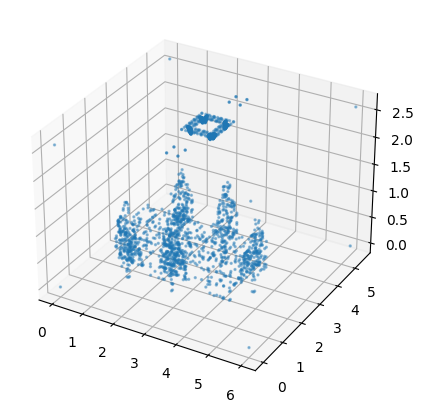

In [19]:
from matplotlib import pyplot as plt

def plot3d_points(point_cloud):
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(projection="3d")
    ax.scatter(point_cloud[:, 0], point_cloud[:, 1], point_cloud[:, 2], alpha=0.4, s=2)
    # ax.set_axis_off()
    plt.show()
    
plot3d_points(pointCloud_dict['office1'])

In [20]:
# import numpy as np
# '''
# 点群シャッフルによるデータ増強
# よく考えると無意味だと思う
# '''
# rng = np.random.default_rng()

# pointCloud_augumented_dict = {}
# for office_name, pointCloud in sampledPointCloud_dict.items():
#     pc_list = []
#     for i in range(4):
#         pc = pointCloud.copy()

#         if i >= 1:
#             #点群のシャッフル
#             rng.shuffle(pc)

#         pc_list.append(pc)

#     pointCloud_augumented_dict[office_name] = pc_list

# pointCloud_augumented_dict

In [21]:
# plot3d_points(pointCloud_augumented_dict['office10'][0])
# plot3d_points(pointCloud_augumented_dict['office10'][1])
# plot3d_points(pointCloud_augumented_dict['office10'][2])
# plot3d_points(pointCloud_augumented_dict['office10'][3])

In [22]:
# def get_augumented_dataset():
#     '''
#     点群データ増強に合わせて、メタデータや感染リスク分布のデータも複製して増やす
#     '''
#     case_index_list = list(df_total.index)
#     # case_index_list = list(df_total["casename"])


#     case_index_augumented_list = []

#     pointCloudArray_list = []
#     metaArray_list = []

#     RoI_list = []

#     for case_index in case_index_list:
#         office_name = case_index.split('_', maxsplit=1)[0]
#         pc_list = pointCloud_augumented_dict[office_name]
#         for augumentID, pointCloud in enumerate(pc_list):
#             case_index_augumented_list.append(case_index + '-' + str(augumentID))
#             pointCloudArray_list.append(pointCloud)
#             metaArray_list.append(df_meta_standardized.loc[case_index])
#             # RoI_list.append(df_total["RoI"].loc[case_index])
#             RoI_list.append(df_total["count_timeMean"].loc[case_index])

#     case_index_array = np.array(case_index_augumented_list)
#     metaArray = np.array(metaArray_list)
#     RoIArray = np.array(RoI_list)

#     pointCloudArray = np.array(pointCloudArray_list)
    
#     return case_index_array, pointCloudArray, metaArray, RoIArray

# X_index, X_pc, X_meta, y = get_augumented_dataset()

In [23]:
# def get_officeDataset(officename_list:list, df_core:pd.DataFrame, pointCloud_dict:dict, shuffle:bool):
#     """
#     Return a certain office Dataset.
#     You can specify List of offices.
#     """
    
#     df_main = pd.DataFrame()
    
#     for officename in officename_list:
#         df = df_core[ df_core["office"]==officename ]
#         df_main = pd.concat([df_main, df])
        
#     if shuffle:
#         df_main = df_main.sample(frac=1, random_state=0)
        
#     # meke Dictionary of pointCloudList in order of MainDataFrame
#     pc_list_dict = {"aircon":[], "airvent":[], "body":[], "layout":[], }
#     for officename in df_main["office"]:
#         for key, pc_list in pc_list_dict.items():
#             pc_list.append(pointCloud_dict[officename][key])
            
#     # make input-Dictionary and to ND-Array
#     input_dict = {"meta":df_main[["aircon", "ventilation", "exhaust_a", "exhaust_b", "exhaust_off", ]]}
#     for key, pc in pc_list_dict.items():
#         input_dict[f"pointCloud_{key}"] = np.array(pc)
                
#     return input_dict, df_main["countTimeMean_sit2stand"]
        

In [24]:
def get_officeDataset(
    officename_list:list,
    df_core:pd.DataFrame,
    pointCloud_dict:dict,
    objective_col:str,
    shuffle:bool,
    standardize_pointCloud=True
):
    """
    Return a certain office Dataset.
    You can specify List of offices.
    """
    
    df_main = pd.DataFrame()
    
    for officename in officename_list:
        df = df_core[ df_core["office"]==officename ]
        df_main = pd.concat([df_main, df])
        
    if shuffle:
        df_main = df_main.sample(frac=1, random_state=0)
        
    # meke Dictionary of pointCloudList in order of MainDataFrame
    pc_list = []
    for officename in df_main["office"]:
        pc_list.append(pointCloud_dict[officename])
        
    pc_array = np.array(pc_list)
    
    if standardize_pointCloud:
        pc_array = ( pc_array - pc_array.mean() ) / pc_array.std()
            
    # make input-Dictionary and to ND-Array
    input_dict = {
        "meta":df_main[["aircon", "ventilation", "exhaust_a", "exhaust_b", "exhaust_off", ]],
        "pointCloud":pc_array,
    }
                
    # return input_dict, df_main["countTimeMean_sit2stand"]
    # return input_dict, df_main["n_from2sec/S"]
    return input_dict, df_main[objective_col]
        

In [25]:
X_dict_sample, y_sample = get_officeDataset(
    list(df_ml["office"].unique()),
    df_ml, pointCloud_dict, "n_from2sec/S_bin",
    standardize_pointCloud=True,
    shuffle=True
)

In [26]:
X_dict_sample

{'meta':                         aircon  ventilation  exhaust_a  exhaust_b  exhaust_off
 case_name                                                                     
 office6_0_246_aout   -1.384552     1.265523   1.147695  -0.871311    -0.398249
 office5_660_0         0.446455    -1.666952  -0.871311  -0.871311     2.510993
 office15_960_82_aout  1.278731    -0.689460   1.147695  -0.871311    -0.398249
 office4_660_82_bout   0.446455    -0.689460  -0.871311   1.147695    -0.398249
 office2_360_246_aout -0.385821     1.265523   1.147695  -0.871311    -0.398249
 ...                        ...          ...        ...        ...          ...
 office10_0_246_bout  -1.384552     1.265523  -0.871311   1.147695    -0.398249
 office4_360_82_bout  -0.385821    -0.689460  -0.871311   1.147695    -0.398249
 office1_960_246_aout  1.278731     1.265523   1.147695  -0.871311    -0.398249
 office15_660_82_aout  0.446455    -0.689460   1.147695  -0.871311    -0.398249
 office6_960_0         1.278731 

In [27]:
y_sample

case_name
office6_0_246_aout      2
office5_660_0           3
office15_960_82_aout    1
office4_660_82_bout     0
office2_360_246_aout    3
                       ..
office10_0_246_bout     1
office4_360_82_bout     1
office1_960_246_aout    3
office15_660_82_aout    1
office6_960_0           3
Name: n_from2sec/S_bin, Length: 431, dtype: int64

In [28]:
y_sample.nunique()

4

In [29]:
# def get_dataset(df_main, df_meta):
#     '''
#     説明変数と目的変数をNDArrayに変換する
#     '''
    
#     pc_aircon_list = []
#     pc_airvent_list = []
#     pc_body_list = []
#     pc_layout_list = []
    
#     metaArray_list = []

#     RoI_list = []

#     for index, row in df_total.iterrows():
#         office_name = row["office"]
#         pc_aircon_list.append(pointCloud_dict[office_name]["aircon"])
#         pc_airvent_list.append(pointCloud_dict[office_name]["airvent"])
#         pc_body_list.append(pointCloud_dict[office_name]["body"])
#         pc_layout_list.append(pointCloud_dict[office_name]["layout"])
        
#         metaArray_list.append(df_meta_standardized.loc[index])
            
#         RoI_list.append(df_main["countTimeMean_sit2stand"].loc[index])
#         # RoI_list.append(df_main["count_timeMean"].loc[case_index])

#     officename_array = df_total["office"].to_numpy()
#     metaArray = np.array(metaArray_list)
#     RoIArray = np.array(RoI_list)

#     pc_aircon_array = np.array(pc_aircon_list)
#     pc_airvent_array = np.array(pc_airvent_list)
#     pc_body_array = np.array(pc_body_list)
#     pc_layout_array = np.array(pc_layout_list)
    
#     pc_array_dict = {"aircon":pc_aircon_array, "airvent":pc_airvent_array, "body":pc_body_array, "layout":pc_layout_array}
    
#     return officename_array, pc_array_dict, metaArray, RoIArray.reshape(-1,1)


In [30]:
# X_officename, X_pc_dict, X_meta, y = get_dataset(df_total, df_meta)

# # print(X_pc.max())
# # X_pc /= X_pc.max() #Normalization
# # print(X_pc.max())

# for key, X_pc in X_pc_dict.items():
#     #Standardization
#     X_pc_dict[key] = ( X_pc - X_pc.mean() ) / X_pc.std()
    
    
# # l_mul = map(lambda X_pc: ( X_pc - X_pc.std() ) / X_pc.std(), X_pc_list)
# # # print(list(l_mul))

# # X_pc_airvent.std()

In [31]:
import sys

def standardization_test(X:np.ndarray):
    """
    標準化されているかをテスト
    """
    threshold = 1.e-5
    
    if abs(X.mean()) > threshold:
        sys.stderr.write(f'StandardizationError: mean= {X.mean()}\n')
        
    if abs(X.std() - 1.) > threshold:
        sys.stderr.write(f'StandardizationError: std= {X.std()}')
        

In [32]:
# print(X_officename.shape)

for key, value in X_dict_sample.items():
    if key == "meta":
        for column_name, item in value.iteritems():
            X = item.values
            standardization_test(X)
            print(column_name)
            print(X.shape, X.mean(), X.std())
        
    else:
        standardization_test(value)
        
        standardization_test(X)
        print(key)
        print(X.shape, X.mean(), X.std())
    
# print(X_meta.shape, X_meta.mean(), X_meta.var())

# print(y.shape, y.mean(), y.var())

aircon
(431,) 5.976142499142374e-17 1.0
ventilation
(431,) 1.772235361814635e-16 0.9999999999999999
exhaust_a
(431,) -4.12147758561543e-17 0.9999999999999999
exhaust_b
(431,) -2.472886551369258e-17 0.9999999999999998
exhaust_off
(431,) -2.2668126720884866e-17 1.0
pointCloud
(431,) -2.2668126720884866e-17 1.0


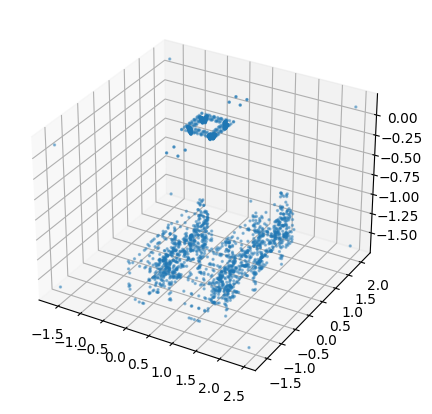

In [33]:
plot3d_points(X_dict_sample["pointCloud"][0, :,:])

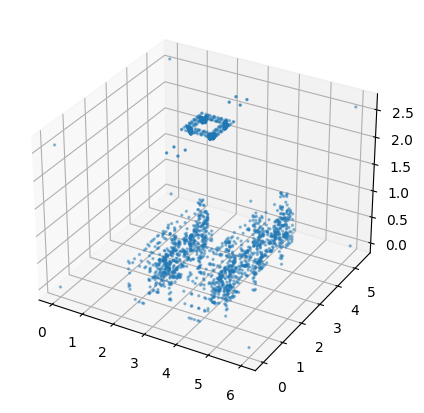

In [34]:
plot3d_points(pointCloud_dict["office6"])

# チューニング

In [35]:
office_list = list(df_total["office"].unique())
# office_list = ["office1", "office2", "office3", "office4", "office5", "office6", ]

office_list

['office2',
 'office15',
 'office14',
 'office1',
 'office22',
 'office6',
 'office4',
 'office16',
 'office8',
 'office9',
 'office7',
 'office10',
 'office28',
 'office5',
 'office3']

In [36]:
test_office_list = ["office1", "office7", "office10", "office16", "office22", "office28", ]
# test_office_list = office_list

test_office_list

['office1', 'office7', 'office10', 'office16', 'office22', 'office28']

In [37]:
from tensorflow.python.client import device_lib; print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12977095142919276741
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9739763712
locality {
  bus_id: 1
  links {
  }
}
incarnation: 12932115773935301294
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3080 Ti, pci bus id: 0000:06:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


2022-12-22 03:12:04.786663: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1553] Created device /device:GPU:0 with 9288 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080 Ti, pci bus id: 0000:06:00.0, compute capability: 8.6


In [38]:
# def conv_bn(x, filters):
#     x = layers.Conv1D(filters, kernel_size=1, padding="valid")(x)
#     x = layers.BatchNormalization(momentum=0.0)(x)
#     return layers.Activation("relu")(x)


In [39]:
from tensorflow import keras
import PointNet

def myPointNet(trial, input_pointCloud:keras.Input, suffix:str=None):
    
    if suffix is None:
        hp_conv_layers_name = 'conv_layers'
    else:
        hp_conv_layers_name = f'conv_layers_{suffix}'
        
    hp_conv_layers = trial.suggest_int(hp_conv_layers_name, 1, 3, step=1)
    
    x = input_pointCloud
    for i in range(hp_conv_layers):
        hp_filters = trial.suggest_int(f'filters_{suffix}-{i}', 32, 256, step=32)
        
        x = PointNet.conv_bn(x, hp_filters)
        
#         x = keras.layers.Conv1D(hp_filters, kernel_size=1, padding="valid")(x)
#         x = keras.layers.BatchNormalization(momentum=0.99)(x)       
#         x = keras.layers.ReLU()(x)
    
    return keras.layers.GlobalMaxPooling1D()(x)

In [40]:
from PointNet import conv_bn
from tensorflow import keras

db_path = '/mnt/MachineLearning/OptunaLog/classification.db'


def total_model_builder(trial):
    """
    感染リスク分布予測モデル

    順序不変性モデルに、メタデータ（空調条件）を合流させ、MLPで感染リスク予測

    KerasTunerから呼び出され、ハイパーパラメータをチューニングする
    """
    
    input_list = []
    features_list = []
    for key, value in X_dict_sample.items():
        if key == "meta":
            # MetaData
            input_meta = keras.Input(shape=(len(value.columns), ), name='meta')
            
            # append metaData to input_list
            input_list.append(input_meta)

            # append metaData to features_list
            features_list.append(input_meta)
            
        elif key == "pointCloud":
            # PointCloud
            input_pc = keras.Input(shape=(value.shape[1], 3), name=key)

            # append pointClouds to input_list
            input_list.append(input_pc)

            # append feturesOfPointClouds to features_list
            features_list.append(myPointNet(trial, input_pointCloud=input_pc))
        
    
    x = keras.layers.Concatenate()(features_list)
    
    hp_dense_layers = trial.suggest_int('dense_layers', 0, 4, step=1)
    if hp_dense_layers > 0:
        hp_activation = trial.suggest_categorical('activation', ["ReLU", "LeakyReLU", "ELU"])
        hp_dropout = trial.suggest_categorical('dropout', [None, 0.3, 0.5])
    
    for i in range(hp_dense_layers):
        hp_units = trial.suggest_int(f'units-{i}', 64, 512, step=64)
        x = keras.layers.Dense(hp_units)(x)
        
        if hp_activation == "ReLU":
            x = keras.layers.ReLU()(x)
        elif hp_activation == "LeakyReLU":
            x = keras.layers.LeakyReLU()(x)
        elif hp_activation == "ELU":
            x = keras.layers.ELU()(x)
            
        if hp_dropout is not None:
            x = keras.layers.Dropout(hp_dropout)(x)

    x = keras.layers.Dense(y_sample.nunique())(x)
    outputs = keras.layers.Softmax()(x)

#     hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4]) 
    hp_learning_rate = trial.suggest_float('lr', 1e-5, 1e-1, log=True)
    model = keras.Model(inputs=input_list, outputs=outputs, name="predictionnet")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
#         optimizer=keras.optimizers.RMSprop(learning_rate=hp_learning_rate),
        # loss='mse',
        # metrics=['mae'],
        loss='sparse_categorical_crossentropy',
        metrics=['acc'],
        )

    return model


from tensorflow.keras.callbacks import EarlyStopping
import optuna
from keras.backend import clear_session

# 1. Define an objective function to be maximized.
# def objective(trial, X_dict_train, y_train, X_dict_val, y_val):
def objective(trial, fit_office_list, val_office_list):
    # Clear clutter from previous Keras session graphs.
    clear_session()
    print("*** clear_session() occured ! ***")
    
    mse_max_list = []
    for val_office in val_office_list:
        
        train_office_list = [office for office in fit_office_list if office != val_office]
    
        X_dict_train, y_train = get_officeDataset(train_office_list, 
                                                  df_ml, pointCloud_dict, "n_from2sec/S_bin",
                                                  standardize_pointCloud=True, shuffle=True)
        X_dict_val, y_val = get_officeDataset([val_office],
                                              df_ml, pointCloud_dict, "n_from2sec/S_bin",
                                              standardize_pointCloud=True, shuffle=False)
    
        model = total_model_builder(trial)

        hp_batch_size = trial.suggest_categorical('batch_size', [1, 4, 16, 32, 64, 128])
    #     hp_batch_size = trial.suggest_categorical('batch_size', [1, 4, 16, 64, 128, 256, 512])

        history = model.fit(
            X_dict_train, y_train,
            validation_data = (X_dict_val, y_val),
            epochs = 200,
            batch_size=hp_batch_size,
            callbacks = [EarlyStopping(monitor='val_loss', min_delta=0.0, patience=10)],
            verbose=False,
        )

        #履歴の最後の１０エポック
        val_loss_list = history.history['val_loss'][-10:] #List of MSE
        
        # evaluate = model.evaluate({'pointCloud':X_pc_val, 'meta':X_meta_val}, y_val, verbose=0)

        mse_max = np.max(val_loss_list) #終盤の誤差の最大値（振動抑制が目的）
        mse_max_list.append(mse_max)
        
        print("(train, val): ", ([s.replace('office', '') for s in train_office_list], val_office), mse_max)

    #交差検証の結果の平均値を目的関数
    return np.mean(mse_max_list)#, np.mean(mse_min_list)


db_path

/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'/mnt/MachineLearning/OptunaLog/classification.db'

In [41]:
"""
最終テスト用オフィスを切り替えながらチューニング実行
"""

for test_office in test_office_list:
    print("test_office:", test_office)
    
    study_name = test_office + '_is_test'

    # 3. Create a study object and optimize the objective function.
    # study = optuna.create_study(direction='minimize')
    study = optuna.create_study(
        sampler=optuna.samplers.RandomSampler(),
        direction='minimize',
        study_name=study_name,
        storage='sqlite:///'+db_path,
        load_if_exists=True
    )
    
    fit_office_list = [office for office in office_list if office != test_office]
    val_office_list = [val_office for val_office in test_office_list if val_office != test_office]

    study.optimize(
        lambda trial: objective(trial, fit_office_list, val_office_list),
        n_trials=100,
        gc_after_trial=True
    )


[I 2022-12-22 03:12:12,735] Using an existing study with name 'office1_is_test' instead of creating a new one.


test_office: office1
*** clear_session() occured ! ***


2022-12-22 03:12:12.948235: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1553] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9288 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080 Ti, pci bus id: 0000:06:00.0, compute capability: 8.6
2022-12-22 03:12:15.323670: I tensorflow/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2022-12-22 03:12:16.050733: I tensorflow/stream_executor/cuda/cuda_blas.cc:1804] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 4.380438804626465
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 4.56838321685791
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 4.444640159606934
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 5.427099704742432


[I 2022-12-22 03:14:03,254] Trial 6 finished with value: 4.443216943740845 and parameters: {'conv_layers': 2, 'filters_None-0': 128, 'filters_None-1': 160, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 128, 'units-1': 256, 'lr': 3.179865920152243e-05, 'batch_size': 1}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 3.3955228328704834
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.5427240133285522
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.383223533630371
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.436745047569275
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.466084361076355


[I 2022-12-22 03:14:16,740] Trial 7 finished with value: 1.4694817543029786 and parameters: {'conv_layers': 3, 'filters_None-0': 32, 'filters_None-1': 32, 'filters_None-2': 128, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'units-1': 128, 'units-2': 256, 'lr': 0.00037708424799053856, 'batch_size': 128}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.5186318159103394
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 3.353985071182251
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.6241823434829712
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 4.590573787689209
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.367918610572815


[I 2022-12-22 03:14:32,357] Trial 8 finished with value: 2.5162234544754027 and parameters: {'conv_layers': 1, 'filters_None-0': 224, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 512, 'units-1': 64, 'lr': 0.0034934548820822957, 'batch_size': 32}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.644457459449768
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 2.8067705631256104
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.350545048713684
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.6281764507293701
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.5763896703720093


[I 2022-12-22 03:14:55,708] Trial 9 finished with value: 1.8981281757354735 and parameters: {'conv_layers': 2, 'filters_None-0': 96, 'filters_None-1': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'units-1': 192, 'lr': 3.229475627684747e-05, 'batch_size': 64}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 2.1287591457366943
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 3.4541821479797363
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.6414992809295654
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 3.6710903644561768
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.764963150024414


[I 2022-12-22 03:15:25,400] Trial 10 finished with value: 2.536362648010254 and parameters: {'conv_layers': 2, 'filters_None-0': 96, 'filters_None-1': 160, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 192, 'units-2': 320, 'lr': 0.0017557151497620696, 'batch_size': 4}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 2.150078296661377
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.8342558145523071
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.2749682664871216
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 2.730661392211914
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.6138391494750977


[I 2022-12-22 03:15:44,508] Trial 11 finished with value: 1.6594890713691712 and parameters: {'conv_layers': 2, 'filters_None-0': 192, 'filters_None-1': 128, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 320, 'units-1': 256, 'units-2': 128, 'units-3': 128, 'lr': 0.0003178020053424998, 'batch_size': 64}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 0.8437207341194153
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 3.52122163772583
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.506250262260437
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 3.3313300609588623
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 10.28790283203125


[I 2022-12-22 03:15:58,316] Trial 12 finished with value: 4.236631226539612 and parameters: {'conv_layers': 2, 'filters_None-0': 64, 'filters_None-1': 256, 'dense_layers': 0, 'lr': 0.0445858801589972, 'batch_size': 64}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 2.5364513397216797
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 2.7272493839263916
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.5076673030853271
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 2.0967066287994385
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 2.506244659423828


[I 2022-12-22 03:16:06,709] Trial 13 finished with value: 2.0670886993408204 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 0.0012181984629239043, 'batch_size': 32}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.4975755214691162
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 2.031142234802246
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.4306877851486206
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.578167200088501
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 7.474076271057129


[I 2022-12-22 03:16:22,245] Trial 14 finished with value: 3.5705665826797484 and parameters: {'conv_layers': 2, 'filters_None-0': 224, 'filters_None-1': 96, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 384, 'units-1': 384, 'units-2': 320, 'units-3': 320, 'lr': 0.020846004913969856, 'batch_size': 128}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 5.338759422302246
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 3.5417792797088623
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 4.682784080505371
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 3.54522442817688
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 3.771254062652588


[I 2022-12-22 03:17:06,443] Trial 15 finished with value: 5.415696048736573 and parameters: {'conv_layers': 1, 'filters_None-0': 256, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 256, 'units-1': 384, 'units-2': 256, 'units-3': 448, 'lr': 0.043034657344178814, 'batch_size': 4}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 11.53743839263916
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.6204499006271362
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.3733314275741577
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.381098747253418
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.5032070875167847


[I 2022-12-22 03:18:05,635] Trial 16 finished with value: 1.4716555595397949 and parameters: {'conv_layers': 2, 'filters_None-0': 224, 'filters_None-1': 256, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 256, 'units-1': 448, 'lr': 0.0018692607611124124, 'batch_size': 1}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.480190634727478
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 3.3120226860046387
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.268447995185852
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 2.7476351261138916
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 3.9249000549316406


[I 2022-12-22 03:18:14,961] Trial 17 finished with value: 3.0065387010574343 and parameters: {'conv_layers': 1, 'filters_None-0': 160, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 256, 'units-1': 192, 'lr': 0.002057855427248409, 'batch_size': 128}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 3.7796876430511475
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 2.9387214183807373
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.360242247581482
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.4426442384719849
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.568416953086853


[I 2022-12-22 03:18:24,715] Trial 18 finished with value: 1.7959197998046874 and parameters: {'conv_layers': 1, 'filters_None-0': 64, 'dense_layers': 0, 'lr': 0.00021205312231465704, 'batch_size': 32}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.6695741415023804
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.3713499307632446
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.4246302843093872
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.4039250612258911
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.5688679218292236


[I 2022-12-22 03:18:41,893] Trial 19 finished with value: 1.4668190479278564 and parameters: {'conv_layers': 1, 'filters_None-0': 160, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 128, 'lr': 1.302346590048665e-05, 'batch_size': 128}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.5653220415115356
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.828271508216858
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.407936930656433
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 2.0518548488616943
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 2.1207852363586426


[I 2022-12-22 03:18:48,719] Trial 20 finished with value: 1.8266502141952514 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 256, 'lr': 0.001153865681208519, 'batch_size': 128}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.7244025468826294
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 2.4963595867156982
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 2.371089220046997
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 2.6830408573150635
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.5709240436553955


[I 2022-12-22 03:19:04,427] Trial 21 finished with value: 2.2073996543884276 and parameters: {'conv_layers': 2, 'filters_None-0': 32, 'filters_None-1': 224, 'dense_layers': 0, 'lr': 0.05060537006041671, 'batch_size': 64}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.9155845642089844
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 3.9920074939727783
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.3232002258300781
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 2.2347044944763184
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 0.9562054872512817


[I 2022-12-22 03:19:57,245] Trial 22 finished with value: 1.7909109890460968 and parameters: {'conv_layers': 3, 'filters_None-0': 160, 'filters_None-1': 32, 'filters_None-2': 224, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 192, 'units-1': 256, 'units-2': 64, 'units-3': 512, 'lr': 0.0002361403471883532, 'batch_size': 4}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 0.44843724370002747
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 3.548572063446045
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 3.557844877243042
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 4.1080546379089355
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 609.9869995117188


[I 2022-12-22 03:20:21,778] Trial 23 finished with value: 128.68665766716003 and parameters: {'conv_layers': 3, 'filters_None-0': 64, 'filters_None-1': 160, 'filters_None-2': 160, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 128, 'units-1': 128, 'units-2': 256, 'lr': 0.0554587398009965, 'batch_size': 128}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 22.2318172454834
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 3.746023654937744
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.9275532960891724
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 6.888987064361572
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 4.189046382904053


[I 2022-12-22 03:20:35,287] Trial 24 finished with value: 3.5437322735786436 and parameters: {'conv_layers': 1, 'filters_None-0': 128, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 256, 'units-1': 448, 'lr': 0.009637624704836974, 'batch_size': 16}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 0.9670509696006775
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 2.1506762504577637
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.4122849702835083
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 2.371380567550659
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.578309178352356


[I 2022-12-22 03:20:44,346] Trial 25 finished with value: 1.9440592288970948 and parameters: {'conv_layers': 1, 'filters_None-0': 128, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'units-1': 128, 'lr': 0.0002694848833748758, 'batch_size': 64}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 2.2076451778411865
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.8162250518798828
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.91523015499115
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 2.2210569381713867
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 3.591057300567627


[I 2022-12-22 03:21:08,096] Trial 26 finished with value: 2.2650319814682005 and parameters: {'conv_layers': 3, 'filters_None-0': 224, 'filters_None-1': 64, 'filters_None-2': 128, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 320, 'units-2': 512, 'units-3': 384, 'lr': 0.01767935028271342, 'batch_size': 16}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.781590461730957
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.871809959411621
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 6.096266269683838
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 6.1862592697143555
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 7.499619960784912
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 5.710047245025635


[I 2022-12-22 03:22:20,015] Trial 27 finished with value: 5.472800540924072 and parameters: {'conv_layers': 1, 'filters_None-0': 128, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 192, 'units-1': 320, 'lr': 5.990217392738091e-05, 'batch_size': 1}. Best is trial 1 with value: 1.272438144683838.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 4.418354034423828
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 2.0401456356048584
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 4.338405132293701
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.0493881702423096


[I 2022-12-22 03:23:02,547] Trial 28 finished with value: 2.631815052032471 and parameters: {'conv_layers': 3, 'filters_None-0': 64, 'filters_None-1': 224, 'filters_None-2': 224, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 256, 'units-1': 128, 'units-2': 192, 'units-3': 384, 'lr': 0.0005175170754661842, 'batch_size': 4}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.3127822875976562
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 3.758617401123047
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 2.3451101779937744
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 6.066087245941162
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.5291165113449097


[I 2022-12-22 03:23:33,472] Trial 29 finished with value: 3.0519505739212036 and parameters: {'conv_layers': 3, 'filters_None-0': 160, 'filters_None-1': 96, 'filters_None-2': 192, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 320, 'units-1': 256, 'units-2': 320, 'units-3': 256, 'lr': 0.002058457552724514, 'batch_size': 4}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.560821533203125
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 2.6330974102020264
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.7486724853515625
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 2.7994492053985596
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.3325128555297852


[I 2022-12-22 03:23:56,359] Trial 30 finished with value: 1.9300154209136964 and parameters: {'conv_layers': 3, 'filters_None-0': 128, 'filters_None-1': 224, 'filters_None-2': 96, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 256, 'units-1': 192, 'units-2': 512, 'lr': 0.0002163053248104788, 'batch_size': 32}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.1363451480865479
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 2.8462865352630615
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.191788673400879
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 2.31061053276062
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.523080587387085


[I 2022-12-22 03:24:15,548] Trial 31 finished with value: 1.8096493482589722 and parameters: {'conv_layers': 3, 'filters_None-0': 64, 'filters_None-1': 160, 'filters_None-2': 96, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 448, 'units-1': 448, 'lr': 4.9489920474107024e-05, 'batch_size': 64}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.1764804124832153
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 2.740968942642212
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.600271463394165
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 2.573251485824585
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 3.093181610107422


[I 2022-12-22 03:24:27,889] Trial 32 finished with value: 2.2880591630935667 and parameters: {'conv_layers': 2, 'filters_None-0': 96, 'filters_None-1': 96, 'dense_layers': 0, 'lr': 0.07253207091488659, 'batch_size': 64}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.4326223134994507
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.6103187799453735
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.3793879747390747
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 12.129944801330566
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 2.4443795680999756


[I 2022-12-22 03:24:42,431] Trial 33 finished with value: 3.905160093307495 and parameters: {'conv_layers': 3, 'filters_None-0': 32, 'filters_None-1': 192, 'filters_None-2': 32, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': None, 'units-0': 192, 'units-1': 384, 'units-2': 256, 'lr': 0.08178817257767967, 'batch_size': 64}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.9617693424224854
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 2.652798891067505
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.915651559829712
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 4.085482120513916
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 2.319857358932495


[I 2022-12-22 03:24:55,790] Trial 34 finished with value: 2.573616933822632 and parameters: {'conv_layers': 1, 'filters_None-0': 96, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 192, 'units-2': 384, 'units-3': 320, 'lr': 0.005012314371654354, 'batch_size': 32}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.8942947387695312
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 7.195859432220459
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.6511675119400024
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 15.281496047973633
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 371.6946716308594


[I 2022-12-22 03:25:18,915] Trial 35 finished with value: 79.58228766918182 and parameters: {'conv_layers': 2, 'filters_None-0': 32, 'filters_None-1': 224, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 448, 'units-1': 192, 'lr': 0.06038110238276887, 'batch_size': 128}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 2.0882437229156494
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.6064164638519287
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.1775139570236206
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.5086556673049927
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.6086264848709106


[I 2022-12-22 03:25:32,282] Trial 36 finished with value: 1.5373893976211548 and parameters: {'conv_layers': 2, 'filters_None-0': 32, 'filters_None-1': 32, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 128, 'units-1': 64, 'units-2': 448, 'units-3': 448, 'lr': 9.359822682054471e-05, 'batch_size': 64}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.7857344150543213
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 2.2393710613250732
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 2.8941996097564697
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 2.3668267726898193
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.808245301246643


[I 2022-12-22 03:25:55,099] Trial 37 finished with value: 2.1625076293945313 and parameters: {'conv_layers': 3, 'filters_None-0': 192, 'filters_None-1': 64, 'filters_None-2': 160, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 192, 'lr': 0.03510362199651756, 'batch_size': 32}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.5038954019546509
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 2.3301355838775635
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 2.1935884952545166
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 2.1886136531829834
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.5646756887435913


[I 2022-12-22 03:26:14,982] Trial 38 finished with value: 1.772772991657257 and parameters: {'conv_layers': 3, 'filters_None-0': 224, 'filters_None-1': 160, 'filters_None-2': 32, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 64, 'lr': 0.02118157233955389, 'batch_size': 64}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 0.5868515372276306
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 4.812290191650391
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.7731653451919556
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 2.022094249725342
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 2.130650281906128


[I 2022-12-22 03:26:25,141] Trial 39 finished with value: 2.8794895887374876 and parameters: {'conv_layers': 1, 'filters_None-0': 96, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 320, 'lr': 0.009778784144231244, 'batch_size': 64}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 3.659247875213623
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 3.4983227252960205
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.6987512111663818
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 4.258510112762451
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 2.427358388900757


[I 2022-12-22 03:26:35,467] Trial 40 finished with value: 2.855045747756958 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 0, 'lr': 0.050276507170109265, 'batch_size': 32}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 2.3922863006591797
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 8.016060829162598
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 8.896615028381348
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 5.780616760253906
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1738.2767333984375


[I 2022-12-22 03:26:58,291] Trial 41 finished with value: 353.1398329734802 and parameters: {'conv_layers': 2, 'filters_None-0': 96, 'filters_None-1': 192, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 448, 'units-1': 448, 'lr': 0.08253977749587615, 'batch_size': 64}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 4.7291388511657715
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 2.16912579536438
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.6565216779708862
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 3.107365369796753
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 5.843413352966309


[I 2022-12-22 03:27:10,207] Trial 42 finished with value: 2.98351366519928 and parameters: {'conv_layers': 2, 'filters_None-0': 256, 'filters_None-1': 32, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 256, 'units-1': 512, 'lr': 0.0015354516897225397, 'batch_size': 128}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 2.1411421298980713
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.5715411901474
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.4169530868530273
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.5412817001342773
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 2.577526330947876


[I 2022-12-22 03:27:32,808] Trial 43 finished with value: 1.858777070045471 and parameters: {'conv_layers': 1, 'filters_None-0': 128, 'dense_layers': 0, 'lr': 1.5598078247648428e-05, 'batch_size': 4}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 2.1865830421447754
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 3.224669933319092
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.648434042930603
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 3.504312038421631
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 3.9109578132629395


[I 2022-12-22 03:27:44,484] Trial 44 finished with value: 2.7037028789520265 and parameters: {'conv_layers': 1, 'filters_None-0': 160, 'dense_layers': 0, 'lr': 0.04090332028894957, 'batch_size': 16}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.2301405668258667
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 3.072370767593384
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 2.015566825866699
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 5.474398612976074
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 5.254093647003174


[I 2022-12-22 03:28:03,061] Trial 45 finished with value: 3.3902509927749636 and parameters: {'conv_layers': 2, 'filters_None-0': 224, 'filters_None-1': 256, 'dense_layers': 0, 'lr': 0.031064712341615144, 'batch_size': 32}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.1348251104354858
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 2.7204105854034424
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.3789186477661133
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.621571660041809
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.4764173030853271


[I 2022-12-22 03:28:26,817] Trial 46 finished with value: 1.711125659942627 and parameters: {'conv_layers': 1, 'filters_None-0': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'units-1': 192, 'units-2': 384, 'lr': 2.5391347098542137e-05, 'batch_size': 64}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.3583101034164429
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 2.482109546661377
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 3.035836696624756
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 5.493495941162109
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 3.7085766792297363


[I 2022-12-22 03:28:48,150] Trial 47 finished with value: 3.201546239852905 and parameters: {'conv_layers': 3, 'filters_None-0': 224, 'filters_None-1': 128, 'filters_None-2': 160, 'dense_layers': 0, 'lr': 0.004938761993294076, 'batch_size': 32}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.2877123355865479
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 265.5323791503906
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 78.6218490600586
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 337.2939758300781
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 2316.764404296875


[I 2022-12-22 03:29:59,676] Trial 48 finished with value: 690.6804061889649 and parameters: {'conv_layers': 3, 'filters_None-0': 160, 'filters_None-1': 192, 'filters_None-2': 64, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 384, 'units-1': 320, 'lr': 0.04750150081301141, 'batch_size': 1}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 455.1894226074219
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 4.482016563415527
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 6.883636474609375
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 3.0493545532226562
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.4934271574020386


[I 2022-12-22 03:30:18,843] Trial 49 finished with value: 5.375124144554138 and parameters: {'conv_layers': 1, 'filters_None-0': 96, 'dense_layers': 0, 'lr': 1.035473524821041e-05, 'batch_size': 128}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 10.967185974121094
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 2.5188848972320557
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.530752182006836
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.3886611461639404
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 2.045442819595337


[I 2022-12-22 03:30:30,843] Trial 50 finished with value: 1.8812723636627198 and parameters: {'conv_layers': 1, 'filters_None-0': 192, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 384, 'lr': 2.9009399587804874e-05, 'batch_size': 64}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.9226207733154297
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 2.9560141563415527
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.7330864667892456
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 3.7808539867401123
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 0.9023022055625916


[I 2022-12-22 03:30:54,485] Trial 51 finished with value: 2.074360179901123 and parameters: {'conv_layers': 2, 'filters_None-0': 224, 'filters_None-1': 192, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 64, 'units-2': 128, 'lr': 0.0006482936389441076, 'batch_size': 16}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 0.999544084072113
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 2.4859957695007324
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.4385093450546265
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 3.3496527671813965
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.6110793352127075


[I 2022-12-22 03:31:08,002] Trial 52 finished with value: 2.0950555562973023 and parameters: {'conv_layers': 1, 'filters_None-0': 256, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 192, 'lr': 0.0004287196296833933, 'batch_size': 16}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.5900405645370483
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.600502848625183
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.4056817293167114
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 2.0236332416534424
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.7420008182525635


[I 2022-12-22 03:31:18,486] Trial 53 finished with value: 1.6561432600021362 and parameters: {'conv_layers': 1, 'filters_None-0': 224, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': None, 'units-0': 64, 'units-1': 256, 'lr': 0.01187770608599044, 'batch_size': 64}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.5088976621627808
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 3.368389368057251
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 3.886068344116211
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 4.139524459838867
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 4.406121730804443
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 7.587926387786865


[I 2022-12-22 03:32:35,550] Trial 54 finished with value: 4.677606058120728 and parameters: {'conv_layers': 2, 'filters_None-0': 192, 'filters_None-1': 32, 'dense_layers': 0, 'lr': 0.00015485504954023367, 'batch_size': 1}. Best is trial 1 with value: 1.272438144683838.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 3.33270001411438
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 3.590665102005005
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 2.7854998111724854
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 5.530793190002441


[I 2022-12-22 03:33:59,904] Trial 55 finished with value: 4.167702531814575 and parameters: {'conv_layers': 3, 'filters_None-0': 192, 'filters_None-1': 192, 'filters_None-2': 256, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': None, 'units-0': 192, 'units-1': 384, 'lr': 2.488750383454359e-05, 'batch_size': 1}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 5.5988545417785645
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 2.539257764816284
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.7974857091903687
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 6.373085975646973
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 3.0254368782043457


[I 2022-12-22 03:34:20,185] Trial 56 finished with value: 2.8196472227573395 and parameters: {'conv_layers': 3, 'filters_None-0': 192, 'filters_None-1': 192, 'filters_None-2': 96, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 448, 'units-1': 512, 'lr': 0.0022595579270461848, 'batch_size': 128}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 0.3629697859287262
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 3.825104236602783
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.9061715602874756
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 4.980313301086426
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 4.779244422912598


[I 2022-12-22 03:34:36,187] Trial 57 finished with value: 3.4106605768203737 and parameters: {'conv_layers': 1, 'filters_None-0': 128, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 448, 'units-1': 256, 'units-2': 384, 'units-3': 128, 'lr': 0.02112411440587223, 'batch_size': 16}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.5624693632125854
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 3.6509947776794434
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.5377591848373413
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.9337307214736938
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 7.801290035247803


[I 2022-12-22 03:34:49,046] Trial 58 finished with value: 4.152169990539551 and parameters: {'conv_layers': 2, 'filters_None-0': 64, 'filters_None-1': 96, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 320, 'lr': 0.04451339213585607, 'batch_size': 128}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 5.837075233459473
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.6603785753250122
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.4082915782928467
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 2.5156896114349365
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 0.5371997952461243


[I 2022-12-22 03:35:24,499] Trial 59 finished with value: 1.5124698758125306 and parameters: {'conv_layers': 3, 'filters_None-0': 128, 'filters_None-1': 64, 'filters_None-2': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 320, 'lr': 0.0001691466299531263, 'batch_size': 4}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.440789818763733
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 2.831439256668091
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.4864948987960815
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 3.28831148147583
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 3.864701986312866


[I 2022-12-22 03:35:35,113] Trial 60 finished with value: 2.769954705238342 and parameters: {'conv_layers': 1, 'filters_None-0': 128, 'dense_layers': 1, 'activation': 'ELU', 'dropout': None, 'units-0': 384, 'lr': 0.0006176996947381368, 'batch_size': 32}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 2.3788259029388428
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 10.82511043548584
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 7.191885948181152
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 2.3932089805603027
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 11.905001640319824
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 13.643144607543945


[I 2022-12-22 03:37:38,241] Trial 61 finished with value: 9.191670322418213 and parameters: {'conv_layers': 2, 'filters_None-0': 32, 'filters_None-1': 128, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 448, 'units-1': 448, 'units-2': 448, 'units-3': 192, 'lr': 0.02246656940490103, 'batch_size': 1}. Best is trial 1 with value: 1.272438144683838.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 2.2591052055358887
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 2.1763105392456055
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 3.8822414875030518
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 0.9607931971549988


[I 2022-12-22 03:38:01,906] Trial 62 finished with value: 1.9816879391670228 and parameters: {'conv_layers': 3, 'filters_None-0': 160, 'filters_None-1': 128, 'filters_None-2': 224, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 320, 'lr': 0.0009497395276211873, 'batch_size': 64}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 0.6299892663955688
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 3.36594557762146
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 2.300041913986206
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 9.773764610290527
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.563913106918335


[I 2022-12-22 03:38:20,473] Trial 63 finished with value: 3.71836895942688 and parameters: {'conv_layers': 2, 'filters_None-0': 256, 'filters_None-1': 64, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 512, 'units-1': 128, 'units-2': 384, 'units-3': 320, 'lr': 0.004034692036673897, 'batch_size': 64}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.588179588317871
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 2.212101697921753
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.4195080995559692
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 2.568037509918213
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.5888029336929321


[I 2022-12-22 03:38:42,032] Trial 64 finished with value: 1.8335047960281372 and parameters: {'conv_layers': 2, 'filters_None-0': 128, 'filters_None-1': 160, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 320, 'units-1': 384, 'units-2': 128, 'units-3': 448, 'lr': 0.00010308793039536046, 'batch_size': 32}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.3790737390518188
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.7424331903457642
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.4732295274734497
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.3909534215927124
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.531241536140442


[I 2022-12-22 03:38:51,049] Trial 65 finished with value: 1.5358852386474608 and parameters: {'conv_layers': 1, 'filters_None-0': 96, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 448, 'lr': 0.013068709068734159, 'batch_size': 64}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.5415685176849365
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 3.16865873336792
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.5407177209854126
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 3.1631157398223877
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.6056501865386963


[I 2022-12-22 03:39:08,132] Trial 66 finished with value: 2.1078933000564577 and parameters: {'conv_layers': 3, 'filters_None-0': 128, 'filters_None-1': 160, 'filters_None-2': 128, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': None, 'units-0': 320, 'units-1': 320, 'units-2': 64, 'units-3': 192, 'lr': 0.0022553324477836657, 'batch_size': 64}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.061324119567871
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.9153308868408203
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.638274908065796
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.9637638330459595
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 2.5142719745635986


[I 2022-12-22 03:39:21,349] Trial 67 finished with value: 1.9164804935455322 and parameters: {'conv_layers': 2, 'filters_None-0': 64, 'filters_None-1': 192, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': None, 'units-0': 192, 'units-1': 384, 'units-2': 384, 'units-3': 128, 'lr': 0.03443496679271778, 'batch_size': 128}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.5507608652114868
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.6763248443603516
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.4663714170455933
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.4963520765304565
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 2.006304979324341


[I 2022-12-22 03:40:47,700] Trial 68 finished with value: 1.6742705583572388 and parameters: {'conv_layers': 2, 'filters_None-0': 32, 'filters_None-1': 224, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 192, 'lr': 0.03640001276734571, 'batch_size': 1}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.7259994745254517
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 8.844016075134277
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 3.7957515716552734
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 6.4105000495910645
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 3.693237543106079
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 7.367482662200928


[I 2022-12-22 03:42:42,078] Trial 69 finished with value: 6.022197580337524 and parameters: {'conv_layers': 3, 'filters_None-0': 32, 'filters_None-1': 32, 'filters_None-2': 96, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 128, 'lr': 0.00517162173786935, 'batch_size': 1}. Best is trial 1 with value: 1.272438144683838.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 6.796287536621094
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 2.329587936401367
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 4.860927581787109
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 30.11143684387207


[I 2022-12-22 03:43:01,543] Trial 70 finished with value: 9.562269258499146 and parameters: {'conv_layers': 2, 'filters_None-0': 32, 'filters_None-1': 64, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 448, 'units-2': 256, 'lr': 0.07778434925250077, 'batch_size': 32}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 3.713106393814087
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 2.0263848304748535
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.4039911031723022
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.4682434797286987
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.268568754196167


[I 2022-12-22 03:43:27,377] Trial 71 finished with value: 1.4127125501632691 and parameters: {'conv_layers': 3, 'filters_None-0': 96, 'filters_None-1': 192, 'filters_None-2': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 320, 'units-2': 320, 'units-3': 64, 'lr': 0.0001736760670042682, 'batch_size': 32}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 0.8963745832443237
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.8797683715820312
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.4452970027923584
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 2.566514253616333
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.3489367961883545


[I 2022-12-22 03:43:46,836] Trial 72 finished with value: 1.5942161202430725 and parameters: {'conv_layers': 2, 'filters_None-0': 224, 'filters_None-1': 128, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 384, 'units-1': 192, 'units-2': 320, 'lr': 0.00018815159086375596, 'batch_size': 128}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 0.7305641770362854
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.5851904153823853
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.3180204629898071
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.4616014957427979
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.5464451313018799


[I 2022-12-22 03:44:17,760] Trial 73 finished with value: 1.4843815803527831 and parameters: {'conv_layers': 3, 'filters_None-0': 160, 'filters_None-1': 128, 'filters_None-2': 64, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 64, 'units-2': 64, 'lr': 1.499234422885036e-05, 'batch_size': 4}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.510650396347046
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 3.6343235969543457
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 2.348505735397339
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 4.75007963180542
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.983451247215271


[I 2022-12-22 03:44:36,727] Trial 74 finished with value: 2.9214723348617553 and parameters: {'conv_layers': 2, 'filters_None-0': 64, 'filters_None-1': 224, 'dense_layers': 0, 'lr': 0.0010276224977447516, 'batch_size': 16}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.8910014629364014
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 5.768343925476074
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 2.441098928451538
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 7.565395355224609
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 261.8096618652344


[I 2022-12-22 03:45:07,678] Trial 75 finished with value: 58.023015356063844 and parameters: {'conv_layers': 2, 'filters_None-0': 224, 'filters_None-1': 256, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 512, 'units-2': 512, 'lr': 0.03323737883219032, 'batch_size': 128}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 12.530576705932617
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 5.554390907287598
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.8020107746124268
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 3.6409950256347656
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 2.1837799549102783


[I 2022-12-22 03:45:48,603] Trial 76 finished with value: 3.010797452926636 and parameters: {'conv_layers': 2, 'filters_None-0': 192, 'filters_None-1': 256, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 448, 'units-1': 384, 'units-2': 448, 'lr': 0.0009637976324332788, 'batch_size': 4}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.8728106021881104
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.4351139068603516
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.572003722190857
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 2.6357672214508057
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.3249151706695557


[I 2022-12-22 03:46:12,870] Trial 77 finished with value: 1.622519278526306 and parameters: {'conv_layers': 3, 'filters_None-0': 64, 'filters_None-1': 128, 'filters_None-2': 128, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'lr': 0.00014410131853305838, 'batch_size': 16}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.144796371459961
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 2.91044282913208
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 7.72305965423584
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 6.709488868713379
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 4.532546520233154


[I 2022-12-22 03:47:36,821] Trial 78 finished with value: 5.43750410079956 and parameters: {'conv_layers': 2, 'filters_None-0': 160, 'filters_None-1': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 320, 'lr': 9.286960676904206e-05, 'batch_size': 1}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 5.31198263168335
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.8774158954620361
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.7284024953842163
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 3.7028229236602783
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 0.5983114242553711
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.2871112823486328


[I 2022-12-22 03:47:56,840] Trial 79 finished with value: 1.838812804222107 and parameters: {'conv_layers': 2, 'filters_None-0': 64, 'filters_None-1': 256, 'dense_layers': 0, 'lr': 0.0002634983156164761, 'batch_size': 16}. Best is trial 1 with value: 1.272438144683838.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 2.2390475273132324
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 2.1909260749816895
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 2.537189483642578
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.877756953239441


[I 2022-12-22 03:48:14,180] Trial 80 finished with value: 2.0104209184646606 and parameters: {'conv_layers': 2, 'filters_None-0': 128, 'filters_None-1': 160, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 256, 'lr': 0.00014310708616311913, 'batch_size': 16}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.2071845531463623
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 3.338015079498291
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 2.0682106018066406
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 6.388106346130371
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.0066336393356323


[I 2022-12-22 03:48:43,114] Trial 81 finished with value: 3.0914904356002806 and parameters: {'conv_layers': 2, 'filters_None-0': 32, 'filters_None-1': 64, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 384, 'units-1': 64, 'lr': 0.0007480968233739162, 'batch_size': 4}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 2.6564865112304688
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 3.3654422760009766
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 3.1487910747528076
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 4.7285590171813965
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 3.847524881362915


[I 2022-12-22 03:48:54,213] Trial 82 finished with value: 3.568401575088501 and parameters: {'conv_layers': 1, 'filters_None-0': 192, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 384, 'units-1': 512, 'lr': 0.001208696074102848, 'batch_size': 64}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 2.751690626144409
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.773378610610962
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.5424729585647583
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.5235110521316528
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 2.150604009628296


[I 2022-12-22 03:50:47,532] Trial 83 finished with value: 1.777058720588684 and parameters: {'conv_layers': 3, 'filters_None-0': 64, 'filters_None-1': 224, 'filters_None-2': 128, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'units-1': 384, 'units-2': 448, 'units-3': 448, 'lr': 0.07471455367986589, 'batch_size': 1}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.8953269720077515
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 3.234471082687378
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 2.1611721515655518
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 4.606067180633545
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.9504659175872803


[I 2022-12-22 03:51:11,682] Trial 84 finished with value: 2.620268154144287 and parameters: {'conv_layers': 3, 'filters_None-0': 32, 'filters_None-1': 192, 'filters_None-2': 192, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 256, 'units-2': 128, 'units-3': 256, 'lr': 0.004163047536285367, 'batch_size': 16}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.1491644382476807
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 7.938698768615723
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 6.677092552185059
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 4.51623010635376
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 5.772243976593018


[I 2022-12-22 03:52:46,549] Trial 85 finished with value: 5.890468978881836 and parameters: {'conv_layers': 3, 'filters_None-0': 192, 'filters_None-1': 256, 'filters_None-2': 32, 'dense_layers': 0, 'lr': 2.192533768455555e-05, 'batch_size': 1}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 4.548079490661621
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 5.686771869659424
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 8.352416038513184
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 7.315182209014893
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 7.606637001037598


[I 2022-12-22 03:53:55,975] Trial 86 finished with value: 7.23670597076416 and parameters: {'conv_layers': 2, 'filters_None-0': 256, 'filters_None-1': 192, 'dense_layers': 0, 'lr': 0.0007395583287188385, 'batch_size': 1}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 7.222522735595703
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 205.22903442382812
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 44.758270263671875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 21.623014450073242
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 85.97688293457031


[I 2022-12-22 03:55:28,402] Trial 87 finished with value: 277.7340908050537 and parameters: {'conv_layers': 1, 'filters_None-0': 96, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 256, 'units-1': 64, 'units-2': 128, 'units-3': 512, 'lr': 0.050621937273150994, 'batch_size': 1}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1031.083251953125
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.944952368736267
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.352487325668335
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 2.0547101497650146
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.8458640575408936


[I 2022-12-22 03:55:37,276] Trial 88 finished with value: 1.8048462390899658 and parameters: {'conv_layers': 1, 'filters_None-0': 96, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': None, 'units-0': 320, 'units-1': 512, 'units-2': 128, 'lr': 0.0008726448274543327, 'batch_size': 128}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.8262172937393188
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 2.686354398727417
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.8131849765777588
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 3.046369791030884
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 2.0267975330352783


[I 2022-12-22 03:55:53,760] Trial 89 finished with value: 2.0444557785987856 and parameters: {'conv_layers': 2, 'filters_None-0': 192, 'filters_None-1': 32, 'dense_layers': 0, 'lr': 0.005182956404636465, 'batch_size': 64}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 0.6495721936225891
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.40481436252594
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.3508962392807007
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.38406503200531
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.3309822082519531


[I 2022-12-22 03:56:19,027] Trial 90 finished with value: 1.4207634449005127 and parameters: {'conv_layers': 3, 'filters_None-0': 128, 'filters_None-1': 224, 'filters_None-2': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 448, 'units-1': 64, 'lr': 3.577847103196342e-05, 'batch_size': 64}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.6330593824386597
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.6163831949234009
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.39902663230896
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.3944977521896362
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.567936658859253


[I 2022-12-22 03:56:41,519] Trial 91 finished with value: 1.5082117080688477 and parameters: {'conv_layers': 2, 'filters_None-0': 160, 'filters_None-1': 160, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'units-1': 384, 'units-2': 64, 'lr': 0.06754404475535998, 'batch_size': 16}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.5632143020629883
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 3.465423107147217
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.5410100221633911
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 4.029356002807617
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.707850456237793


[I 2022-12-22 03:56:55,460] Trial 92 finished with value: 2.5089656829833986 and parameters: {'conv_layers': 2, 'filters_None-0': 96, 'filters_None-1': 128, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'units-1': 192, 'units-2': 384, 'units-3': 128, 'lr': 0.02509651170852839, 'batch_size': 64}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.8011888265609741
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.678822636604309
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.267354130744934
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.5465316772460938
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.7647522687911987


[I 2022-12-22 03:57:08,828] Trial 93 finished with value: 1.5950886726379394 and parameters: {'conv_layers': 1, 'filters_None-0': 192, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 192, 'units-1': 64, 'units-2': 64, 'units-3': 128, 'lr': 2.8455087531747666e-05, 'batch_size': 64}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.7179826498031616
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 3.767810821533203
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.9644240140914917
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 2.0330545902252197
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 0.8399749994277954


[I 2022-12-22 03:57:35,736] Trial 94 finished with value: 2.08653929233551 and parameters: {'conv_layers': 2, 'filters_None-0': 224, 'filters_None-1': 256, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 320, 'units-1': 64, 'units-2': 384, 'units-3': 192, 'lr': 0.026598944033710784, 'batch_size': 64}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.8274320363998413
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 2.1732685565948486
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.7361432313919067
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.6424416303634644
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 2.465280771255493


[I 2022-12-22 03:57:52,403] Trial 95 finished with value: 2.0127235412597657 and parameters: {'conv_layers': 1, 'filters_None-0': 192, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 128, 'units-1': 448, 'units-2': 64, 'lr': 0.018605863999716792, 'batch_size': 16}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 2.0464835166931152
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.6872222423553467
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.389221429824829
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.4372470378875732
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.762276530265808
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.9343459606170654


[I 2022-12-22 03:58:05,872] Trial 96 finished with value: 1.6420626401901246 and parameters: {'conv_layers': 2, 'filters_None-0': 256, 'filters_None-1': 128, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 384, 'units-2': 192, 'lr': 0.010042018418024453, 'batch_size': 128}. Best is trial 1 with value: 1.272438144683838.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 3.056011199951172
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.211700439453125
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.589050054550171
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 8.350870132446289


[I 2022-12-22 03:58:27,961] Trial 97 finished with value: 3.2149157762527465 and parameters: {'conv_layers': 2, 'filters_None-0': 192, 'filters_None-1': 192, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 448, 'units-1': 64, 'units-2': 64, 'lr': 0.04085290240046599, 'batch_size': 64}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.866947054862976
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.9176357984542847
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.463271975517273
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.4504716396331787
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.9509633779525757


[I 2022-12-22 03:58:41,745] Trial 98 finished with value: 1.6655331611633302 and parameters: {'conv_layers': 1, 'filters_None-0': 128, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 512, 'lr': 1.0269503591712728e-05, 'batch_size': 16}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.5453230142593384
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 2.8543739318847656
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.653890609741211
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 3.68752121925354
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 2.6896307468414307


[I 2022-12-22 03:58:53,136] Trial 99 finished with value: 2.6192562580108643 and parameters: {'conv_layers': 1, 'filters_None-0': 224, 'dense_layers': 0, 'lr': 0.002620924522891556, 'batch_size': 32}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 2.210864782333374
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 2.6753392219543457
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 2.388651132583618
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 5.057938575744629
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 2.9911270141601562


[I 2022-12-22 03:59:10,962] Trial 100 finished with value: 3.2490466117858885 and parameters: {'conv_layers': 2, 'filters_None-0': 256, 'filters_None-1': 64, 'dense_layers': 0, 'lr': 0.01189175047557145, 'batch_size': 16}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 3.1321771144866943
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 8.028940200805664
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 2.5618269443511963
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 6.009552001953125
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 5.6161932945251465


[I 2022-12-22 03:59:25,505] Trial 101 finished with value: 4.994310474395752 and parameters: {'conv_layers': 1, 'filters_None-0': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 192, 'lr': 0.08382461176005399, 'batch_size': 32}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 2.755039930343628
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 2.136655330657959
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.7894543409347534
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 4.7917799949646
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 0.6393341422080994


[I 2022-12-22 03:59:54,023] Trial 102 finished with value: 2.091261422634125 and parameters: {'conv_layers': 3, 'filters_None-0': 128, 'filters_None-1': 160, 'filters_None-2': 192, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 384, 'units-1': 256, 'lr': 0.00013199559176093538, 'batch_size': 16}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.0990833044052124
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 4.091911315917969
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.8225339651107788
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 3.3602774143218994
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 3.975778818130493


[I 2022-12-22 04:00:12,504] Trial 103 finished with value: 2.998170757293701 and parameters: {'conv_layers': 3, 'filters_None-0': 96, 'filters_None-1': 192, 'filters_None-2': 160, 'dense_layers': 0, 'lr': 0.007732919732611236, 'batch_size': 64}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.7403522729873657
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.6276761293411255
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.2993720769882202
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.4740755558013916
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.7501966953277588


[I 2022-12-22 04:00:34,622] Trial 104 finished with value: 1.561183762550354 and parameters: {'conv_layers': 1, 'filters_None-0': 160, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 64, 'units-2': 320, 'lr': 3.408780624512857e-05, 'batch_size': 4}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.654598355293274
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 2.2467703819274902
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.5290359258651733
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.8427473306655884
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.1766990423202515


[I 2022-12-22 04:01:17,930] Trial 105 finished with value: 1.5288714289665222 and parameters: {'conv_layers': 3, 'filters_None-0': 256, 'filters_None-1': 128, 'filters_None-2': 256, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 384, 'units-1': 512, 'units-2': 192, 'units-3': 384, 'lr': 1.4015376357235787e-05, 'batch_size': 16}. Best is trial 1 with value: 1.272438144683838.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 0.8491044640541077


[I 2022-12-22 04:01:18,379] A new study created in RDB with name: office7_is_test


test_office: office7
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 4.671640872955322
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.511234998703003
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.801798939704895
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 3.391937494277954


[I 2022-12-22 04:01:30,601] Trial 0 finished with value: 3.370143914222717 and parameters: {'conv_layers': 1, 'filters_None-0': 224, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 192, 'lr': 0.02928881342537542, 'batch_size': 64}. Best is trial 0 with value: 3.370143914222717.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 5.474107265472412
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 4.9635329246521
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 3.8729636669158936
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 5.976404666900635
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.8024775981903076


[I 2022-12-22 04:01:56,197] Trial 1 finished with value: 3.6289451837539675 and parameters: {'conv_layers': 3, 'filters_None-0': 256, 'filters_None-1': 128, 'filters_None-2': 224, 'dense_layers': 0, 'lr': 0.0029148240193799468, 'batch_size': 16}. Best is trial 0 with value: 3.370143914222717.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.5293470621109009
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 4.72475004196167
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.6125977039337158
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 3.306112051010132
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 11.133134841918945


[I 2022-12-22 04:02:06,680] Trial 2 finished with value: 4.752877426147461 and parameters: {'conv_layers': 1, 'filters_None-0': 160, 'dense_layers': 0, 'lr': 0.01746895996322568, 'batch_size': 128}. Best is trial 0 with value: 3.370143914222717.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 2.987792491912842
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.6910114288330078
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.3004456758499146
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.3806082010269165
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.499428391456604


[I 2022-12-22 04:02:20,606] Trial 3 finished with value: 1.421665072441101 and parameters: {'conv_layers': 1, 'filters_None-0': 128, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 384, 'units-1': 448, 'units-2': 256, 'lr': 0.00013725419086486125, 'batch_size': 128}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.2368316650390625
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 7.907304763793945
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 8.381599426269531
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 3.6030337810516357
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 5.682631015777588


[I 2022-12-22 04:02:47,114] Trial 4 finished with value: 5.76281156539917 and parameters: {'conv_layers': 1, 'filters_None-0': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 256, 'lr': 0.013511625368847296, 'batch_size': 4}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 3.2394888401031494
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.4778891801834106
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.6936054229736328
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.3504151105880737
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.2530328035354614


[I 2022-12-22 04:03:03,490] Trial 5 finished with value: 1.693717932701111 and parameters: {'conv_layers': 3, 'filters_None-0': 64, 'filters_None-1': 32, 'filters_None-2': 128, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 128, 'lr': 1.4130063486763097e-05, 'batch_size': 64}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 2.6936471462249756
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 4.349699020385742
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 2.3659064769744873
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 4.463474750518799
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 2.38507342338562


[I 2022-12-22 04:03:16,947] Trial 6 finished with value: 2.9975430965423584 and parameters: {'conv_layers': 3, 'filters_None-0': 96, 'filters_None-1': 96, 'filters_None-2': 128, 'dense_layers': 0, 'lr': 0.0010985988950162249, 'batch_size': 64}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.4235618114471436
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 16.96846580505371
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.9131299257278442
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 7.7706427574157715
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 2.2180464267730713


[I 2022-12-22 04:03:32,558] Trial 7 finished with value: 7.629032301902771 and parameters: {'conv_layers': 2, 'filters_None-0': 64, 'filters_None-1': 160, 'dense_layers': 4, 'activation': 'ELU', 'dropout': None, 'units-0': 320, 'units-1': 384, 'units-2': 320, 'units-3': 384, 'lr': 0.01586045432431976, 'batch_size': 128}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 9.274876594543457
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 2.6111950874328613
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 2.036961078643799
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 2.4495761394500732
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 2.71519136428833


[I 2022-12-22 04:03:47,274] Trial 8 finished with value: 2.6602892875671387 and parameters: {'conv_layers': 1, 'filters_None-0': 160, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'units-1': 512, 'units-2': 128, 'units-3': 384, 'lr': 0.0218887802831068, 'batch_size': 32}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 3.48852276802063
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.698821783065796
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.40650475025177
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.3979367017745972
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.5793362855911255


[I 2022-12-22 04:04:15,433] Trial 9 finished with value: 1.5301498413085937 and parameters: {'conv_layers': 2, 'filters_None-0': 64, 'filters_None-1': 32, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': None, 'units-0': 384, 'units-1': 320, 'units-2': 384, 'lr': 0.017300470100086077, 'batch_size': 4}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.5681496858596802
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 3.458036422729492
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.435689926147461
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.9197324514389038
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.291782021522522


[I 2022-12-22 04:04:30,117] Trial 10 finished with value: 1.9069243907928466 and parameters: {'conv_layers': 2, 'filters_None-0': 96, 'filters_None-1': 96, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 128, 'units-2': 256, 'lr': 0.0025863830305936043, 'batch_size': 32}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.4293811321258545
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 3.217451810836792
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.4588249921798706
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 2.4465854167938232
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 2.07312273979187


[I 2022-12-22 04:04:43,909] Trial 11 finished with value: 2.199160170555115 and parameters: {'conv_layers': 2, 'filters_None-0': 256, 'filters_None-1': 64, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 64, 'lr': 0.004297726664657552, 'batch_size': 128}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.7998158931732178
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 5.277829647064209
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 5.823665618896484
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 2.7554566860198975
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 6.996817588806152


[I 2022-12-22 04:06:44,385] Trial 12 finished with value: 5.1145272731781 and parameters: {'conv_layers': 3, 'filters_None-0': 160, 'filters_None-1': 32, 'filters_None-2': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 448, 'units-1': 256, 'lr': 0.00044184652463337057, 'batch_size': 1}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 4.71886682510376
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 2.851191759109497
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.5281797647476196
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.5440739393234253
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.878799557685852


[I 2022-12-22 04:06:56,671] Trial 13 finished with value: 2.077054524421692 and parameters: {'conv_layers': 1, 'filters_None-0': 224, 'dense_layers': 0, 'lr': 0.0003862397804102458, 'batch_size': 64}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 2.5830276012420654
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 3.2066447734832764
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.7880821228027344
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 2.0267045497894287
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 2.056138515472412


[I 2022-12-22 04:07:12,685] Trial 14 finished with value: 2.284758758544922 and parameters: {'conv_layers': 1, 'filters_None-0': 224, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'lr': 0.0007448751819308317, 'batch_size': 16}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 2.346223831176758
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 2.1974198818206787
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.639660120010376
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.8847657442092896
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.9256821870803833


[I 2022-12-22 04:07:21,602] Trial 15 finished with value: 1.9474612712860107 and parameters: {'conv_layers': 1, 'filters_None-0': 96, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 512, 'units-2': 128, 'lr': 0.00037996525457181736, 'batch_size': 128}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 2.089778423309326
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.9598459005355835
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 2.0704171657562256
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.9701942205429077
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 8.115777969360352
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 6.817323207855225


[I 2022-12-22 04:07:39,300] Trial 16 finished with value: 4.186711692810059 and parameters: {'conv_layers': 3, 'filters_None-0': 128, 'filters_None-1': 192, 'filters_None-2': 160, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 192, 'lr': 0.02522615268004973, 'batch_size': 64}. Best is trial 3 with value: 1.421665072441101.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.8608379364013672
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 2.0064289569854736
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 3.9578633308410645
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 2.944519519805908


[I 2022-12-22 04:07:49,027] Trial 17 finished with value: 2.4560674905776976 and parameters: {'conv_layers': 1, 'filters_None-0': 256, 'dense_layers': 0, 'lr': 0.0007421405105224434, 'batch_size': 128}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.5106877088546753
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 3.4622979164123535
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 2.2902183532714844
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 4.294126033782959
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.348521113395691


[I 2022-12-22 04:08:04,052] Trial 18 finished with value: 2.538660430908203 and parameters: {'conv_layers': 2, 'filters_None-0': 64, 'filters_None-1': 64, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 128, 'units-2': 192, 'lr': 0.0022445063426240175, 'batch_size': 16}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.2981387376785278
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 3.5002312660217285
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 2.3086626529693604
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 3.3848061561584473
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 2.306605100631714


[I 2022-12-22 04:08:22,377] Trial 19 finished with value: 2.533484864234924 and parameters: {'conv_layers': 2, 'filters_None-0': 96, 'filters_None-1': 256, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 384, 'units-1': 192, 'lr': 0.00025997686847128033, 'batch_size': 64}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.1671191453933716
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 6.066454887390137
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.8098632097244263
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 3.9087984561920166
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.9350742101669312


[I 2022-12-22 04:08:50,820] Trial 20 finished with value: 2.9477259635925295 and parameters: {'conv_layers': 2, 'filters_None-0': 64, 'filters_None-1': 256, 'dense_layers': 0, 'lr': 0.00043476488270148425, 'batch_size': 4}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.0184390544891357
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 2.3618738651275635
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.466760516166687
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.397364854812622
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.5299712419509888


[I 2022-12-22 04:09:28,220] Trial 21 finished with value: 1.6670884609222412 and parameters: {'conv_layers': 2, 'filters_None-0': 160, 'filters_None-1': 160, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'units-2': 192, 'units-3': 320, 'lr': 0.0006812071623132492, 'batch_size': 4}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.5794718265533447
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.5776606798171997
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.3949148654937744
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.400282859802246
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.5844471454620361


[I 2022-12-22 04:09:44,495] Trial 22 finished with value: 1.501478624343872 and parameters: {'conv_layers': 3, 'filters_None-0': 64, 'filters_None-1': 192, 'filters_None-2': 192, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 64, 'lr': 0.03203441872144421, 'batch_size': 32}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.550087571144104
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 3.332395076751709
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 2.0868890285491943
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 3.0732967853546143
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.3386579751968384


[I 2022-12-22 04:10:01,045] Trial 23 finished with value: 2.261047697067261 and parameters: {'conv_layers': 3, 'filters_None-0': 96, 'filters_None-1': 192, 'filters_None-2': 96, 'dense_layers': 0, 'lr': 0.0001147242997052179, 'batch_size': 32}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.4739996194839478
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 2.3209104537963867
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.5629870891571045
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.6049044132232666
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 2.433877944946289


[I 2022-12-22 04:10:11,537] Trial 24 finished with value: 1.9782786607742309 and parameters: {'conv_layers': 1, 'filters_None-0': 192, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 128, 'lr': 6.0406879076179245e-05, 'batch_size': 128}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.968713402748108
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 3.6111738681793213
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.4551211595535278
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 2.3173465728759766
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.7883539199829102


[I 2022-12-22 04:10:31,654] Trial 25 finished with value: 1.9361064672470092 and parameters: {'conv_layers': 3, 'filters_None-0': 128, 'filters_None-1': 192, 'filters_None-2': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': None, 'units-0': 128, 'units-1': 512, 'lr': 0.00012636070384092454, 'batch_size': 64}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 0.5085368156433105
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 3.5097734928131104
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.9081286191940308
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 3.4392926692962646
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.7002770900726318


[I 2022-12-22 04:10:45,971] Trial 26 finished with value: 2.5414564847946166 and parameters: {'conv_layers': 1, 'filters_None-0': 160, 'dense_layers': 0, 'lr': 0.0010939327480527466, 'batch_size': 16}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 2.149810552597046
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 3.3252055644989014
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.3916797637939453
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 3.561619520187378
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.3143519163131714


[I 2022-12-22 04:11:01,687] Trial 27 finished with value: 2.116040575504303 and parameters: {'conv_layers': 3, 'filters_None-0': 32, 'filters_None-1': 128, 'filters_None-2': 160, 'dense_layers': 0, 'lr': 0.0013078496219952943, 'batch_size': 128}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 0.9873461127281189
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 4.705231189727783
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.4971855878829956
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 2.9579694271087646
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.6788667440414429


[I 2022-12-22 04:11:36,788] Trial 28 finished with value: 3.1995656967163084 and parameters: {'conv_layers': 3, 'filters_None-0': 96, 'filters_None-1': 160, 'filters_None-2': 160, 'dense_layers': 0, 'lr': 3.650795641126992e-05, 'batch_size': 4}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 5.158575534820557
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 6.829699516296387
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.9063127040863037
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 4.625781536102295
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.682212233543396


[I 2022-12-22 04:11:55,063] Trial 29 finished with value: 3.2421357154846193 and parameters: {'conv_layers': 2, 'filters_None-0': 160, 'filters_None-1': 128, 'dense_layers': 4, 'activation': 'ELU', 'dropout': None, 'units-0': 64, 'units-1': 512, 'units-2': 384, 'units-3': 192, 'lr': 0.0005551407462395819, 'batch_size': 16}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.1666725873947144
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.839536190032959
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.4708508253097534
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.7083367109298706
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.6993672847747803


[I 2022-12-22 04:12:06,330] Trial 30 finished with value: 1.6464191913604735 and parameters: {'conv_layers': 1, 'filters_None-0': 192, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 192, 'units-1': 128, 'lr': 0.00010934149821240793, 'batch_size': 64}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.5140049457550049
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 5.081579208374023
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 2.8603320121765137
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 4.045104503631592
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 2.9042646884918213


[I 2022-12-22 04:12:38,122] Trial 31 finished with value: 3.4325215816497803 and parameters: {'conv_layers': 2, 'filters_None-0': 192, 'filters_None-1': 192, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 384, 'units-1': 512, 'units-2': 384, 'units-3': 512, 'lr': 0.008124433511408166, 'batch_size': 4}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 2.271327495574951
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 4.249037265777588
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.5495386123657227
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.4058749675750732
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.5379838943481445


[I 2022-12-22 04:12:58,806] Trial 32 finished with value: 2.05762619972229 and parameters: {'conv_layers': 3, 'filters_None-0': 256, 'filters_None-1': 128, 'filters_None-2': 96, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 320, 'lr': 0.023675043136518813, 'batch_size': 128}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.5456962585449219
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 2.622976303100586
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 3.6321966648101807
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.4830387830734253
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.5142968893051147


[I 2022-12-22 04:14:58,332] Trial 33 finished with value: 2.1310887336730957 and parameters: {'conv_layers': 2, 'filters_None-0': 128, 'filters_None-1': 128, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 448, 'units-2': 448, 'units-3': 512, 'lr': 2.6299983341831702e-05, 'batch_size': 1}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.4029350280761719
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 2.069640874862671
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.306692361831665
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.53142249584198
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 2.0615251064300537


[I 2022-12-22 04:15:11,566] Trial 34 finished with value: 1.6766879558563232 and parameters: {'conv_layers': 1, 'filters_None-0': 128, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 448, 'units-1': 384, 'lr': 1.6749942107744524e-05, 'batch_size': 32}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.4141589403152466
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 4.025191307067871
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.5534297227859497
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 4.308441638946533
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 3.616410493850708


[I 2022-12-22 04:15:23,649] Trial 35 finished with value: 3.20028760433197 and parameters: {'conv_layers': 1, 'filters_None-0': 256, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 128, 'units-1': 448, 'lr': 0.002693242789063048, 'batch_size': 32}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 2.497964859008789
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 5.941642761230469
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 2.564473867416382
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.883175253868103
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 4.957309722900391


[I 2022-12-22 04:15:56,449] Trial 36 finished with value: 3.851696085929871 and parameters: {'conv_layers': 3, 'filters_None-0': 224, 'filters_None-1': 192, 'filters_None-2': 224, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 512, 'units-1': 64, 'units-2': 256, 'lr': 0.07870025802629753, 'batch_size': 32}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 3.911878824234009
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 5.485019683837891
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 5.434176445007324
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 4.879729270935059
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 7.041080951690674


[I 2022-12-22 04:17:37,201] Trial 37 finished with value: 5.4792351722717285 and parameters: {'conv_layers': 1, 'filters_None-0': 160, 'dense_layers': 4, 'activation': 'ELU', 'dropout': None, 'units-0': 192, 'units-1': 128, 'units-2': 384, 'units-3': 448, 'lr': 1.2822546075641413e-05, 'batch_size': 1}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 4.556169509887695
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 4.691428184509277
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 4.117383003234863
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 3.230872392654419
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 4.018708229064941


[I 2022-12-22 04:19:33,652] Trial 38 finished with value: 3.721173048019409 and parameters: {'conv_layers': 3, 'filters_None-0': 160, 'filters_None-1': 224, 'filters_None-2': 192, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 64, 'units-1': 128, 'lr': 0.0015751471879379782, 'batch_size': 1}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 2.547473430633545
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 5.170170783996582
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 2.0617308616638184
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 3.3531432151794434
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 7.98191499710083


[I 2022-12-22 04:19:53,144] Trial 39 finished with value: 5.781017398834228 and parameters: {'conv_layers': 3, 'filters_None-0': 224, 'filters_None-1': 160, 'filters_None-2': 192, 'dense_layers': 0, 'lr': 0.011691540273050029, 'batch_size': 128}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 10.338127136230469
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 2.4911341667175293
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.5294979810714722
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.4801517724990845
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 2.221816301345825


[I 2022-12-22 04:20:12,152] Trial 40 finished with value: 1.8619848251342774 and parameters: {'conv_layers': 1, 'filters_None-0': 256, 'dense_layers': 0, 'lr': 5.148815663364391e-05, 'batch_size': 16}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.5873239040374756
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 16.364702224731445
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 4.587821960449219
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 5.004734516143799
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 2.3209965229034424


[I 2022-12-22 04:20:29,320] Trial 41 finished with value: 6.5831750392913815 and parameters: {'conv_layers': 1, 'filters_None-0': 64, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 448, 'units-1': 192, 'units-2': 320, 'units-3': 320, 'lr': 0.034719155409070813, 'batch_size': 16}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 4.637619972229004
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.6142771244049072
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.3934074640274048
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.3902404308319092
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.6037800312042236


[I 2022-12-22 04:21:55,054] Trial 42 finished with value: 1.5092781066894532 and parameters: {'conv_layers': 3, 'filters_None-0': 192, 'filters_None-1': 256, 'filters_None-2': 64, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 256, 'units-2': 64, 'units-3': 192, 'lr': 0.006048653045316765, 'batch_size': 1}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.5446854829788208
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 4.171380519866943
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.366234540939331
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 2.4707159996032715
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 0.9401611089706421


[I 2022-12-22 04:22:40,046] Trial 43 finished with value: 1.9346428275108338 and parameters: {'conv_layers': 3, 'filters_None-0': 256, 'filters_None-1': 128, 'filters_None-2': 256, 'dense_layers': 4, 'activation': 'ELU', 'dropout': None, 'units-0': 320, 'units-1': 192, 'units-2': 64, 'units-3': 256, 'lr': 1.7062090096519004e-05, 'batch_size': 4}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 0.7247219681739807
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 4.32118034362793
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.375215768814087
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 2.4966742992401123
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 0.8293699026107788


[I 2022-12-22 04:23:02,638] Trial 44 finished with value: 2.024625825881958 and parameters: {'conv_layers': 3, 'filters_None-0': 256, 'filters_None-1': 128, 'filters_None-2': 160, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 128, 'lr': 0.0002476775709251985, 'batch_size': 32}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.1006888151168823
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 3.161677837371826
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 5.642794132232666
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 3.309752941131592
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 4.851611614227295


[I 2022-12-22 04:24:09,522] Trial 45 finished with value: 3.967454433441162 and parameters: {'conv_layers': 2, 'filters_None-0': 224, 'filters_None-1': 32, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 448, 'lr': 0.0008916589319554538, 'batch_size': 1}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 2.8714356422424316
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 6.039195537567139
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.7465869188308716
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 4.373820781707764
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.9402438402175903


[I 2022-12-22 04:24:45,580] Trial 46 finished with value: 3.2832740783691405 and parameters: {'conv_layers': 3, 'filters_None-0': 128, 'filters_None-1': 192, 'filters_None-2': 96, 'dense_layers': 0, 'lr': 0.0169717101149315, 'batch_size': 4}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 2.316523313522339
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 4.259866237640381
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.5355987548828125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 2.2310662269592285
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 0.7395301461219788


[I 2022-12-22 04:25:11,056] Trial 47 finished with value: 1.9020250201225282 and parameters: {'conv_layers': 3, 'filters_None-0': 160, 'filters_None-1': 256, 'filters_None-2': 160, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 320, 'units-1': 128, 'lr': 0.0003731861580361876, 'batch_size': 32}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 0.7440637350082397
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 4.080088138580322
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.4110891819000244
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 2.4959089756011963
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 0.269718736410141


[I 2022-12-22 04:25:39,315] Trial 48 finished with value: 1.7280150473117828 and parameters: {'conv_layers': 3, 'filters_None-0': 256, 'filters_None-1': 224, 'filters_None-2': 32, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 192, 'units-1': 192, 'units-2': 448, 'units-3': 512, 'lr': 0.00037505017205026383, 'batch_size': 32}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 0.3832702040672302
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 7.483123779296875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 5.15915060043335
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 4.059202671051025
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 4.37774133682251


[I 2022-12-22 04:26:57,740] Trial 49 finished with value: 5.681637859344482 and parameters: {'conv_layers': 2, 'filters_None-0': 256, 'filters_None-1': 160, 'dense_layers': 0, 'lr': 0.000102561910860534, 'batch_size': 1}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 7.328970909118652
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 5.3565754890441895
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 2.5491161346435547
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 3.0020925998687744
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.962561845779419


[I 2022-12-22 04:27:18,608] Trial 50 finished with value: 3.2020617961883544 and parameters: {'conv_layers': 1, 'filters_None-0': 128, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 384, 'units-1': 448, 'units-2': 192, 'units-3': 192, 'lr': 0.0021764977459923685, 'batch_size': 4}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 3.139962911605835
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 2.7218854427337646
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.403186559677124
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 2.233341932296753
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.8206466436386108


[I 2022-12-22 04:27:33,249] Trial 51 finished with value: 1.9835461854934693 and parameters: {'conv_layers': 1, 'filters_None-0': 96, 'dense_layers': 0, 'lr': 0.0008133948583927077, 'batch_size': 16}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.7386703491210938
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 4.186500072479248
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.8639158010482788
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 3.68129301071167
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.8436976671218872


[I 2022-12-22 04:27:47,166] Trial 52 finished with value: 2.556159520149231 and parameters: {'conv_layers': 2, 'filters_None-0': 128, 'filters_None-1': 32, 'dense_layers': 0, 'lr': 0.0039030401469349026, 'batch_size': 16}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.2053910493850708
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 2.2680680751800537
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.3318296670913696
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.3594045639038086
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.343895673751831


[I 2022-12-22 04:28:07,233] Trial 53 finished with value: 1.6708245515823363 and parameters: {'conv_layers': 2, 'filters_None-0': 128, 'filters_None-1': 224, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 256, 'units-1': 256, 'units-2': 128, 'units-3': 448, 'lr': 3.35135367038796e-05, 'batch_size': 64}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 2.050924777984619
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 3.779128313064575
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 2.132701873779297
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 3.449305772781372
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.1330252885818481


[I 2022-12-22 04:28:40,742] Trial 54 finished with value: 2.555655074119568 and parameters: {'conv_layers': 3, 'filters_None-0': 32, 'filters_None-1': 160, 'filters_None-2': 192, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 192, 'units-1': 320, 'lr': 0.001974427526741134, 'batch_size': 4}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 2.284114122390747
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 2.3624534606933594
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.945966362953186
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 2.3407344818115234
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.9652080535888672


[I 2022-12-22 04:29:03,372] Trial 55 finished with value: 2.1242271184921266 and parameters: {'conv_layers': 2, 'filters_None-0': 96, 'filters_None-1': 192, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 256, 'lr': 0.041469841220961985, 'batch_size': 16}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 2.0067732334136963
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 3.5099565982818604
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 2.0736029148101807
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 2.950021266937256
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 3.427870512008667


[I 2022-12-22 04:30:39,493] Trial 56 finished with value: 3.7150771617889404 and parameters: {'conv_layers': 3, 'filters_None-0': 224, 'filters_None-1': 160, 'filters_None-2': 64, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 64, 'lr': 0.034893389745172525, 'batch_size': 1}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 6.613934516906738
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 5.267467498779297
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 2.3187248706817627
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 3.1508052349090576
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 2.250314474105835


[I 2022-12-22 04:30:51,184] Trial 57 finished with value: 3.066539192199707 and parameters: {'conv_layers': 2, 'filters_None-0': 64, 'filters_None-1': 64, 'dense_layers': 0, 'lr': 0.008258686610762591, 'batch_size': 32}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 2.345383882522583
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 2.7144055366516113
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.3881378173828125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.91824209690094
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.1528538465499878


[I 2022-12-22 04:31:15,194] Trial 58 finished with value: 1.6287917256355287 and parameters: {'conv_layers': 2, 'filters_None-0': 256, 'filters_None-1': 160, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 192, 'units-1': 320, 'units-2': 64, 'lr': 0.0002522608558103301, 'batch_size': 32}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 0.9703193306922913
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 2.53599214553833
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.6587070226669312
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.271366000175476
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.5879442691802979


[I 2022-12-22 04:31:37,494] Trial 59 finished with value: 1.7623279809951782 and parameters: {'conv_layers': 3, 'filters_None-0': 96, 'filters_None-1': 32, 'filters_None-2': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 192, 'units-1': 128, 'lr': 1.7776387272045223e-05, 'batch_size': 16}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.757630467414856
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 5.800577640533447
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 2.37202525138855
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 4.140427112579346
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.1632698774337769


[I 2022-12-22 04:32:15,652] Trial 60 finished with value: 2.865163803100586 and parameters: {'conv_layers': 3, 'filters_None-0': 32, 'filters_None-1': 64, 'filters_None-2': 96, 'dense_layers': 0, 'lr': 0.0025317686414269586, 'batch_size': 4}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 0.8495191335678101
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 8.238947868347168
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 4.516394138336182
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 4.653710842132568
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 5.128246784210205


[I 2022-12-22 04:33:09,399] Trial 61 finished with value: 5.658033752441407 and parameters: {'conv_layers': 1, 'filters_None-0': 224, 'dense_layers': 3, 'activation': 'ELU', 'dropout': None, 'units-0': 384, 'units-1': 256, 'units-2': 128, 'lr': 8.221239750112782e-05, 'batch_size': 1}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 5.752869129180908
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.9287052154541016
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.4043471813201904
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.4992010593414307
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.241133451461792
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.4674835205078125


[I 2022-12-22 04:33:48,660] Trial 62 finished with value: 1.5081740856170653 and parameters: {'conv_layers': 1, 'filters_None-0': 192, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 192, 'units-2': 384, 'lr': 1.7154867221213534e-05, 'batch_size': 4}. Best is trial 3 with value: 1.421665072441101.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 6.532268047332764
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 4.770001411437988
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 4.494396686553955
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 5.745455741882324


[I 2022-12-22 04:34:57,300] Trial 63 finished with value: 5.590757656097412 and parameters: {'conv_layers': 1, 'filters_None-0': 128, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 256, 'lr': 0.0002732698418657058, 'batch_size': 1}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 6.411666393280029
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 4.570206642150879
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.6783301830291748
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 2.350644588470459
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 0.610957682132721


[I 2022-12-22 04:35:28,517] Trial 64 finished with value: 2.007428598403931 and parameters: {'conv_layers': 3, 'filters_None-0': 224, 'filters_None-1': 256, 'filters_None-2': 96, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 448, 'units-1': 128, 'units-2': 256, 'lr': 7.123900257207725e-05, 'batch_size': 16}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 0.8270038962364197
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 2.368567943572998
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.5166274309158325
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.8637526035308838
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.5948073863983154


[I 2022-12-22 04:35:38,118] Trial 65 finished with value: 1.8534958362579346 and parameters: {'conv_layers': 1, 'filters_None-0': 160, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 128, 'lr': 0.0007787576181665242, 'batch_size': 64}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.923723816871643
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.99394690990448
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 2.1967644691467285
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 3.0794012546539307
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 4.10079288482666


[I 2022-12-22 04:35:57,756] Trial 66 finished with value: 2.648140072822571 and parameters: {'conv_layers': 2, 'filters_None-0': 96, 'filters_None-1': 224, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 512, 'units-1': 64, 'lr': 0.0821749039969013, 'batch_size': 16}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.8697948455810547
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 4.31756067276001
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.8346339464187622
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 2.2349705696105957
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 2.0125105381011963


[I 2022-12-22 04:36:43,376] Trial 67 finished with value: 2.355547070503235 and parameters: {'conv_layers': 3, 'filters_None-0': 64, 'filters_None-1': 256, 'filters_None-2': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 384, 'units-1': 64, 'lr': 0.0001415935876637652, 'batch_size': 4}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.3780596256256104
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 2.4561753273010254
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 2.084449291229248
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.897141456604004
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 2.0972180366516113


[I 2022-12-22 04:37:21,244] Trial 68 finished with value: 1.9884977102279664 and parameters: {'conv_layers': 1, 'filters_None-0': 224, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 384, 'units-1': 448, 'units-2': 64, 'units-3': 320, 'lr': 3.990657756232936e-05, 'batch_size': 4}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.4075044393539429
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.7843717336654663
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.372380256652832
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.8636152744293213
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.9609019756317139


[I 2022-12-22 04:37:29,827] Trial 69 finished with value: 1.7195630073547363 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 0, 'lr': 0.004350623262107409, 'batch_size': 128}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.6165457963943481
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 4.72448205947876
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 5.3187689781188965
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 4.126147747039795
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 3.9489858150482178


[I 2022-12-22 04:39:24,128] Trial 70 finished with value: 4.329212474822998 and parameters: {'conv_layers': 3, 'filters_None-0': 256, 'filters_None-1': 32, 'filters_None-2': 192, 'dense_layers': 0, 'lr': 1.203211226264931e-05, 'batch_size': 1}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 3.5276777744293213
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 4.438442707061768
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.1759659051895142
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.9267627000808716
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 0.8765325546264648


[I 2022-12-22 04:40:00,029] Trial 71 finished with value: 1.833410632610321 and parameters: {'conv_layers': 3, 'filters_None-0': 256, 'filters_None-1': 256, 'filters_None-2': 96, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 320, 'lr': 3.637009926272518e-05, 'batch_size': 32}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 0.7493492960929871
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 2.19187068939209
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.5841220617294312
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 2.5604443550109863
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.8423502445220947


[I 2022-12-22 04:40:14,362] Trial 72 finished with value: 2.108272099494934 and parameters: {'conv_layers': 3, 'filters_None-0': 32, 'filters_None-1': 192, 'filters_None-2': 32, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 0.023103805191063843, 'batch_size': 128}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 2.3625731468200684
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.7672549486160278
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.6914188861846924
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.3531595468521118
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.926651120185852


[I 2022-12-22 04:40:35,779] Trial 73 finished with value: 1.708066964149475 and parameters: {'conv_layers': 1, 'filters_None-0': 192, 'dense_layers': 0, 'lr': 1.854128941344723e-05, 'batch_size': 16}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.8018503189086914
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 3.121005058288574
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.5116846561431885
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 2.0815846920013428
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 0.8524439930915833


[I 2022-12-22 04:40:47,746] Trial 74 finished with value: 1.9162459969520569 and parameters: {'conv_layers': 2, 'filters_None-0': 32, 'filters_None-1': 64, 'dense_layers': 0, 'lr': 0.0001866870007849754, 'batch_size': 32}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 2.0145115852355957
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 4.710875511169434
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 2.4598469734191895
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 2.6520581245422363
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 2.138049364089966


[I 2022-12-22 04:41:08,930] Trial 75 finished with value: 2.73715763092041 and parameters: {'conv_layers': 3, 'filters_None-0': 96, 'filters_None-1': 128, 'filters_None-2': 96, 'dense_layers': 0, 'lr': 0.0002145955971074831, 'batch_size': 16}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.7249581813812256
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 2.2624223232269287
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 2.2352635860443115
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 2.191250801086426
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 3.7659270763397217


[I 2022-12-22 04:41:36,797] Trial 76 finished with value: 2.740007209777832 and parameters: {'conv_layers': 3, 'filters_None-0': 256, 'filters_None-1': 192, 'filters_None-2': 160, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'units-1': 320, 'units-2': 512, 'units-3': 384, 'lr': 0.008763274647684154, 'batch_size': 16}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 3.2451722621917725
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 5.52996301651001
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 2.2223658561706543
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 2.18497896194458
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 18.111499786376953


[I 2022-12-22 04:41:51,347] Trial 77 finished with value: 6.164679956436157 and parameters: {'conv_layers': 1, 'filters_None-0': 224, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 192, 'units-1': 320, 'lr': 0.013573073510829217, 'batch_size': 64}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 2.774592161178589
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 3.5245561599731445
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.3905067443847656
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.990960717201233
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.5884933471679688


[I 2022-12-22 04:42:03,255] Trial 78 finished with value: 2.0779875993728636 and parameters: {'conv_layers': 1, 'filters_None-0': 96, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 320, 'lr': 0.00019819804483767314, 'batch_size': 64}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.895421028137207
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 2.309406280517578
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.5103815793991089
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.7877843379974365
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 2.6785645484924316


[I 2022-12-22 04:42:25,813] Trial 79 finished with value: 1.9988697290420532 and parameters: {'conv_layers': 2, 'filters_None-0': 256, 'filters_None-1': 224, 'dense_layers': 0, 'lr': 0.05210036463122143, 'batch_size': 128}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.708211898803711
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 5.205657958984375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 4.835659980773926
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 3.686115026473999
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 5.919405460357666


[I 2022-12-22 04:43:47,832] Trial 80 finished with value: 4.812477064132691 and parameters: {'conv_layers': 2, 'filters_None-0': 32, 'filters_None-1': 192, 'dense_layers': 3, 'activation': 'ELU', 'dropout': None, 'units-0': 192, 'units-1': 128, 'units-2': 320, 'lr': 0.0006356382262755416, 'batch_size': 1}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 4.415546894073486
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 4.436468124389648
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.7013957500457764
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 2.48435640335083
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.2267955541610718


[I 2022-12-22 04:44:03,499] Trial 81 finished with value: 2.1290523648262023 and parameters: {'conv_layers': 2, 'filters_None-0': 192, 'filters_None-1': 64, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 384, 'lr': 0.0030386988545855497, 'batch_size': 64}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 0.7962459921836853
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 16.890745162963867
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 14.558650016784668
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 23.700759887695312
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 20.604829788208008


[I 2022-12-22 04:44:37,065] Trial 82 finished with value: 20.219076347351074 and parameters: {'conv_layers': 1, 'filters_None-0': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 128, 'units-1': 512, 'lr': 0.02725992718310878, 'batch_size': 4}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 25.340396881103516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 7.100151062011719
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 2.1136393547058105
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 4.10767126083374
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 2.88189959526062


[I 2022-12-22 04:44:59,524] Trial 83 finished with value: 3.501575803756714 and parameters: {'conv_layers': 2, 'filters_None-0': 256, 'filters_None-1': 224, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 384, 'lr': 0.00047275768874267853, 'batch_size': 32}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.3045177459716797
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 2.3045921325683594
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.686400055885315
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.553201675415039
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.6620427370071411


[I 2022-12-22 04:45:12,732] Trial 84 finished with value: 1.8199975490570068 and parameters: {'conv_layers': 2, 'filters_None-0': 192, 'filters_None-1': 64, 'dense_layers': 0, 'lr': 0.00018045279304284935, 'batch_size': 128}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.8937511444091797
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 3.5850579738616943
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.4265649318695068
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 2.503117084503174
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.0835559368133545


[I 2022-12-22 04:45:27,841] Trial 85 finished with value: 2.0051708936691286 and parameters: {'conv_layers': 2, 'filters_None-0': 224, 'filters_None-1': 64, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 192, 'units-1': 320, 'lr': 0.00016353363341589915, 'batch_size': 64}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.4275585412979126
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 2.0013418197631836
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.4826937913894653
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.3879244327545166
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.795013189315796
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.0775929689407349


[I 2022-12-22 04:45:46,961] Trial 86 finished with value: 1.5489132404327393 and parameters: {'conv_layers': 3, 'filters_None-0': 96, 'filters_None-1': 224, 'filters_None-2': 96, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 384, 'lr': 2.717473488506423e-05, 'batch_size': 128}. Best is trial 3 with value: 1.421665072441101.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 2.0884416103363037
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 2.701176166534424
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 4.310141086578369
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.9662717580795288


[I 2022-12-22 04:46:05,708] Trial 87 finished with value: 2.6059481143951415 and parameters: {'conv_layers': 1, 'filters_None-0': 224, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 320, 'lr': 0.053936113162502464, 'batch_size': 16}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.9637099504470825
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 5.647529602050781
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.708081603050232
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 6.351673603057861
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.0967881679534912


[I 2022-12-22 04:46:38,941] Trial 88 finished with value: 3.0724300503730775 and parameters: {'conv_layers': 2, 'filters_None-0': 224, 'filters_None-1': 160, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 448, 'lr': 0.00034044315927353886, 'batch_size': 4}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 0.5580772757530212
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.9885958433151245
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.7955065965652466
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 2.0141708850860596
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.2908174991607666


[I 2022-12-22 04:47:00,966] Trial 89 finished with value: 2.4487516403198244 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 0, 'lr': 0.0001483001270426946, 'batch_size': 4}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 5.154667377471924
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 2.3450911045074463
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.3782631158828735
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 3.3834304809570312
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.8255318403244019


[I 2022-12-22 04:47:25,367] Trial 90 finished with value: 2.23878173828125 and parameters: {'conv_layers': 3, 'filters_None-0': 128, 'filters_None-1': 256, 'filters_None-2': 128, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 256, 'units-1': 128, 'units-2': 64, 'lr': 0.03201259245221366, 'batch_size': 64}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 2.261592149734497
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 3.6568663120269775
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.8874045610427856
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 4.421381950378418
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.7045756578445435


[I 2022-12-22 04:48:03,376] Trial 91 finished with value: 2.481452488899231 and parameters: {'conv_layers': 3, 'filters_None-0': 160, 'filters_None-1': 192, 'filters_None-2': 64, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 448, 'lr': 0.002335499842344789, 'batch_size': 4}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 0.7370339632034302
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 5.356136798858643
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.8183549642562866
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 2.068037748336792
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.9731309413909912


[I 2022-12-22 04:48:21,292] Trial 92 finished with value: 2.3802959322929382 and parameters: {'conv_layers': 3, 'filters_None-0': 32, 'filters_None-1': 192, 'filters_None-2': 64, 'dense_layers': 0, 'lr': 0.0007210810245577603, 'batch_size': 64}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 0.6858192086219788
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.8342069387435913
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.4894870519638062
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.4722083806991577
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.29352867603302


[I 2022-12-22 04:49:34,668] Trial 93 finished with value: 1.5693305015563965 and parameters: {'conv_layers': 1, 'filters_None-0': 64, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 192, 'units-2': 256, 'lr': 1.3579278959093463e-05, 'batch_size': 1}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.7572214603424072
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 2.400275945663452
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.5020638704299927
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.8379746675491333
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 2.04020357131958


[I 2022-12-22 04:50:04,162] Trial 94 finished with value: 1.8121433496475219 and parameters: {'conv_layers': 2, 'filters_None-0': 160, 'filters_None-1': 224, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 64, 'units-1': 128, 'units-2': 192, 'units-3': 128, 'lr': 2.8698062925521756e-05, 'batch_size': 16}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.2801986932754517
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 6.5193634033203125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 2.4997847080230713
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 3.9871373176574707
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.5912564992904663


[I 2022-12-22 04:50:22,228] Trial 95 finished with value: 3.2802916526794434 and parameters: {'conv_layers': 2, 'filters_None-0': 224, 'filters_None-1': 128, 'dense_layers': 0, 'lr': 0.0033326009629933828, 'batch_size': 64}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.803916335105896
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.1777667999267578
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.6064074039459229
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.3654528856277466
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 2.4602978229522705


[I 2022-12-22 04:50:32,844] Trial 96 finished with value: 1.613527035713196 and parameters: {'conv_layers': 1, 'filters_None-0': 64, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 448, 'units-1': 512, 'units-2': 128, 'lr': 3.8491916593816277e-05, 'batch_size': 64}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.4577102661132812
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 3.5563721656799316
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.400870442390442
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.903306245803833
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 2.513749837875366


[I 2022-12-22 04:50:50,269] Trial 97 finished with value: 2.2637946128845217 and parameters: {'conv_layers': 1, 'filters_None-0': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 512, 'lr': 4.7344817627388476e-05, 'batch_size': 16}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.9446743726730347
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 4.280221462249756
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 3.121264934539795
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 3.427243947982788
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 5.802398681640625


[I 2022-12-22 04:51:14,081] Trial 98 finished with value: 3.985348701477051 and parameters: {'conv_layers': 1, 'filters_None-0': 160, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 256, 'units-1': 64, 'lr': 0.09112125561860915, 'batch_size': 4}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 3.29561448097229
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 2.1905314922332764
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.3994618654251099
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.948183298110962
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 3.0854666233062744


[I 2022-12-22 04:51:46,828] Trial 99 finished with value: 1.8110144019126893 and parameters: {'conv_layers': 3, 'filters_None-0': 32, 'filters_None-1': 96, 'filters_None-2': 192, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 256, 'units-1': 448, 'units-2': 192, 'units-3': 192, 'lr': 1.4893440806212329e-05, 'batch_size': 16}. Best is trial 3 with value: 1.421665072441101.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 0.4314287304878235


[I 2022-12-22 04:51:47,321] A new study created in RDB with name: office10_is_test


test_office: office10
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.5799146890640259
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.5675939321517944
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.571014404296875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1.8814661502838135


[I 2022-12-22 04:52:20,451] Trial 0 finished with value: 1.7004409074783324 and parameters: {'conv_layers': 1, 'filters_None-0': 192, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 256, 'units-2': 448, 'units-3': 64, 'lr': 0.05960302441603271, 'batch_size': 4}. Best is trial 0 with value: 1.7004409074783324.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.9022153615951538
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 34.27399826049805
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.5305203199386597
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 3.870063304901123
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 3.3312366008758545


[I 2022-12-22 04:52:39,487] Trial 1 finished with value: 9.53845980167389 and parameters: {'conv_layers': 2, 'filters_None-0': 224, 'filters_None-1': 96, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 320, 'lr': 0.09035588324932724, 'batch_size': 64}. Best is trial 0 with value: 1.7004409074783324.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 4.686480522155762
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 5.7872700691223145
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 2.4787256717681885
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 3.2706472873687744
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1.3002532720565796


[I 2022-12-22 04:52:54,979] Trial 2 finished with value: 3.0591795206069947 and parameters: {'conv_layers': 2, 'filters_None-0': 128, 'filters_None-1': 96, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 512, 'lr': 0.0006110113865344654, 'batch_size': 32}. Best is trial 0 with value: 1.7004409074783324.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 2.459001302719116
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 4.867772579193115
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 3.6511971950531006
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 2.7914352416992188
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 5.394662380218506
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 3.900320291519165


[I 2022-12-22 04:54:24,991] Trial 3 finished with value: 4.121077537536621 and parameters: {'conv_layers': 2, 'filters_None-0': 32, 'filters_None-1': 256, 'dense_layers': 0, 'lr': 1.4923662841148549e-05, 'batch_size': 1}. Best is trial 0 with value: 1.7004409074783324.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 6.688199520111084
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 3.033865213394165
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 3.8496906757354736
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 4.504997253417969


[I 2022-12-22 04:56:11,439] Trial 4 finished with value: 4.325220346450806 and parameters: {'conv_layers': 2, 'filters_None-0': 32, 'filters_None-1': 32, 'dense_layers': 0, 'lr': 0.00022443075815138024, 'batch_size': 1}. Best is trial 0 with value: 1.7004409074783324.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 3.549349069595337
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 16.329242706298828
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 7.943997383117676
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 23.34248924255371
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 3.6601855754852295


[I 2022-12-22 04:56:24,998] Trial 5 finished with value: 11.241974115371704 and parameters: {'conv_layers': 1, 'filters_None-0': 192, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 384, 'lr': 0.07536218348477494, 'batch_size': 64}. Best is trial 0 with value: 1.7004409074783324.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 4.933955669403076
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.4370023012161255
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.617035984992981
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.4931641817092896
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 2.6556341648101807


[I 2022-12-22 04:56:40,306] Trial 6 finished with value: 1.7831635475158691 and parameters: {'conv_layers': 2, 'filters_None-0': 224, 'filters_None-1': 224, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 256, 'units-2': 448, 'lr': 0.011122698268092738, 'batch_size': 128}. Best is trial 0 with value: 1.7004409074783324.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.712981104850769
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 3.301450252532959
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 2.113311767578125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 2.4793343544006348
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1.5774739980697632


[I 2022-12-22 04:56:57,174] Trial 7 finished with value: 2.192920112609863 and parameters: {'conv_layers': 2, 'filters_None-0': 256, 'filters_None-1': 96, 'dense_layers': 3, 'activation': 'ELU', 'dropout': None, 'units-0': 384, 'units-1': 512, 'units-2': 448, 'lr': 3.321144477095568e-05, 'batch_size': 64}. Best is trial 0 with value: 1.7004409074783324.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.4930301904678345
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 3.056288957595825
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 2.436937093734741
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 2.378971576690674
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 3.8591201305389404


[I 2022-12-22 04:58:28,549] Trial 8 finished with value: 2.9297834396362306 and parameters: {'conv_layers': 1, 'filters_None-0': 128, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 1.0249003143092179e-05, 'batch_size': 1}. Best is trial 0 with value: 1.7004409074783324.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 2.9175994396209717
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 5.675776481628418
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 4.474670886993408
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 5.575009822845459
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 3.118488311767578


[I 2022-12-22 04:58:42,883] Trial 9 finished with value: 4.363242435455322 and parameters: {'conv_layers': 1, 'filters_None-0': 224, 'dense_layers': 1, 'activation': 'ELU', 'dropout': None, 'units-0': 512, 'lr': 0.00785637254085481, 'batch_size': 16}. Best is trial 0 with value: 1.7004409074783324.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 2.972266674041748
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 3.815742015838623
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.7980806827545166
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 3.5733909606933594
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1.3687818050384521


[I 2022-12-22 04:59:07,925] Trial 10 finished with value: 2.394122862815857 and parameters: {'conv_layers': 3, 'filters_None-0': 224, 'filters_None-1': 256, 'filters_None-2': 128, 'dense_layers': 0, 'lr': 0.0002202753494785615, 'batch_size': 64}. Best is trial 0 with value: 1.7004409074783324.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.4146188497543335
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 6.180550575256348
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 2.473323345184326
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 2.9617745876312256
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 4.669229030609131


[I 2022-12-22 05:00:38,717] Trial 11 finished with value: 3.980059003829956 and parameters: {'conv_layers': 2, 'filters_None-0': 256, 'filters_None-1': 96, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': None, 'units-0': 128, 'units-1': 128, 'units-2': 384, 'lr': 3.068904531603352e-05, 'batch_size': 1}. Best is trial 0 with value: 1.7004409074783324.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 3.61541748046875
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 6.170217037200928
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 13.85637092590332
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 2.8734076023101807
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 847.5050048828125


[I 2022-12-22 05:01:04,776] Trial 12 finished with value: 178.28897547721863 and parameters: {'conv_layers': 3, 'filters_None-0': 128, 'filters_None-1': 64, 'filters_None-2': 32, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 384, 'units-1': 64, 'units-2': 512, 'lr': 0.09174811776999131, 'batch_size': 128}. Best is trial 0 with value: 1.7004409074783324.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 21.03987693786621
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.8180838823318481
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.7297176122665405
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 2.7215137481689453
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 2.255753993988037


[I 2022-12-22 05:01:30,076] Trial 13 finished with value: 2.5444186210632322 and parameters: {'conv_layers': 3, 'filters_None-0': 96, 'filters_None-1': 32, 'filters_None-2': 96, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 448, 'units-2': 128, 'lr': 0.03776153582433675, 'batch_size': 16}. Best is trial 0 with value: 1.7004409074783324.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 4.197023868560791
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 2.027301788330078
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.9425402879714966
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.7553272247314453
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1.493403673171997


[I 2022-12-22 05:01:54,610] Trial 14 finished with value: 1.6787469387054443 and parameters: {'conv_layers': 3, 'filters_None-0': 160, 'filters_None-1': 64, 'filters_None-2': 160, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 64, 'units-1': 320, 'units-2': 448, 'lr': 1.712570790082375e-05, 'batch_size': 32}. Best is trial 14 with value: 1.6787469387054443.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.1751617193222046
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.4256012439727783
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.4217548370361328
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.4837100505828857
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1.8451956510543823


[I 2022-12-22 05:02:10,445] Trial 15 finished with value: 1.5866474628448486 and parameters: {'conv_layers': 2, 'filters_None-0': 128, 'filters_None-1': 160, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 448, 'units-2': 320, 'lr': 0.01665346312726117, 'batch_size': 32}. Best is trial 15 with value: 1.5866474628448486.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.756975531578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.5164031982421875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.3023979663848877
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.5377594232559204
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1.6579509973526


[I 2022-12-22 05:02:25,812] Trial 16 finished with value: 1.5316612720489502 and parameters: {'conv_layers': 2, 'filters_None-0': 192, 'filters_None-1': 32, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 448, 'units-1': 320, 'units-2': 64, 'lr': 5.9553141581004194e-05, 'batch_size': 32}. Best is trial 16 with value: 1.5316612720489502.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.6437947750091553
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.5589345693588257
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.4949904680252075
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.4129172563552856
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 0.6648987531661987


[I 2022-12-22 05:02:50,020] Trial 17 finished with value: 1.3244693279266357 and parameters: {'conv_layers': 2, 'filters_None-0': 192, 'filters_None-1': 96, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 256, 'units-2': 320, 'units-3': 448, 'lr': 0.00013381022366103657, 'batch_size': 64}. Best is trial 17 with value: 1.3244693279266357.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.4906055927276611
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 4.30126428604126
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 4.250937461853027
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 3.5056698322296143
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 2.1410062313079834


[I 2022-12-22 05:03:28,920] Trial 18 finished with value: 3.089962935447693 and parameters: {'conv_layers': 3, 'filters_None-0': 160, 'filters_None-1': 32, 'filters_None-2': 192, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 256, 'lr': 0.0015504126053202771, 'batch_size': 4}. Best is trial 17 with value: 1.3244693279266357.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.2509368658065796
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.5407546758651733
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.6663893461227417
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.4112187623977661
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1.9328259229660034


[I 2022-12-22 05:03:40,070] Trial 19 finished with value: 1.7476620197296142 and parameters: {'conv_layers': 1, 'filters_None-0': 64, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 192, 'units-1': 128, 'lr': 2.2733335172389623e-05, 'batch_size': 128}. Best is trial 17 with value: 1.3244693279266357.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 2.1871213912963867
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 2.2572431564331055
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 2.774129629135132
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 3.3880093097686768
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 4.545234203338623


[I 2022-12-22 05:03:52,028] Trial 20 finished with value: 4.858899211883545 and parameters: {'conv_layers': 1, 'filters_None-0': 224, 'dense_layers': 3, 'activation': 'ELU', 'dropout': None, 'units-0': 192, 'units-1': 192, 'units-2': 256, 'lr': 0.010965337812667328, 'batch_size': 128}. Best is trial 17 with value: 1.3244693279266357.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 11.329879760742188
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 2.4988420009613037
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.732036828994751
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 2.146308183670044
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1.2942173480987549


[I 2022-12-22 05:04:06,904] Trial 21 finished with value: 1.8152634143829345 and parameters: {'conv_layers': 2, 'filters_None-0': 64, 'filters_None-1': 64, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 512, 'units-2': 320, 'lr': 0.0005243716939034324, 'batch_size': 64}. Best is trial 17 with value: 1.3244693279266357.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.4049127101898193
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 3.9919464588165283
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 4.586379051208496
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 2.7130067348480225
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 3.9269068241119385


[I 2022-12-22 05:05:47,147] Trial 22 finished with value: 4.155472326278686 and parameters: {'conv_layers': 2, 'filters_None-0': 64, 'filters_None-1': 224, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'units-1': 256, 'lr': 2.4593203303805702e-05, 'batch_size': 1}. Best is trial 17 with value: 1.3244693279266357.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 5.559122562408447
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.6275584697723389
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.6280018091201782
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.9289014339447021
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 2.068371534347534


[I 2022-12-22 05:05:56,971] Trial 23 finished with value: 1.8186635732650758 and parameters: {'conv_layers': 1, 'filters_None-0': 96, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 64, 'units-1': 320, 'units-2': 192, 'lr': 6.562325061777712e-05, 'batch_size': 128}. Best is trial 17 with value: 1.3244693279266357.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.840484619140625
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 5.262235641479492
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 2.2889277935028076
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 4.082706928253174
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1.5991350412368774


[I 2022-12-22 05:06:20,497] Trial 24 finished with value: 2.901052212715149 and parameters: {'conv_layers': 3, 'filters_None-0': 64, 'filters_None-1': 32, 'filters_None-2': 256, 'dense_layers': 3, 'activation': 'ELU', 'dropout': None, 'units-0': 384, 'units-1': 192, 'units-2': 512, 'lr': 7.446083529906332e-05, 'batch_size': 16}. Best is trial 17 with value: 1.3244693279266357.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.2722556591033936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 6.610166072845459
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 7.068775177001953
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 5.515956878662109
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 3.9325575828552246


[I 2022-12-22 05:07:57,881] Trial 25 finished with value: 5.964416599273681 and parameters: {'conv_layers': 3, 'filters_None-0': 64, 'filters_None-1': 160, 'filters_None-2': 128, 'dense_layers': 1, 'activation': 'ELU', 'dropout': None, 'units-0': 448, 'lr': 0.001304746962652757, 'batch_size': 1}. Best is trial 17 with value: 1.3244693279266357.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 6.694627285003662
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 2.055508852005005
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.5958740711212158
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 2.4059970378875732
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1.795552372932434


[I 2022-12-22 05:08:28,266] Trial 26 finished with value: 1.6223863005638122 and parameters: {'conv_layers': 1, 'filters_None-0': 64, 'dense_layers': 0, 'lr': 1.3601591771098594e-05, 'batch_size': 16}. Best is trial 17 with value: 1.3244693279266357.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 0.25899916887283325
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 2.9996235370635986
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 2.3957016468048096
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 2.5716726779937744
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 2.447633743286133


[I 2022-12-22 05:08:43,756] Trial 27 finished with value: 2.4677091598510743 and parameters: {'conv_layers': 1, 'filters_None-0': 192, 'dense_layers': 4, 'activation': 'ELU', 'dropout': None, 'units-0': 128, 'units-1': 256, 'units-2': 384, 'units-3': 128, 'lr': 3.035336908308995e-05, 'batch_size': 16}. Best is trial 17 with value: 1.3244693279266357.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.9239141941070557
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 2.128248453140259
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.6780774593353271
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.7928810119628906
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 5.3142781257629395
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 4.925422668457031


[I 2022-12-22 05:09:03,344] Trial 28 finished with value: 3.1677815437316896 and parameters: {'conv_layers': 3, 'filters_None-0': 224, 'filters_None-1': 32, 'filters_None-2': 224, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 448, 'units-1': 64, 'units-2': 128, 'units-3': 64, 'lr': 0.016159617615007504, 'batch_size': 64}. Best is trial 17 with value: 1.3244693279266357.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 10.787028312683105
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 2.0701417922973633
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 2.460196018218994
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 4.216961860656738


[I 2022-12-22 05:10:47,008] Trial 29 finished with value: 4.385426759719849 and parameters: {'conv_layers': 1, 'filters_None-0': 96, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'units-1': 256, 'lr': 0.00022818490452030638, 'batch_size': 1}. Best is trial 17 with value: 1.3244693279266357.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 2.392805814743042
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 3.415438413619995
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 2.1739346981048584
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 3.1089179515838623
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 3.2894351482391357


[I 2022-12-22 05:10:55,341] Trial 30 finished with value: 3.1682984828948975 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 448, 'units-1': 192, 'lr': 0.0016309991143883882, 'batch_size': 128}. Best is trial 17 with value: 1.3244693279266357.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 3.8537662029266357
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 5.579380512237549
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 2.3003289699554443
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 5.169703006744385
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 3.2674496173858643


[I 2022-12-22 05:11:14,116] Trial 31 finished with value: 3.4688637018203736 and parameters: {'conv_layers': 3, 'filters_None-0': 32, 'filters_None-1': 224, 'filters_None-2': 32, 'dense_layers': 0, 'lr': 0.0249561109847559, 'batch_size': 16}. Best is trial 17 with value: 1.3244693279266357.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.0274564027786255
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.7251635789871216
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.617693543434143
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.42776620388031
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1.4682743549346924


[I 2022-12-22 05:11:39,701] Trial 32 finished with value: 1.5507041931152343 and parameters: {'conv_layers': 2, 'filters_None-0': 256, 'filters_None-1': 192, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 192, 'units-1': 448, 'units-2': 320, 'units-3': 320, 'lr': 7.740153570514936e-05, 'batch_size': 32}. Best is trial 17 with value: 1.3244693279266357.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.5146232843399048
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.6762930154800415
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.8862173557281494
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.4978030920028687
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1.8835288286209106


[I 2022-12-22 05:11:59,276] Trial 33 finished with value: 1.6815405368804932 and parameters: {'conv_layers': 2, 'filters_None-0': 192, 'filters_None-1': 160, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': None, 'units-0': 128, 'units-1': 512, 'units-2': 320, 'units-3': 384, 'lr': 1.072936521375512e-05, 'batch_size': 32}. Best is trial 17 with value: 1.3244693279266357.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.4638603925704956
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 3.143354654312134
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 3.0859434604644775
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 2.9285194873809814
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 2.7745585441589355


[I 2022-12-22 05:12:23,227] Trial 34 finished with value: 2.685404968261719 and parameters: {'conv_layers': 3, 'filters_None-0': 128, 'filters_None-1': 32, 'filters_None-2': 192, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 64, 'lr': 0.006545459658534656, 'batch_size': 16}. Best is trial 17 with value: 1.3244693279266357.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.4946486949920654
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 2.472133159637451
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.3419405221939087
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.6964505910873413
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1.0750833749771118


[I 2022-12-22 05:12:52,926] Trial 35 finished with value: 1.6248125314712525 and parameters: {'conv_layers': 3, 'filters_None-0': 256, 'filters_None-1': 96, 'filters_None-2': 128, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 192, 'lr': 0.00012896708866850162, 'batch_size': 64}. Best is trial 17 with value: 1.3244693279266357.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.5384550094604492
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 3.2313690185546875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.64895761013031
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.9602080583572388
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 19.29456901550293


[I 2022-12-22 05:13:10,470] Trial 36 finished with value: 5.776502704620361 and parameters: {'conv_layers': 3, 'filters_None-0': 256, 'filters_None-1': 64, 'filters_None-2': 32, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 128, 'units-1': 128, 'lr': 0.06048512854187218, 'batch_size': 128}. Best is trial 17 with value: 1.3244693279266357.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 2.7474098205566406
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.5144985914230347
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.4969373941421509
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.4786807298660278
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1.6429036855697632


[I 2022-12-22 05:13:27,035] Trial 37 finished with value: 1.5629204034805297 and parameters: {'conv_layers': 1, 'filters_None-0': 160, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 64, 'units-2': 384, 'lr': 6.32604768969118e-05, 'batch_size': 16}. Best is trial 17 with value: 1.3244693279266357.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.6815816164016724
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.5430967807769775
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.8436529636383057
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.6380034685134888
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 2.9092297554016113


[I 2022-12-22 05:13:37,969] Trial 38 finished with value: 1.9899208784103393 and parameters: {'conv_layers': 1, 'filters_None-0': 192, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 320, 'units-1': 128, 'lr': 0.00954644660505929, 'batch_size': 64}. Best is trial 17 with value: 1.3244693279266357.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 2.0156214237213135
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.3908864259719849
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.4484364986419678
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.4355862140655518
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1.5458036661148071


[I 2022-12-22 05:13:50,418] Trial 39 finished with value: 1.4780156373977662 and parameters: {'conv_layers': 2, 'filters_None-0': 160, 'filters_None-1': 128, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 128, 'lr': 0.008222700108258495, 'batch_size': 64}. Best is trial 17 with value: 1.3244693279266357.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.569365382194519
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 7.944869518280029
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 3.61672043800354
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 2.7285172939300537
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 134.27899169921875


[I 2022-12-22 05:14:18,986] Trial 40 finished with value: 32.22799959182739 and parameters: {'conv_layers': 3, 'filters_None-0': 160, 'filters_None-1': 160, 'filters_None-2': 32, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 256, 'units-1': 256, 'units-2': 192, 'lr': 0.07397947504243134, 'batch_size': 128}. Best is trial 17 with value: 1.3244693279266357.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 12.57089900970459
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 2.15157151222229
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.848602533340454
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.4966589212417603
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1.5668226480484009


[I 2022-12-22 05:14:35,194] Trial 41 finished with value: 1.720420527458191 and parameters: {'conv_layers': 2, 'filters_None-0': 64, 'filters_None-1': 192, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 64, 'units-2': 512, 'lr': 0.0013971202396076867, 'batch_size': 64}. Best is trial 17 with value: 1.3244693279266357.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.5384470224380493
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 20.014211654663086
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 14.543156623840332
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 70.59445190429688
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 27.223007202148438


[I 2022-12-22 05:15:29,903] Trial 42 finished with value: 47.83364772796631 and parameters: {'conv_layers': 1, 'filters_None-0': 160, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'lr': 0.025486600337903398, 'batch_size': 1}. Best is trial 17 with value: 1.3244693279266357.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 106.79341125488281
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.4211256504058838
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.4203068017959595
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.4741898775100708
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1.8171223402023315


[I 2022-12-22 05:15:49,086] Trial 43 finished with value: 1.5789661169052125 and parameters: {'conv_layers': 1, 'filters_None-0': 224, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': None, 'units-0': 128, 'units-1': 448, 'lr': 0.002243035037488654, 'batch_size': 4}. Best is trial 17 with value: 1.3244693279266357.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.7620859146118164
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 6.803947925567627
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.6677744388580322
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 3.6320059299468994
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 2.436911106109619


[I 2022-12-22 05:16:04,511] Trial 44 finished with value: 3.4510079860687255 and parameters: {'conv_layers': 1, 'filters_None-0': 256, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 320, 'units-2': 320, 'units-3': 256, 'lr': 0.0018916061868574905, 'batch_size': 64}. Best is trial 17 with value: 1.3244693279266357.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 2.71440052986145
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 3.4863438606262207
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 2.296480417251587
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 4.266304969787598
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1.5957783460617065


[I 2022-12-22 05:16:19,654] Trial 45 finished with value: 2.4298560976982118 and parameters: {'conv_layers': 2, 'filters_None-0': 96, 'filters_None-1': 160, 'dense_layers': 0, 'lr': 0.002377408056252562, 'batch_size': 64}. Best is trial 17 with value: 1.3244693279266357.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 0.5043728947639465
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 5.146615028381348
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 3.3502750396728516
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 5.176695346832275
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 2.2366578578948975


[I 2022-12-22 05:16:42,387] Trial 46 finished with value: 3.4612408876419067 and parameters: {'conv_layers': 3, 'filters_None-0': 256, 'filters_None-1': 64, 'filters_None-2': 64, 'dense_layers': 0, 'lr': 0.004478515239272674, 'batch_size': 16}. Best is trial 17 with value: 1.3244693279266357.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.3959611654281616
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 6.662967681884766
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 2.409651041030884
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 2.7840161323547363
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 5.4493231773376465


[I 2022-12-22 05:17:43,096] Trial 47 finished with value: 4.457506704330444 and parameters: {'conv_layers': 1, 'filters_None-0': 256, 'dense_layers': 0, 'lr': 0.00011169546999894143, 'batch_size': 1}. Best is trial 17 with value: 1.3244693279266357.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 4.9815754890441895
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 3.8711791038513184
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 3.108503580093384
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 2.65911865234375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 2.7157928943634033


[I 2022-12-22 05:18:15,888] Trial 48 finished with value: 3.0951012134552003 and parameters: {'conv_layers': 3, 'filters_None-0': 32, 'filters_None-1': 224, 'filters_None-2': 96, 'dense_layers': 0, 'lr': 5.4036904490351116e-05, 'batch_size': 4}. Best is trial 17 with value: 1.3244693279266357.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 3.1209118366241455
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 3.11019229888916
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 3.9703147411346436
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 2.181260585784912
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 2.9603209495544434


[I 2022-12-22 05:18:30,164] Trial 49 finished with value: 2.6987648248672484 and parameters: {'conv_layers': 3, 'filters_None-0': 64, 'filters_None-1': 32, 'filters_None-2': 160, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'lr': 0.0002133598236737014, 'batch_size': 128}. Best is trial 17 with value: 1.3244693279266357.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.2717355489730835
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.2191320657730103
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.354537010192871
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.3712652921676636
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 0.34743189811706543


[I 2022-12-22 05:19:05,147] Trial 50 finished with value: 1.0626015424728394 and parameters: {'conv_layers': 3, 'filters_None-0': 224, 'filters_None-1': 192, 'filters_None-2': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 384, 'lr': 1.0919719983639414e-05, 'batch_size': 128}. Best is trial 50 with value: 1.0626015424728394.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.0206414461135864
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.542488932609558
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.725097417831421
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.5617116689682007
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1.7398277521133423


[I 2022-12-22 05:19:15,206] Trial 51 finished with value: 1.6619094610214233 and parameters: {'conv_layers': 1, 'filters_None-0': 128, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 384, 'lr': 4.882345052759397e-05, 'batch_size': 64}. Best is trial 50 with value: 1.0626015424728394.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.7404215335845947
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 6.385768890380859
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.539044737815857
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 4.5013227462768555
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1.2985899448394775


[I 2022-12-22 05:19:38,989] Trial 52 finished with value: 3.0042845964431764 and parameters: {'conv_layers': 3, 'filters_None-0': 192, 'filters_None-1': 128, 'filters_None-2': 32, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 512, 'units-1': 320, 'units-2': 192, 'lr': 0.000332222008728245, 'batch_size': 16}. Best is trial 50 with value: 1.0626015424728394.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.296696662902832
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 5.7576904296875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.9702578783035278
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 3.0053083896636963
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1.0823136568069458
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 0.8323135375976562


[I 2022-12-22 05:20:02,391] Trial 53 finished with value: 2.5295767784118652 and parameters: {'conv_layers': 3, 'filters_None-0': 96, 'filters_None-1': 160, 'filters_None-2': 32, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 320, 'units-1': 128, 'units-2': 448, 'lr': 0.0003825497511516111, 'batch_size': 32}. Best is trial 50 with value: 1.0626015424728394.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.4933078289031982
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.4847387075424194
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.5525144338607788
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1.8811818361282349


[I 2022-12-22 05:20:47,573] Trial 54 finished with value: 1.6565401077270507 and parameters: {'conv_layers': 3, 'filters_None-0': 32, 'filters_None-1': 32, 'filters_None-2': 96, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 192, 'units-2': 128, 'lr': 0.03840621215426492, 'batch_size': 4}. Best is trial 50 with value: 1.0626015424728394.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.8709577322006226
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 7.779455661773682
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 3.2936065196990967
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 4.624212741851807
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 3.9511752128601074


[I 2022-12-22 05:22:08,190] Trial 55 finished with value: 4.409523916244507 and parameters: {'conv_layers': 2, 'filters_None-0': 256, 'filters_None-1': 32, 'dense_layers': 0, 'lr': 8.625919760189537e-05, 'batch_size': 1}. Best is trial 50 with value: 1.0626015424728394.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 2.399169445037842
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 2.4672141075134277
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 2.20078706741333
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 2.7769734859466553
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1.079371452331543


[I 2022-12-22 05:22:25,641] Trial 56 finished with value: 2.124554967880249 and parameters: {'conv_layers': 2, 'filters_None-0': 32, 'filters_None-1': 128, 'dense_layers': 0, 'lr': 0.0001150669907223546, 'batch_size': 32}. Best is trial 50 with value: 1.0626015424728394.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 2.098428726196289
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 9.809168815612793
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 2.1257340908050537
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 4.302743434906006
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 2.3784139156341553


[I 2022-12-22 05:22:54,900] Trial 57 finished with value: 3.8329132437705993 and parameters: {'conv_layers': 3, 'filters_None-0': 96, 'filters_None-1': 192, 'filters_None-2': 224, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 320, 'units-1': 384, 'units-2': 64, 'lr': 0.0008272045142200597, 'batch_size': 32}. Best is trial 50 with value: 1.0626015424728394.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 0.548505961894989
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 2.359309673309326
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 2.21399188041687
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 2.6804912090301514
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 2.022810220718384


[I 2022-12-22 05:23:13,976] Trial 58 finished with value: 2.2948770046234133 and parameters: {'conv_layers': 1, 'filters_None-0': 256, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 256, 'units-1': 320, 'units-2': 512, 'lr': 4.991336395957244e-05, 'batch_size': 32}. Best is trial 50 with value: 1.0626015424728394.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 2.197782039642334
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 4.3385910987854
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 2.727141857147217
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 3.6912882328033447
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1.8280799388885498


[I 2022-12-22 05:23:42,875] Trial 59 finished with value: 2.7350415706634523 and parameters: {'conv_layers': 2, 'filters_None-0': 256, 'filters_None-1': 192, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 448, 'units-1': 128, 'lr': 0.000371034708389533, 'batch_size': 4}. Best is trial 50 with value: 1.0626015424728394.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.090106725692749
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 6.309804439544678
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 10.678580284118652
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 3.914351224899292
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 5.861264228820801


[I 2022-12-22 05:25:57,143] Trial 60 finished with value: 6.491586637496948 and parameters: {'conv_layers': 3, 'filters_None-0': 64, 'filters_None-1': 96, 'filters_None-2': 160, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 64, 'units-1': 512, 'lr': 0.0004956224680232067, 'batch_size': 1}. Best is trial 50 with value: 1.0626015424728394.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 5.693933010101318
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 3.967229127883911
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.2896909713745117
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 2.596803903579712
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1.6917784214019775


[I 2022-12-22 05:26:25,536] Trial 61 finished with value: 2.0452204585075378 and parameters: {'conv_layers': 3, 'filters_None-0': 160, 'filters_None-1': 160, 'filters_None-2': 96, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 256, 'lr': 0.0002210284368268306, 'batch_size': 32}. Best is trial 50 with value: 1.0626015424728394.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 0.6805998682975769
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 3.5639476776123047
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 2.7468647956848145
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 2.044132947921753
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 2.289524793624878


[I 2022-12-22 05:27:29,437] Trial 62 finished with value: 3.4171397209167482 and parameters: {'conv_layers': 3, 'filters_None-0': 96, 'filters_None-1': 32, 'filters_None-2': 256, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 320, 'units-1': 448, 'units-2': 384, 'units-3': 192, 'lr': 0.0053214327417071714, 'batch_size': 4}. Best is trial 50 with value: 1.0626015424728394.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 6.44122838973999
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.499792218208313
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.5578721761703491
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.4643752574920654
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1.713746428489685


[I 2022-12-22 05:27:39,604] Trial 63 finished with value: 1.5697911262512207 and parameters: {'conv_layers': 1, 'filters_None-0': 128, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 448, 'units-2': 128, 'units-3': 192, 'lr': 0.0019427114160970379, 'batch_size': 128}. Best is trial 50 with value: 1.0626015424728394.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.613169550895691
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 7.554970741271973
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.4919463396072388
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 2.818714141845703
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 2.0359292030334473


[I 2022-12-22 05:27:53,587] Trial 64 finished with value: 3.1904205083847046 and parameters: {'conv_layers': 2, 'filters_None-0': 96, 'filters_None-1': 128, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 256, 'units-2': 512, 'lr': 0.002008247584770643, 'batch_size': 64}. Best is trial 50 with value: 1.0626015424728394.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 2.050542116165161
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.4483476877212524
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.4674780368804932
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.5515120029449463
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1.818768858909607


[I 2022-12-22 05:28:07,946] Trial 65 finished with value: 1.6199475288391114 and parameters: {'conv_layers': 1, 'filters_None-0': 96, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 384, 'units-1': 64, 'lr': 0.06484108365775688, 'batch_size': 16}. Best is trial 50 with value: 1.0626015424728394.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.8136310577392578
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.9251525402069092
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 2.841684103012085
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 2.121535301208496
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 0.8321252465248108


[I 2022-12-22 05:28:28,745] Trial 66 finished with value: 2.005664598941803 and parameters: {'conv_layers': 2, 'filters_None-0': 256, 'filters_None-1': 128, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 64, 'lr': 0.00017224316887586323, 'batch_size': 128}. Best is trial 50 with value: 1.0626015424728394.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 2.307825803756714
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 2.7753448486328125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 2.730905532836914
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.737390398979187
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 3.054105043411255


[I 2022-12-22 05:28:45,004] Trial 67 finished with value: 2.551760363578796 and parameters: {'conv_layers': 3, 'filters_None-0': 64, 'filters_None-1': 224, 'filters_None-2': 32, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': None, 'units-0': 256, 'units-1': 320, 'units-2': 128, 'lr': 0.055408221703954395, 'batch_size': 64}. Best is trial 50 with value: 1.0626015424728394.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 2.4610559940338135
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.4830412864685059
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.3953737020492554
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.4150314331054688
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1.4936631917953491


[I 2022-12-22 05:29:08,121] Trial 68 finished with value: 1.4400352716445923 and parameters: {'conv_layers': 3, 'filters_None-0': 192, 'filters_None-1': 256, 'filters_None-2': 224, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 64, 'units-2': 128, 'units-3': 256, 'lr': 0.00012801070716274223, 'batch_size': 128}. Best is trial 50 with value: 1.0626015424728394.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.4130667448043823
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 2.7081522941589355
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 3.323324203491211
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.6406418085098267
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1.4519373178482056


[I 2022-12-22 05:29:39,212] Trial 69 finished with value: 2.7725873470306395 and parameters: {'conv_layers': 1, 'filters_None-0': 64, 'dense_layers': 0, 'lr': 5.774160843500267e-05, 'batch_size': 4}. Best is trial 50 with value: 1.0626015424728394.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 4.7388811111450195
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.4369617700576782
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.4534580707550049
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.5771411657333374
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1.8407847881317139


[I 2022-12-22 05:29:56,921] Trial 70 finished with value: 1.6168123960494996 and parameters: {'conv_layers': 2, 'filters_None-0': 224, 'filters_None-1': 224, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 192, 'units-1': 256, 'lr': 0.028179476587980885, 'batch_size': 16}. Best is trial 50 with value: 1.0626015424728394.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.7757161855697632
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 3.670228958129883
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 2.3451919555664062
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 2.4296436309814453
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1.6101415157318115


[I 2022-12-22 05:30:32,022] Trial 71 finished with value: 2.3983263969421387 and parameters: {'conv_layers': 2, 'filters_None-0': 32, 'filters_None-1': 224, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': None, 'units-0': 64, 'units-1': 448, 'units-2': 192, 'lr': 4.192904519703397e-05, 'batch_size': 4}. Best is trial 50 with value: 1.0626015424728394.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.9364259243011475
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 8.01933765411377
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 2.859856128692627
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 3.198178768157959
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 2.7218384742736816


[I 2022-12-22 05:30:46,514] Trial 72 finished with value: 3.633143734931946 and parameters: {'conv_layers': 2, 'filters_None-0': 32, 'filters_None-1': 32, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 384, 'units-1': 384, 'units-2': 64, 'units-3': 512, 'lr': 0.004539826468829801, 'batch_size': 64}. Best is trial 50 with value: 1.0626015424728394.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.366507649421692
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 2.00594425201416
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.4605656862258911
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.562692403793335
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 5.9571661949157715


[I 2022-12-22 05:31:05,298] Trial 73 finished with value: 2.5710181474685667 and parameters: {'conv_layers': 3, 'filters_None-0': 128, 'filters_None-1': 224, 'filters_None-2': 224, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': None, 'units-0': 64, 'units-1': 320, 'units-2': 256, 'lr': 0.035857545306477334, 'batch_size': 128}. Best is trial 50 with value: 1.0626015424728394.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.8687222003936768
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.6617193222045898
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 2.549751043319702
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 2.30908465385437
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 2.4294753074645996


[I 2022-12-22 05:31:16,074] Trial 74 finished with value: 2.611898422241211 and parameters: {'conv_layers': 1, 'filters_None-0': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 128, 'lr': 6.239615368533256e-05, 'batch_size': 64}. Best is trial 50 with value: 1.0626015424728394.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 4.109461784362793
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 3.392720937728882
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 3.1649136543273926
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 2.2151379585266113
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1.8136028051376343


[I 2022-12-22 05:31:46,023] Trial 75 finished with value: 2.586527943611145 and parameters: {'conv_layers': 2, 'filters_None-0': 160, 'filters_None-1': 32, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 320, 'units-1': 256, 'lr': 6.3206232937072e-05, 'batch_size': 4}. Best is trial 50 with value: 1.0626015424728394.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 2.346264362335205
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 3.370826482772827
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 2.6117799282073975
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 2.4997382164001465
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1.2573115825653076


[I 2022-12-22 05:32:31,507] Trial 76 finished with value: 2.0991679072380065 and parameters: {'conv_layers': 3, 'filters_None-0': 32, 'filters_None-1': 128, 'filters_None-2': 160, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 192, 'units-1': 384, 'units-2': 320, 'units-3': 128, 'lr': 0.0008105053242150445, 'batch_size': 4}. Best is trial 50 with value: 1.0626015424728394.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 0.7561833262443542
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.732308030128479
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.5280088186264038
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.4983705282211304
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1.8119347095489502


[I 2022-12-22 05:32:52,449] Trial 77 finished with value: 2.142268490791321 and parameters: {'conv_layers': 3, 'filters_None-0': 224, 'filters_None-1': 160, 'filters_None-2': 96, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 384, 'lr': 0.032033864575858724, 'batch_size': 16}. Best is trial 50 with value: 1.0626015424728394.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 4.140720367431641
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 6.862367153167725
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 2.577096700668335
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 6.567868232727051
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 8.409085273742676


[I 2022-12-22 05:33:58,416] Trial 78 finished with value: 5.38117733001709 and parameters: {'conv_layers': 2, 'filters_None-0': 192, 'filters_None-1': 64, 'dense_layers': 0, 'lr': 0.0030556529604208477, 'batch_size': 1}. Best is trial 50 with value: 1.0626015424728394.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 2.489469289779663
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 7.133487701416016
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 2.4783451557159424
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 3.8720881938934326
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 2.4365315437316895


[I 2022-12-22 05:34:11,475] Trial 79 finished with value: 4.919481563568115 and parameters: {'conv_layers': 2, 'filters_None-0': 128, 'filters_None-1': 64, 'dense_layers': 3, 'activation': 'ELU', 'dropout': None, 'units-0': 512, 'units-1': 192, 'units-2': 256, 'lr': 0.002359692969798894, 'batch_size': 128}. Best is trial 50 with value: 1.0626015424728394.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 8.676955223083496
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 6.002655506134033
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 3.354717254638672
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 6.1834282875061035
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1.449554204940796


[I 2022-12-22 05:34:28,041] Trial 80 finished with value: 3.8259925365448 and parameters: {'conv_layers': 2, 'filters_None-0': 160, 'filters_None-1': 160, 'dense_layers': 0, 'lr': 0.0019071420346982958, 'batch_size': 16}. Best is trial 50 with value: 1.0626015424728394.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 2.1396074295043945
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 6.657093524932861
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 3.4123311042785645
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 5.391127109527588
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 2.0881094932556152


[I 2022-12-22 05:34:49,367] Trial 81 finished with value: 3.7989041805267334 and parameters: {'conv_layers': 2, 'filters_None-0': 224, 'filters_None-1': 192, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 384, 'units-1': 128, 'units-2': 448, 'units-3': 64, 'lr': 0.0031856359174639976, 'batch_size': 32}. Best is trial 50 with value: 1.0626015424728394.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.445859670639038
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 8.300101280212402
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.8855735063552856
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 8.819587707519531
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 159.13284301757812


[I 2022-12-22 05:35:04,575] Trial 82 finished with value: 36.132978081703186 and parameters: {'conv_layers': 1, 'filters_None-0': 256, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 320, 'units-1': 64, 'units-2': 192, 'lr': 0.037064309736648746, 'batch_size': 64}. Best is trial 50 with value: 1.0626015424728394.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 2.526784896850586
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 9.540685653686523
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 6.369071006774902
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 5.719362735748291
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 6.898250579833984


[I 2022-12-22 05:36:31,693] Trial 83 finished with value: 6.934908199310303 and parameters: {'conv_layers': 2, 'filters_None-0': 192, 'filters_None-1': 96, 'dense_layers': 0, 'lr': 0.0005336258005115255, 'batch_size': 1}. Best is trial 50 with value: 1.0626015424728394.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 6.1471710205078125
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 2.0078463554382324
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 2.1453566551208496
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.9266833066940308
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1.8066047430038452


[I 2022-12-22 05:36:39,143] Trial 84 finished with value: 2.0289783000946047 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 0, 'lr': 0.0015301704933013685, 'batch_size': 64}. Best is trial 50 with value: 1.0626015424728394.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 2.2584004402160645
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 4.890444755554199
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 10.328877449035645
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 2.727799654006958
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 3.3622782230377197


[I 2022-12-22 05:38:46,786] Trial 85 finished with value: 4.920661067962646 and parameters: {'conv_layers': 2, 'filters_None-0': 64, 'filters_None-1': 64, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 192, 'units-1': 256, 'units-2': 448, 'lr': 2.947197720602289e-05, 'batch_size': 1}. Best is trial 50 with value: 1.0626015424728394.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 3.293905258178711
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.5922023057937622
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.6281830072402954
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.571618914604187
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 2.1900625228881836
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 2.050837278366089


[I 2022-12-22 05:40:34,223] Trial 86 finished with value: 1.8065808057785033 and parameters: {'conv_layers': 2, 'filters_None-0': 224, 'filters_None-1': 160, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'lr': 0.043108224234801894, 'batch_size': 1}. Best is trial 50 with value: 1.0626015424728394.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 2.6308014392852783
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 2.445171356201172
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 3.3765830993652344
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 2.6391406059265137


[I 2022-12-22 05:40:46,829] Trial 87 finished with value: 2.7016931533813477 and parameters: {'conv_layers': 1, 'filters_None-0': 256, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 512, 'units-2': 320, 'units-3': 448, 'lr': 0.0025754734181866303, 'batch_size': 64}. Best is trial 50 with value: 1.0626015424728394.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 2.41676926612854
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 5.847601890563965
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 2.417789936065674
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 5.679610252380371
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 4.093731880187988


[I 2022-12-22 05:41:05,580] Trial 88 finished with value: 4.0979437828063965 and parameters: {'conv_layers': 3, 'filters_None-0': 224, 'filters_None-1': 96, 'filters_None-2': 224, 'dense_layers': 0, 'lr': 0.006258196942828544, 'batch_size': 32}. Best is trial 50 with value: 1.0626015424728394.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 2.4509849548339844
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.5057343244552612
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.5710945129394531
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.5231988430023193
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 2.0388786792755127


[I 2022-12-22 05:41:20,571] Trial 89 finished with value: 1.791483998298645 and parameters: {'conv_layers': 3, 'filters_None-0': 96, 'filters_None-1': 64, 'filters_None-2': 32, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': None, 'units-0': 256, 'units-1': 512, 'units-2': 64, 'units-3': 192, 'lr': 0.0889338408781851, 'batch_size': 32}. Best is trial 50 with value: 1.0626015424728394.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 2.3185136318206787
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 2.063570022583008
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 3.597882032394409
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 3.2775368690490723
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 13.525588989257812


[I 2022-12-22 05:41:40,288] Trial 90 finished with value: 6.506350564956665 and parameters: {'conv_layers': 3, 'filters_None-0': 160, 'filters_None-1': 96, 'filters_None-2': 96, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 320, 'lr': 0.041547142311537534, 'batch_size': 128}. Best is trial 50 with value: 1.0626015424728394.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 10.067174911499023
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 6.160914897918701
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.8487026691436768
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 3.321997880935669
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 3.1618847846984863


[I 2022-12-22 05:42:51,439] Trial 91 finished with value: 5.591454029083252 and parameters: {'conv_layers': 2, 'filters_None-0': 256, 'filters_None-1': 224, 'dense_layers': 4, 'activation': 'ELU', 'dropout': None, 'units-0': 64, 'units-1': 64, 'units-2': 192, 'units-3': 384, 'lr': 0.003619763447470419, 'batch_size': 1}. Best is trial 50 with value: 1.0626015424728394.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 13.463769912719727
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 3.8823328018188477
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 2.495739459991455
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 4.300528049468994
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 4.667755126953125


[I 2022-12-22 05:43:01,690] Trial 92 finished with value: 3.6369595527648926 and parameters: {'conv_layers': 1, 'filters_None-0': 192, 'dense_layers': 4, 'activation': 'ELU', 'dropout': None, 'units-0': 128, 'units-1': 192, 'units-2': 320, 'units-3': 128, 'lr': 0.0012432977259006653, 'batch_size': 128}. Best is trial 50 with value: 1.0626015424728394.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 2.838442325592041
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 4.322740077972412
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 2.3385519981384277
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 3.7811436653137207
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 3.207052707672119


[I 2022-12-22 05:43:24,015] Trial 93 finished with value: 3.2478926181793213 and parameters: {'conv_layers': 1, 'filters_None-0': 64, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 320, 'units-1': 192, 'lr': 0.0009414637044228735, 'batch_size': 4}. Best is trial 50 with value: 1.0626015424728394.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 2.5899746417999268
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 3.837181568145752
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 2.3082339763641357
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 2.4955499172210693
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 2.1971943378448486


[I 2022-12-22 05:43:40,440] Trial 94 finished with value: 2.5767088413238524 and parameters: {'conv_layers': 1, 'filters_None-0': 128, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 384, 'lr': 0.000743000942975057, 'batch_size': 16}. Best is trial 50 with value: 1.0626015424728394.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 2.045384407043457
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 4.462651252746582
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 2.3910939693450928
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 4.9763898849487305
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 2.249384641647339


[I 2022-12-22 05:43:51,765] Trial 95 finished with value: 3.366244888305664 and parameters: {'conv_layers': 2, 'filters_None-0': 32, 'filters_None-1': 32, 'dense_layers': 4, 'activation': 'ELU', 'dropout': None, 'units-0': 448, 'units-1': 512, 'units-2': 512, 'units-3': 512, 'lr': 0.00012257262424911482, 'batch_size': 64}. Best is trial 50 with value: 1.0626015424728394.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 2.751704692840576
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 4.3748602867126465
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 2.2273688316345215
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 4.866768836975098
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 3.6307449340820312


[I 2022-12-22 05:45:55,258] Trial 96 finished with value: 3.6678514003753664 and parameters: {'conv_layers': 3, 'filters_None-0': 64, 'filters_None-1': 160, 'filters_None-2': 128, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 448, 'units-1': 64, 'units-2': 192, 'units-3': 448, 'lr': 0.000926056931851783, 'batch_size': 1}. Best is trial 50 with value: 1.0626015424728394.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 3.239514112472534
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 5.521445274353027
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 2.7302474975585938
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 5.632984638214111
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 2.298278331756592


[I 2022-12-22 05:46:35,342] Trial 97 finished with value: 3.905230665206909 and parameters: {'conv_layers': 3, 'filters_None-0': 32, 'filters_None-1': 192, 'filters_None-2': 256, 'dense_layers': 0, 'lr': 0.001448500216103462, 'batch_size': 4}. Best is trial 50 with value: 1.0626015424728394.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 3.3431975841522217
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 6.839967250823975
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.8312699794769287
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 3.003539562225342
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 3.898738384246826


[I 2022-12-22 05:49:55,144] Trial 98 finished with value: 3.474884057044983 and parameters: {'conv_layers': 3, 'filters_None-0': 32, 'filters_None-1': 224, 'filters_None-2': 64, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 192, 'units-1': 320, 'units-2': 448, 'units-3': 256, 'lr': 1.0337784243191505e-05, 'batch_size': 1}. Best is trial 50 with value: 1.0626015424728394.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.8009051084518433
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 5.095255374908447
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 4.298919200897217
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 5.116696834564209
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 3.012288808822632


[I 2022-12-22 05:50:10,544] Trial 99 finished with value: 4.150470113754272 and parameters: {'conv_layers': 1, 'filters_None-0': 160, 'dense_layers': 4, 'activation': 'ELU', 'dropout': None, 'units-0': 256, 'units-1': 256, 'units-2': 256, 'units-3': 128, 'lr': 0.008983934417085894, 'batch_size': 64}. Best is trial 50 with value: 1.0626015424728394.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 3.2291903495788574


[I 2022-12-22 05:50:10,962] A new study created in RDB with name: office16_is_test


test_office: office16
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.7780911922454834
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 2.0694167613983154
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.3895446062088013
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.662609338760376


[I 2022-12-22 05:50:36,656] Trial 0 finished with value: 1.8099894762039184 and parameters: {'conv_layers': 1, 'filters_None-0': 224, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 192, 'units-1': 192, 'units-2': 384, 'units-3': 512, 'lr': 3.439999169846665e-05, 'batch_size': 16}. Best is trial 0 with value: 1.8099894762039184.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 2.150285482406616
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.5611152648925781
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.4970667362213135
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.5820890665054321
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.9502029418945312


[I 2022-12-22 05:51:15,628] Trial 1 finished with value: 1.692062783241272 and parameters: {'conv_layers': 2, 'filters_None-0': 256, 'filters_None-1': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': None, 'units-0': 192, 'units-1': 448, 'lr': 0.07843498264148106, 'batch_size': 4}. Best is trial 1 with value: 1.692062783241272.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.8698399066925049
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 2.409162759780884
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 3.256906270980835
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 4.775423526763916
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 4.990938663482666


[I 2022-12-22 05:51:53,087] Trial 2 finished with value: 4.349341869354248 and parameters: {'conv_layers': 3, 'filters_None-0': 256, 'filters_None-1': 256, 'filters_None-2': 96, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 192, 'units-1': 256, 'units-2': 320, 'lr': 0.006858905523876758, 'batch_size': 4}. Best is trial 1 with value: 1.692062783241272.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 6.3142781257629395
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 3.765223264694214
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.9010082483291626
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.8830612897872925
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 2.1237611770629883


[I 2022-12-22 05:52:13,313] Trial 3 finished with value: 2.3890132904052734 and parameters: {'conv_layers': 2, 'filters_None-0': 256, 'filters_None-1': 224, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 512, 'units-1': 448, 'lr': 0.0001550008064901106, 'batch_size': 32}. Best is trial 1 with value: 1.692062783241272.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 2.27201247215271
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 2.78641676902771
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 9.55021858215332
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 4.299821376800537
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 4.879018306732178


[I 2022-12-22 05:54:46,781] Trial 4 finished with value: 4.7631899356842045 and parameters: {'conv_layers': 1, 'filters_None-0': 128, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 64, 'lr': 4.467199306173043e-05, 'batch_size': 1}. Best is trial 1 with value: 1.692062783241272.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 2.3004746437072754
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 4.831564903259277
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 2.3434321880340576
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 3.965985059738159
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 6.170561790466309


[I 2022-12-22 05:56:18,824] Trial 5 finished with value: 4.571315479278565 and parameters: {'conv_layers': 1, 'filters_None-0': 96, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'units-1': 384, 'units-2': 512, 'lr': 0.00019388084994945932, 'batch_size': 1}. Best is trial 1 with value: 1.692062783241272.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 5.5450334548950195
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 3.6575725078582764
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 3.341048002243042
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 2.0129551887512207
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.5597715377807617


[I 2022-12-22 05:56:44,129] Trial 6 finished with value: 2.59592604637146 and parameters: {'conv_layers': 3, 'filters_None-0': 256, 'filters_None-1': 256, 'filters_None-2': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 448, 'units-1': 192, 'units-2': 256, 'units-3': 384, 'lr': 0.0009333383136043727, 'batch_size': 16}. Best is trial 1 with value: 1.692062783241272.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 2.408282995223999
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 2.7326819896698
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 2.258169174194336
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.6841180324554443
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.0462936162948608


[I 2022-12-22 05:57:06,567] Trial 7 finished with value: 1.9266749382019044 and parameters: {'conv_layers': 3, 'filters_None-0': 192, 'filters_None-1': 192, 'filters_None-2': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': None, 'units-0': 256, 'lr': 5.87033147020954e-05, 'batch_size': 128}. Best is trial 1 with value: 1.692062783241272.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.9121118783950806
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.30450439453125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.6779992580413818
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.533734917640686
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.5989521741867065


[I 2022-12-22 05:57:30,933] Trial 8 finished with value: 1.4770532369613647 and parameters: {'conv_layers': 1, 'filters_None-0': 64, 'dense_layers': 0, 'lr': 8.74808256137677e-05, 'batch_size': 128}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.2700754404067993
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 49.42380142211914
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.4462867975234985
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.551759958267212
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.763584017753601


[I 2022-12-22 05:59:16,059] Trial 9 finished with value: 11.211630082130432 and parameters: {'conv_layers': 2, 'filters_None-0': 96, 'filters_None-1': 224, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 448, 'units-1': 448, 'lr': 0.02072700507780565, 'batch_size': 1}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.8727182149887085
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 5.310070037841797
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 2.457948923110962
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 4.215465545654297
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 4.6079277992248535


[I 2022-12-22 06:00:25,318] Trial 10 finished with value: 4.30659556388855 and parameters: {'conv_layers': 1, 'filters_None-0': 256, 'dense_layers': 0, 'lr': 0.00010315969860607717, 'batch_size': 1}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 4.94156551361084
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 5.034889221191406
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 3.474229097366333
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 2.312013864517212
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 2.6655795574188232


[I 2022-12-22 06:01:05,852] Trial 11 finished with value: 2.9052797079086305 and parameters: {'conv_layers': 3, 'filters_None-0': 192, 'filters_None-1': 32, 'filters_None-2': 256, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 320, 'units-1': 448, 'units-2': 512, 'lr': 0.002489543040317516, 'batch_size': 4}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.0396867990493774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.4043306112289429
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.5944684743881226
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.4500545263290405
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 2.294984817504883


[I 2022-12-22 06:01:16,227] Trial 12 finished with value: 1.6641916990280152 and parameters: {'conv_layers': 1, 'filters_None-0': 192, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 512, 'lr': 0.028423400372335192, 'batch_size': 128}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.577120065689087
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 5.9671406745910645
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 6.174773693084717
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 5.448307991027832
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 6.135288238525391


[I 2022-12-22 06:02:28,378] Trial 13 finished with value: 5.855764293670655 and parameters: {'conv_layers': 2, 'filters_None-0': 160, 'filters_None-1': 96, 'dense_layers': 0, 'lr': 0.0009656403677895972, 'batch_size': 1}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 5.553310871124268
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 5.620508193969727
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.8933748006820679
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 2.218407154083252
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 2.546175479888916


[I 2022-12-22 06:02:57,812] Trial 14 finished with value: 2.8080926179885863 and parameters: {'conv_layers': 1, 'filters_None-0': 192, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 192, 'units-1': 320, 'units-2': 256, 'lr': 0.001878841035491861, 'batch_size': 4}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.7619974613189697
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.6753665208816528
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 3.0279273986816406
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.6711556911468506
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 2.7918477058410645


[I 2022-12-22 06:03:11,204] Trial 15 finished with value: 2.3406314134597777 and parameters: {'conv_layers': 2, 'filters_None-0': 32, 'filters_None-1': 64, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 384, 'units-1': 128, 'lr': 0.011689127286310962, 'batch_size': 64}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 2.5368597507476807
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 5.888003826141357
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 3.253366231918335
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 2.176203489303589
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 2.9886844158172607


[I 2022-12-22 06:03:24,153] Trial 16 finished with value: 3.5424900531768797 and parameters: {'conv_layers': 2, 'filters_None-0': 32, 'filters_None-1': 64, 'dense_layers': 0, 'lr': 0.03292805691152101, 'batch_size': 16}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 3.4061923027038574
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 7.023385047912598
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 2.218613386154175
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 3.111332654953003
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 9.11611557006836


[I 2022-12-22 06:03:36,003] Trial 17 finished with value: 5.373885536193848 and parameters: {'conv_layers': 1, 'filters_None-0': 96, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 256, 'lr': 0.038722264367067445, 'batch_size': 32}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 5.3999810218811035
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 3.9707770347595215
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.9292829036712646
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 2.801208257675171
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 2.4520809650421143


[I 2022-12-22 06:03:54,629] Trial 18 finished with value: 2.6844398975372314 and parameters: {'conv_layers': 3, 'filters_None-0': 128, 'filters_None-1': 128, 'filters_None-2': 224, 'dense_layers': 0, 'lr': 0.013052373967542075, 'batch_size': 32}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 2.268850326538086
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 4.480372428894043
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 2.39259672164917
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 2.9078805446624756
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 3.767957925796509


[I 2022-12-22 06:04:16,297] Trial 19 finished with value: 6.4500657081604 and parameters: {'conv_layers': 3, 'filters_None-0': 192, 'filters_None-1': 32, 'filters_None-2': 256, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 192, 'units-1': 448, 'units-2': 384, 'lr': 0.0039059391010916045, 'batch_size': 128}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 18.701520919799805
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 2.2280235290527344
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.8894940614700317
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.5929876565933228
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 15.505105972290039


[I 2022-12-22 06:04:31,004] Trial 20 finished with value: 4.979587697982788 and parameters: {'conv_layers': 2, 'filters_None-0': 96, 'filters_None-1': 192, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 128, 'lr': 0.007940569739092396, 'batch_size': 128}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 3.6823272705078125
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 4.125080585479736
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 2.201662302017212
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 2.2817533016204834
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 2.7115211486816406


[I 2022-12-22 06:05:00,571] Trial 21 finished with value: 2.5740118265151977 and parameters: {'conv_layers': 1, 'filters_None-0': 96, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'lr': 0.0007092525482140676, 'batch_size': 4}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.5500417947769165
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 5.18133544921875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 6.957467079162598
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 5.599710941314697
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 3.7116153240203857


[I 2022-12-22 06:07:10,806] Trial 22 finished with value: 4.729912996292114 and parameters: {'conv_layers': 3, 'filters_None-0': 96, 'filters_None-1': 64, 'filters_None-2': 64, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 64, 'lr': 0.005660845140940924, 'batch_size': 1}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 2.1994361877441406
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.4577994346618652
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.6538938283920288
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.5675584077835083
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.7879784107208252


[I 2022-12-22 06:07:24,606] Trial 23 finished with value: 1.6523857831954956 and parameters: {'conv_layers': 1, 'filters_None-0': 224, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 384, 'units-1': 256, 'units-2': 128, 'units-3': 448, 'lr': 0.0709908375834823, 'batch_size': 32}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.7946988344192505
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 4.513436317443848
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 2.5900115966796875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 2.7391579151153564
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 3.33699631690979


[I 2022-12-22 06:07:39,948] Trial 24 finished with value: 3.3191277503967287 and parameters: {'conv_layers': 1, 'filters_None-0': 256, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 448, 'units-1': 64, 'units-2': 448, 'lr': 0.012371581656508727, 'batch_size': 16}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 3.416036605834961
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.4159244298934937
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.59245765209198
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.6967737674713135
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.7140252590179443


[I 2022-12-22 06:07:49,315] Trial 25 finished with value: 1.6198973417282105 and parameters: {'conv_layers': 1, 'filters_None-0': 96, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'units-1': 320, 'units-2': 384, 'units-3': 512, 'lr': 0.006513293588179241, 'batch_size': 64}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.6803056001663208
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 4.170932769775391
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 2.7758991718292236
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 2.881967782974243
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 2.4733827114105225


[I 2022-12-22 06:08:15,566] Trial 26 finished with value: 3.1023850440979004 and parameters: {'conv_layers': 1, 'filters_None-0': 160, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 384, 'units-1': 384, 'lr': 0.00897480782952384, 'batch_size': 4}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 3.209742784500122
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 3.308371067047119
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.3603428602218628
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 2.322542905807495
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 2.9213085174560547


[I 2022-12-22 06:08:38,333] Trial 27 finished with value: 2.3049821615219117 and parameters: {'conv_layers': 2, 'filters_None-0': 256, 'filters_None-1': 224, 'dense_layers': 0, 'lr': 0.0012100336525608694, 'batch_size': 64}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.6123454570770264
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 2.2750086784362793
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.5473382472991943
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.8221739530563354
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.2895586490631104


[I 2022-12-22 06:09:02,085] Trial 28 finished with value: 1.7816407680511475 and parameters: {'conv_layers': 3, 'filters_None-0': 256, 'filters_None-1': 64, 'filters_None-2': 64, 'dense_layers': 0, 'lr': 0.00012281551572344173, 'batch_size': 128}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.9741243124008179
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 4.3857035636901855
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.7747560739517212
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 2.911630392074585
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.3003212213516235


[I 2022-12-22 06:09:36,767] Trial 29 finished with value: 2.338392186164856 and parameters: {'conv_layers': 2, 'filters_None-0': 192, 'filters_None-1': 224, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 512, 'lr': 0.0002457211549279186, 'batch_size': 4}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.3195496797561646
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 2.7607593536376953
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 5.526303768157959
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.904581069946289
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 18.13052749633789


[I 2022-12-22 06:09:52,992] Trial 30 finished with value: 6.267890596389771 and parameters: {'conv_layers': 1, 'filters_None-0': 256, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 320, 'lr': 0.018193148287817103, 'batch_size': 32}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 3.0172812938690186
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 4.281663417816162
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 2.335742473602295
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.8781369924545288
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.7937594652175903


[I 2022-12-22 06:10:20,434] Trial 31 finished with value: 2.5808600425720214 and parameters: {'conv_layers': 1, 'filters_None-0': 128, 'dense_layers': 0, 'lr': 0.0008914351054557285, 'batch_size': 4}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 2.6149978637695312
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 5.080946922302246
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.9116438627243042
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.828856348991394
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 2.8054754734039307


[I 2022-12-22 06:10:46,426] Trial 32 finished with value: 2.866911220550537 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 448, 'units-1': 384, 'lr': 0.001261872308612335, 'batch_size': 4}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 2.7076334953308105
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.4461947679519653
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.4315185546875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.487542748451233
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.7186520099639893


[I 2022-12-22 06:11:57,844] Trial 33 finished with value: 1.5495368719100953 and parameters: {'conv_layers': 3, 'filters_None-0': 224, 'filters_None-1': 256, 'filters_None-2': 96, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 256, 'lr': 0.0033058846944961583, 'batch_size': 1}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.6637762784957886
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.5074383020401
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.5290764570236206
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.4780288934707642
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.6934853792190552


[I 2022-12-22 06:12:09,120] Trial 34 finished with value: 1.5574816942214966 and parameters: {'conv_layers': 1, 'filters_None-0': 160, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 256, 'units-2': 64, 'units-3': 448, 'lr': 0.00023974289196498387, 'batch_size': 128}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.5793794393539429
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 5.399611473083496
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 2.332099676132202
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.800634741783142
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 2.1008667945861816


[I 2022-12-22 06:12:31,753] Trial 35 finished with value: 2.6775147914886475 and parameters: {'conv_layers': 2, 'filters_None-0': 256, 'filters_None-1': 160, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 192, 'units-1': 128, 'lr': 0.006997382249522442, 'batch_size': 16}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.7543612718582153
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 57.96540832519531
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 42.61445999145508
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 44.70370864868164
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 72.62189483642578


[I 2022-12-22 06:13:47,895] Trial 36 finished with value: 73.08153991699218 and parameters: {'conv_layers': 2, 'filters_None-0': 32, 'filters_None-1': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': None, 'units-0': 384, 'lr': 0.08796845391281428, 'batch_size': 1}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 147.50222778320312
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 2.8823468685150146
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.6566903591156006
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 2.345472812652588
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 0.9613998532295227


[I 2022-12-22 06:14:08,429] Trial 37 finished with value: 2.0529621243476868 and parameters: {'conv_layers': 2, 'filters_None-0': 160, 'filters_None-1': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 512, 'lr': 0.030922626012766373, 'batch_size': 32}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 2.418900728225708
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 4.3156352043151855
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 2.0941388607025146
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 2.2431466579437256
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 3.041055202484131


[I 2022-12-22 06:14:27,137] Trial 38 finished with value: 2.899908018112183 and parameters: {'conv_layers': 2, 'filters_None-0': 224, 'filters_None-1': 224, 'dense_layers': 0, 'lr': 0.004266202071597031, 'batch_size': 128}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 2.8055641651153564
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 5.173524379730225
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 2.1212823390960693
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 2.008126735687256
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 2.658242702484131


[I 2022-12-22 06:14:43,846] Trial 39 finished with value: 2.9837040424346926 and parameters: {'conv_layers': 1, 'filters_None-0': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 256, 'units-1': 320, 'lr': 0.0038699075417325287, 'batch_size': 32}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 2.9573440551757812
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 3.6498353481292725
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.86361563205719
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.5391826629638672
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 2.2210586071014404


[I 2022-12-22 06:15:06,346] Trial 40 finished with value: 2.1937565088272093 and parameters: {'conv_layers': 2, 'filters_None-0': 256, 'filters_None-1': 96, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': None, 'units-0': 128, 'units-1': 256, 'lr': 0.00022737334406300338, 'batch_size': 16}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.6950902938842773
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 2.3345890045166016
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 2.4524457454681396
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 2.1327927112579346
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 3.100910186767578


[I 2022-12-22 06:16:14,530] Trial 41 finished with value: 2.5634079933166505 and parameters: {'conv_layers': 1, 'filters_None-0': 128, 'dense_layers': 0, 'lr': 1.688790824382367e-05, 'batch_size': 1}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 2.796302318572998
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 5.055348873138428
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 2.939136028289795
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 5.144416809082031
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 4.188793659210205


[I 2022-12-22 06:17:57,707] Trial 42 finished with value: 4.457249546051026 and parameters: {'conv_layers': 3, 'filters_None-0': 224, 'filters_None-1': 160, 'filters_None-2': 160, 'dense_layers': 4, 'activation': 'ELU', 'dropout': None, 'units-0': 192, 'units-1': 192, 'units-2': 512, 'units-3': 384, 'lr': 1.50798434964514e-05, 'batch_size': 1}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 4.958552360534668
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 4.255440711975098
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.4297564029693604
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.8761155605316162
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 2.46004319190979


[I 2022-12-22 06:18:25,432] Trial 43 finished with value: 2.3608267307281494 and parameters: {'conv_layers': 3, 'filters_None-0': 128, 'filters_None-1': 160, 'filters_None-2': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 512, 'units-1': 512, 'lr': 0.0005912472793292299, 'batch_size': 16}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.7827777862548828
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 6.209859371185303
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 2.221383810043335
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.7839487791061401
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 2.976494312286377


[I 2022-12-22 06:18:49,299] Trial 44 finished with value: 3.0105798721313475 and parameters: {'conv_layers': 3, 'filters_None-0': 192, 'filters_None-1': 160, 'filters_None-2': 64, 'dense_layers': 3, 'activation': 'ELU', 'dropout': None, 'units-0': 448, 'units-1': 192, 'units-2': 384, 'lr': 0.003749776830015877, 'batch_size': 64}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.8612130880355835
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.9231622219085693
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 2.413240432739258
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.6903539896011353
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.5990049839019775


[I 2022-12-22 06:19:12,041] Trial 45 finished with value: 1.9145293235778809 and parameters: {'conv_layers': 1, 'filters_None-0': 64, 'dense_layers': 0, 'lr': 3.9282763148485704e-05, 'batch_size': 32}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.9468849897384644
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 8.266189575195312
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 14.508378028869629
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 4.56988000869751
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 4.732936382293701


[I 2022-12-22 06:20:44,175] Trial 46 finished with value: 7.269728565216065 and parameters: {'conv_layers': 2, 'filters_None-0': 160, 'filters_None-1': 96, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 320, 'units-1': 320, 'lr': 0.0018847252781353206, 'batch_size': 1}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 4.27125883102417
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 4.388763904571533
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 2.9189982414245605
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 2.7836711406707764
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 4.771335601806641


[I 2022-12-22 06:22:49,352] Trial 47 finished with value: 3.935872220993042 and parameters: {'conv_layers': 2, 'filters_None-0': 96, 'filters_None-1': 224, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 128, 'units-1': 192, 'units-2': 256, 'units-3': 192, 'lr': 1.3811943674078813e-05, 'batch_size': 1}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 4.816592216491699
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 4.790933132171631
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.2430671453475952
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 2.106849431991577
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.1966495513916016


[I 2022-12-22 06:23:24,885] Trial 48 finished with value: 2.084509992599487 and parameters: {'conv_layers': 3, 'filters_None-0': 256, 'filters_None-1': 256, 'filters_None-2': 256, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 384, 'units-1': 512, 'units-2': 256, 'units-3': 384, 'lr': 0.00019230090581034612, 'batch_size': 32}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.0850507020950317
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 7.347728252410889
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 3.996852159500122
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 5.519588947296143
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 5.07476282119751


[I 2022-12-22 06:24:39,144] Trial 49 finished with value: 5.412576723098755 and parameters: {'conv_layers': 2, 'filters_None-0': 160, 'filters_None-1': 64, 'dense_layers': 0, 'lr': 0.004031082027100455, 'batch_size': 1}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 5.123951435089111
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 5.654583930969238
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 2.071183204650879
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 2.9789674282073975
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 2.7913622856140137


[I 2022-12-22 06:25:00,153] Trial 50 finished with value: 3.308597946166992 and parameters: {'conv_layers': 2, 'filters_None-0': 64, 'filters_None-1': 224, 'dense_layers': 0, 'lr': 0.0026897404812869187, 'batch_size': 16}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 3.0468928813934326
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 2.3564233779907227
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 2.1959116458892822
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.5109367370605469
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.4214242696762085


[I 2022-12-22 06:25:53,454] Trial 51 finished with value: 2.104979920387268 and parameters: {'conv_layers': 3, 'filters_None-0': 128, 'filters_None-1': 32, 'filters_None-2': 64, 'dense_layers': 0, 'lr': 1.1888725430964216e-05, 'batch_size': 64}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 3.04020357131958
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 3.5893280506134033
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 3.338188886642456
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 2.7016875743865967
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.681512713432312


[I 2022-12-22 06:26:29,754] Trial 52 finished with value: 2.680333209037781 and parameters: {'conv_layers': 3, 'filters_None-0': 160, 'filters_None-1': 32, 'filters_None-2': 224, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 64, 'lr': 0.009894680818940746, 'batch_size': 4}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 2.0909488201141357
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 4.167520999908447
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.6175943613052368
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 2.1070382595062256
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.975727915763855


[I 2022-12-22 06:26:45,253] Trial 53 finished with value: 2.5315274238586425 and parameters: {'conv_layers': 3, 'filters_None-0': 160, 'filters_None-1': 32, 'filters_None-2': 96, 'dense_layers': 4, 'activation': 'ELU', 'dropout': None, 'units-0': 448, 'units-1': 448, 'units-2': 64, 'units-3': 512, 'lr': 0.00173947442725378, 'batch_size': 128}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 2.7897555828094482
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 3.606915235519409
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.4422752857208252
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 3.0075161457061768
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 2.566166400909424


[I 2022-12-22 06:27:02,346] Trial 54 finished with value: 2.441645550727844 and parameters: {'conv_layers': 3, 'filters_None-0': 192, 'filters_None-1': 64, 'filters_None-2': 192, 'dense_layers': 0, 'lr': 0.0012036212736288192, 'batch_size': 64}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.5853546857833862
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 4.186074256896973
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.6071771383285522
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.8164547681808472
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 15.180221557617188


[I 2022-12-22 06:27:16,438] Trial 55 finished with value: 8.329870080947876 and parameters: {'conv_layers': 1, 'filters_None-0': 224, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 448, 'units-1': 192, 'units-2': 448, 'units-3': 384, 'lr': 0.01567443104480144, 'batch_size': 64}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 18.85942268371582
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 5.396344184875488
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 7.450390815734863
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.5005474090576172
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 3.1553266048431396


[I 2022-12-22 06:27:57,305] Trial 56 finished with value: 3.7196992874145507 and parameters: {'conv_layers': 3, 'filters_None-0': 128, 'filters_None-1': 32, 'filters_None-2': 128, 'dense_layers': 0, 'lr': 0.053947450935643994, 'batch_size': 4}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.0958874225616455
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 2.3120784759521484
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 2.407083034515381
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 2.0554375648498535
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 2.8649215698242188


[I 2022-12-22 06:29:01,239] Trial 57 finished with value: 2.490332317352295 and parameters: {'conv_layers': 1, 'filters_None-0': 64, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 64, 'lr': 2.4109487155797777e-05, 'batch_size': 1}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 2.812140941619873
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 3.728698253631592
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 3.194732666015625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.5371366739273071
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 3.882171869277954


[I 2022-12-22 06:29:29,422] Trial 58 finished with value: 2.701488733291626 and parameters: {'conv_layers': 3, 'filters_None-0': 64, 'filters_None-1': 192, 'filters_None-2': 192, 'dense_layers': 0, 'lr': 0.05153323406798799, 'batch_size': 16}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.1647042036056519
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 3.595696449279785
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 6.8932647705078125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 5.345523834228516
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 5.051979064941406


[I 2022-12-22 06:31:05,941] Trial 59 finished with value: 4.86242995262146 and parameters: {'conv_layers': 2, 'filters_None-0': 256, 'filters_None-1': 128, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 320, 'units-1': 64, 'lr': 0.00028195885608730647, 'batch_size': 1}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 3.4256856441497803
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.4282140731811523
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.4263566732406616
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.4834344387054443
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.7249886989593506


[I 2022-12-22 06:31:20,033] Trial 60 finished with value: 1.5504026412963867 and parameters: {'conv_layers': 1, 'filters_None-0': 224, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': None, 'units-0': 384, 'units-1': 320, 'units-2': 64, 'units-3': 320, 'lr': 0.005589943507275736, 'batch_size': 16}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.6890193223953247
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.9854034185409546
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.35224449634552
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.9093916416168213
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.432208776473999


[I 2022-12-22 06:31:31,091] Trial 61 finished with value: 1.850315475463867 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 0, 'lr': 0.00024709961043049774, 'batch_size': 32}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 2.572329044342041
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.8540189266204834
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.8203727006912231
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.950194239616394
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 2.089468002319336


[I 2022-12-22 06:32:07,651] Trial 62 finished with value: 1.9757986068725586 and parameters: {'conv_layers': 1, 'filters_None-0': 256, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'units-1': 384, 'lr': 8.950369408634583e-05, 'batch_size': 4}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 2.1649391651153564
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 13.598359107971191
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 6.319119930267334
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 3.8900680541992188
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 6.304295539855957


[I 2022-12-22 06:33:43,343] Trial 63 finished with value: 7.501789951324463 and parameters: {'conv_layers': 2, 'filters_None-0': 192, 'filters_None-1': 32, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 384, 'units-2': 128, 'lr': 0.0004729955591373535, 'batch_size': 1}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 7.397107124328613
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.9379918575286865
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.552314043045044
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.7079414129257202
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 2.1491732597351074


[I 2022-12-22 06:34:02,551] Trial 64 finished with value: 1.9339024782180787 and parameters: {'conv_layers': 2, 'filters_None-0': 192, 'filters_None-1': 256, 'dense_layers': 0, 'lr': 5.267798913070219e-05, 'batch_size': 128}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 2.322091817855835
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 2.1225481033325195
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 2.080867290496826
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 2.553668975830078
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.731485366821289


[I 2022-12-22 06:34:32,751] Trial 65 finished with value: 2.2313041210174562 and parameters: {'conv_layers': 1, 'filters_None-0': 128, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 320, 'lr': 5.667922894304823e-05, 'batch_size': 4}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 2.6679508686065674
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 3.991478204727173
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 2.8324780464172363
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.8268460035324097
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 2.193753480911255


[I 2022-12-22 06:34:56,026] Trial 66 finished with value: 2.7014185190200806 and parameters: {'conv_layers': 1, 'filters_None-0': 160, 'dense_layers': 0, 'lr': 0.0006611695758601818, 'batch_size': 4}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 2.662536859512329
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 3.2990496158599854
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 2.065485954284668
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.3914358615875244
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.595624327659607


[I 2022-12-22 06:35:44,644] Trial 67 finished with value: 2.375169110298157 and parameters: {'conv_layers': 3, 'filters_None-0': 32, 'filters_None-1': 256, 'filters_None-2': 96, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 512, 'units-1': 384, 'lr': 1.0269580020123493e-05, 'batch_size': 4}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 3.524249792098999
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 3.7042036056518555
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.0053071975708008
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 2.2899272441864014
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.0139105319976807


[I 2022-12-22 06:36:08,319] Trial 68 finished with value: 2.0125852108001707 and parameters: {'conv_layers': 3, 'filters_None-0': 256, 'filters_None-1': 64, 'filters_None-2': 64, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 128, 'units-1': 192, 'lr': 0.0006541919397491014, 'batch_size': 32}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 2.049577474594116
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 3.2429580688476562
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.9335976839065552
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 2.3733744621276855
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.9413315057754517
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.4237120151519775


[I 2022-12-22 06:36:48,631] Trial 69 finished with value: 2.182994747161865 and parameters: {'conv_layers': 3, 'filters_None-0': 128, 'filters_None-1': 160, 'filters_None-2': 32, 'dense_layers': 3, 'activation': 'ELU', 'dropout': None, 'units-0': 64, 'units-1': 320, 'units-2': 64, 'lr': 0.00026669992915335334, 'batch_size': 4}. Best is trial 8 with value: 1.4770532369613647.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 2.2279865741729736
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.7234764099121094
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.7791038751602173
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.8942118883132935


[I 2022-12-22 06:37:02,620] Trial 70 finished with value: 2.009029674530029 and parameters: {'conv_layers': 2, 'filters_None-0': 64, 'filters_None-1': 128, 'dense_layers': 0, 'lr': 6.987377958947934e-05, 'batch_size': 32}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 2.4203696250915527
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 3.6744463443756104
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.4327948093414307
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.5774904489517212
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 2.243008852005005


[I 2022-12-22 06:37:32,412] Trial 71 finished with value: 2.062215280532837 and parameters: {'conv_layers': 3, 'filters_None-0': 224, 'filters_None-1': 96, 'filters_None-2': 224, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 512, 'units-2': 512, 'units-3': 256, 'lr': 0.0027426890927877597, 'batch_size': 64}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.3833359479904175
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 4.126593112945557
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 2.331195116043091
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 2.361358880996704
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 3.3812010288238525


[I 2022-12-22 06:38:06,520] Trial 72 finished with value: 3.157697582244873 and parameters: {'conv_layers': 1, 'filters_None-0': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 64, 'units-1': 448, 'lr': 0.00021226812502773024, 'batch_size': 4}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 3.588139772415161
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 2.9502782821655273
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 2.1778008937835693
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.4211214780807495
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 2.2072830200195312


[I 2022-12-22 06:38:22,129] Trial 73 finished with value: 2.427763342857361 and parameters: {'conv_layers': 2, 'filters_None-0': 256, 'filters_None-1': 160, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 256, 'units-1': 448, 'units-2': 320, 'lr': 0.0005372712038372414, 'batch_size': 128}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 3.3823330402374268
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.7956353425979614
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 2.165985345840454
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.518636703491211
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.976898193359375


[I 2022-12-22 06:38:36,488] Trial 74 finished with value: 1.8897754192352294 and parameters: {'conv_layers': 3, 'filters_None-0': 128, 'filters_None-1': 64, 'filters_None-2': 64, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 256, 'units-1': 448, 'units-2': 448, 'units-3': 256, 'lr': 2.5501572870313153e-05, 'batch_size': 64}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.991721510887146
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.9796390533447266
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.9859098196029663
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.730202555656433
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 2.580937623977661


[I 2022-12-22 06:38:50,324] Trial 75 finished with value: 2.05877046585083 and parameters: {'conv_layers': 2, 'filters_None-0': 64, 'filters_None-1': 96, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 256, 'units-1': 320, 'lr': 7.068113525322485e-05, 'batch_size': 32}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 2.0171632766723633
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.652774691581726
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 2.103471517562866
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.8236528635025024
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 2.3107383251190186


[I 2022-12-22 06:39:08,722] Trial 76 finished with value: 2.0124539852142336 and parameters: {'conv_layers': 1, 'filters_None-0': 160, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 256, 'lr': 4.218339001779774e-05, 'batch_size': 16}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 2.1716325283050537
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.6119674444198608
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.852251648902893
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.670099139213562
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 4.273232460021973


[I 2022-12-22 06:39:24,750] Trial 77 finished with value: 2.3959327936172485 and parameters: {'conv_layers': 2, 'filters_None-0': 64, 'filters_None-1': 224, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'units-1': 448, 'units-2': 192, 'lr': 0.022050203072925618, 'batch_size': 32}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 2.572113275527954
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.5120320320129395
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.7038017511367798
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.4685659408569336
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.738211750984192


[I 2022-12-22 06:39:41,413] Trial 78 finished with value: 1.6139060974121093 and parameters: {'conv_layers': 2, 'filters_None-0': 224, 'filters_None-1': 256, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 256, 'lr': 0.027427196693017842, 'batch_size': 64}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.6469190120697021
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 3.8493945598602295
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.4947885274887085
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 2.8405330181121826
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 2.954322576522827


[I 2022-12-22 06:39:54,022] Trial 79 finished with value: 2.734715485572815 and parameters: {'conv_layers': 1, 'filters_None-0': 192, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 320, 'units-1': 128, 'units-2': 384, 'units-3': 384, 'lr': 0.000890386505969283, 'batch_size': 64}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 2.534538745880127
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 6.4907965660095215
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 7.272446632385254
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 2.996305227279663
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 3.4539082050323486


[I 2022-12-22 06:40:08,731] Trial 80 finished with value: 4.462106418609619 and parameters: {'conv_layers': 2, 'filters_None-0': 64, 'filters_None-1': 96, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 448, 'lr': 0.011875692645550702, 'batch_size': 16}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 2.0970754623413086
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.5304982662200928
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.365773320198059
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.8609338998794556
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 0.5751239061355591


[I 2022-12-22 06:40:30,564] Trial 81 finished with value: 1.5159202814102173 and parameters: {'conv_layers': 1, 'filters_None-0': 64, 'dense_layers': 0, 'lr': 2.23598733108055e-05, 'batch_size': 64}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 2.24727201461792
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.809242844581604
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 2.2654380798339844
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 2.2907397747039795
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 3.142686605453491


[I 2022-12-22 06:40:54,948] Trial 82 finished with value: 2.4615530729293824 and parameters: {'conv_layers': 2, 'filters_None-0': 256, 'filters_None-1': 128, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 384, 'units-1': 64, 'lr': 0.059795634615025996, 'batch_size': 32}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 2.7996580600738525
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 2.43845534324646
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 2.2409420013427734
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 2.2557144165039062
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 2.1376168727874756


[I 2022-12-22 06:41:07,007] Trial 83 finished with value: 2.2097904920578 and parameters: {'conv_layers': 2, 'filters_None-0': 160, 'filters_None-1': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 320, 'units-1': 64, 'lr': 0.02192933240575362, 'batch_size': 64}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.9762238264083862
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 2.4357378482818604
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 3.667487859725952
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.8005428314208984
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 3.7214255332946777
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 2.654405117034912


[I 2022-12-22 06:42:00,386] Trial 84 finished with value: 2.85591983795166 and parameters: {'conv_layers': 3, 'filters_None-0': 128, 'filters_None-1': 64, 'filters_None-2': 224, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 192, 'lr': 0.03452121052989165, 'batch_size': 4}. Best is trial 8 with value: 1.4770532369613647.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 2.9878523349761963
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 2.0421700477600098
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 2.1313133239746094
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 2.4378278255462646


[I 2022-12-22 06:42:22,757] Trial 85 finished with value: 2.4861278533935547 and parameters: {'conv_layers': 1, 'filters_None-0': 192, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 128, 'units-1': 192, 'lr': 0.003166154218334491, 'batch_size': 4}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 2.8314757347106934
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.7700601816177368
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.8380635976791382
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.327121376991272
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.4054811000823975


[I 2022-12-22 06:42:40,249] Trial 86 finished with value: 1.618724489212036 and parameters: {'conv_layers': 2, 'filters_None-0': 192, 'filters_None-1': 128, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': None, 'units-0': 128, 'units-1': 320, 'lr': 5.5083569809043456e-05, 'batch_size': 128}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.7528961896896362
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 2.6771857738494873
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.0791453123092651
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.401268720626831
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.2186660766601562


[I 2022-12-22 06:43:13,100] Trial 87 finished with value: 1.4776812314987182 and parameters: {'conv_layers': 3, 'filters_None-0': 160, 'filters_None-1': 96, 'filters_None-2': 224, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 192, 'units-1': 256, 'units-2': 64, 'units-3': 192, 'lr': 0.0013052878323573489, 'batch_size': 64}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.0121402740478516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 3.259571075439453
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 6.281748294830322
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 3.997767210006714
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 3.7085609436035156


[I 2022-12-22 06:44:53,676] Trial 88 finished with value: 4.327194547653198 and parameters: {'conv_layers': 3, 'filters_None-0': 224, 'filters_None-1': 64, 'filters_None-2': 192, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 448, 'lr': 0.0004529112711161466, 'batch_size': 1}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 4.388325214385986
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 4.011983394622803
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 2.4330074787139893
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.5224331617355347
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 2.265808582305908


[I 2022-12-22 06:45:02,399] Trial 89 finished with value: 2.4727887868881226 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 0, 'lr': 0.08035896477145764, 'batch_size': 32}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 2.130711317062378
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 2.5993783473968506
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.632629156112671
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.62881600856781
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.2537477016448975


[I 2022-12-22 06:45:15,243] Trial 90 finished with value: 1.7449862241744996 and parameters: {'conv_layers': 2, 'filters_None-0': 64, 'filters_None-1': 96, 'dense_layers': 0, 'lr': 0.00022918268050879233, 'batch_size': 128}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.6103599071502686
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 2.0322346687316895
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 2.1155741214752197
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 2.4757235050201416
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 3.2807910442352295


[I 2022-12-22 06:45:33,769] Trial 91 finished with value: 2.3666069746017455 and parameters: {'conv_layers': 1, 'filters_None-0': 128, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'units-1': 192, 'units-2': 256, 'units-3': 512, 'lr': 0.00014346549038791567, 'batch_size': 16}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.9287115335464478
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 3.2635669708251953
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 2.6171205043792725
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.7006531953811646
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.3085945844650269


[I 2022-12-22 06:46:25,969] Trial 92 finished with value: 2.3305877685546874 and parameters: {'conv_layers': 3, 'filters_None-0': 64, 'filters_None-1': 160, 'filters_None-2': 192, 'dense_layers': 4, 'activation': 'ELU', 'dropout': None, 'units-0': 192, 'units-1': 128, 'units-2': 512, 'units-3': 256, 'lr': 1.082398335544965e-05, 'batch_size': 4}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 2.7630035877227783
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 2.5179038047790527
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 3.1699581146240234
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 4.4188456535339355
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 2.804656505584717


[I 2022-12-22 06:46:53,553] Trial 93 finished with value: 3.611931324005127 and parameters: {'conv_layers': 3, 'filters_None-0': 160, 'filters_None-1': 160, 'filters_None-2': 224, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 384, 'units-1': 192, 'lr': 0.07225001877578946, 'batch_size': 32}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 5.148292541503906
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 3.125751256942749
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.8282417058944702
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.9452255964279175
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 2.2839176654815674


[I 2022-12-22 06:47:41,955] Trial 94 finished with value: 2.254942750930786 and parameters: {'conv_layers': 2, 'filters_None-0': 64, 'filters_None-1': 32, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': None, 'units-0': 64, 'units-1': 192, 'units-2': 448, 'lr': 3.954609231011963e-05, 'batch_size': 4}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 2.0915775299072266
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 3.790569305419922
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 2.4318313598632812
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 2.0953946113586426
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 2.441218137741089


[I 2022-12-22 06:47:59,762] Trial 95 finished with value: 2.9414966106414795 and parameters: {'conv_layers': 2, 'filters_None-0': 224, 'filters_None-1': 128, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 64, 'units-1': 256, 'units-2': 256, 'lr': 0.0017615674310995314, 'batch_size': 64}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 3.948469638824463
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 4.092325210571289
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.8513742685317993
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 2.294349431991577
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.5476545095443726


[I 2022-12-22 06:48:53,562] Trial 96 finished with value: 2.744615936279297 and parameters: {'conv_layers': 3, 'filters_None-0': 192, 'filters_None-1': 256, 'filters_None-2': 256, 'dense_layers': 3, 'activation': 'ELU', 'dropout': None, 'units-0': 448, 'units-1': 320, 'units-2': 448, 'lr': 0.0002418416024087672, 'batch_size': 4}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 3.9373762607574463
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 2.701134204864502
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.832815170288086
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.5228184461593628
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.3768435716629028


[I 2022-12-22 06:49:29,104] Trial 97 finished with value: 1.7311741590499878 and parameters: {'conv_layers': 3, 'filters_None-0': 64, 'filters_None-1': 128, 'filters_None-2': 160, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 64, 'units-2': 512, 'units-3': 128, 'lr': 9.462884902372574e-05, 'batch_size': 16}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.2222594022750854
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 4.226979732513428
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 3.643613576889038
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 2.2358531951904297
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 4.031618595123291


[I 2022-12-22 06:49:44,045] Trial 98 finished with value: 3.7284508228302 and parameters: {'conv_layers': 1, 'filters_None-0': 96, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 320, 'units-1': 384, 'lr': 0.009236872081043387, 'batch_size': 16}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 4.5041890144348145
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 4.702778339385986
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 2.696636199951172
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.687299370765686
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.8898988962173462


[I 2022-12-22 06:50:00,838] Trial 99 finished with value: 2.5663967370986938 and parameters: {'conv_layers': 2, 'filters_None-0': 160, 'filters_None-1': 128, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 256, 'units-1': 128, 'units-2': 256, 'lr': 0.003865366338474161, 'batch_size': 32}. Best is trial 8 with value: 1.4770532369613647.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.8553708791732788


[I 2022-12-22 06:50:01,319] A new study created in RDB with name: office22_is_test


test_office: office22
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.7482706308364868
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.6602798700332642
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.7192469835281372
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 2.398298501968384


[I 2022-12-22 06:50:48,661] Trial 0 finished with value: 1.947017741203308 and parameters: {'conv_layers': 1, 'filters_None-0': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'units-1': 320, 'lr': 0.0007924506242166223, 'batch_size': 1}. Best is trial 0 with value: 1.947017741203308.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 2.2089927196502686
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.3760764598846436
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.2672582864761353
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.486005425453186
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.4552925825119019


[I 2022-12-22 06:50:59,472] Trial 1 finished with value: 1.5499555826187135 and parameters: {'conv_layers': 1, 'filters_None-0': 64, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 64, 'units-1': 320, 'lr': 2.8428285042776986e-05, 'batch_size': 128}. Best is trial 1 with value: 1.5499555826187135.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 2.1651451587677
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 4.324117183685303
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.757301926612854
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.5097814798355103
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 5.4539971351623535


[I 2022-12-22 06:51:23,797] Trial 2 finished with value: 3.00263569355011 and parameters: {'conv_layers': 3, 'filters_None-0': 160, 'filters_None-1': 224, 'filters_None-2': 224, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 128, 'units-2': 512, 'lr': 0.0010188108073552235, 'batch_size': 64}. Best is trial 1 with value: 1.5499555826187135.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.9679807424545288
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 2.684835433959961
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 2.692610502243042
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 2.8422889709472656
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 4.32958984375


[I 2022-12-22 06:52:19,706] Trial 3 finished with value: 3.1917137622833254 and parameters: {'conv_layers': 2, 'filters_None-0': 224, 'filters_None-1': 256, 'dense_layers': 0, 'lr': 0.00945418109883464, 'batch_size': 1}. Best is trial 1 with value: 1.5499555826187135.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 3.4092440605163574
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.3694047927856445
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.844556212425232
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.589432954788208
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.954550862312317


[I 2022-12-22 06:52:37,248] Trial 4 finished with value: 1.8669500827789307 and parameters: {'conv_layers': 1, 'filters_None-0': 224, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 128, 'lr': 3.2262410358579233e-05, 'batch_size': 16}. Best is trial 1 with value: 1.5499555826187135.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 2.576805591583252
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.7122610807418823
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.4082090854644775
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 2.0400116443634033
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.4874992370605469


[I 2022-12-22 06:52:56,456] Trial 5 finished with value: 2.399419569969177 and parameters: {'conv_layers': 3, 'filters_None-0': 192, 'filters_None-1': 96, 'filters_None-2': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': None, 'units-0': 256, 'units-1': 192, 'units-2': 64, 'lr': 0.035391233499108526, 'batch_size': 64}. Best is trial 1 with value: 1.5499555826187135.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 5.349116802215576
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 5.168430805206299
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 2.507326602935791
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.5549441576004028
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 6.7093024253845215


[I 2022-12-22 06:53:18,591] Trial 6 finished with value: 3.757230544090271 and parameters: {'conv_layers': 2, 'filters_None-0': 256, 'filters_None-1': 224, 'dense_layers': 4, 'activation': 'ELU', 'dropout': None, 'units-0': 256, 'units-1': 192, 'units-2': 192, 'units-3': 512, 'lr': 0.000945408864177672, 'batch_size': 32}. Best is trial 1 with value: 1.5499555826187135.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 2.846148729324341
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 4.3362298011779785
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.2567427158355713
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 2.790036916732788
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 2.712587594985962


[I 2022-12-22 06:54:28,124] Trial 7 finished with value: 3.0904157161712646 and parameters: {'conv_layers': 1, 'filters_None-0': 96, 'dense_layers': 3, 'activation': 'ELU', 'dropout': None, 'units-0': 64, 'units-1': 192, 'units-2': 64, 'lr': 3.483511331175633e-05, 'batch_size': 1}. Best is trial 1 with value: 1.5499555826187135.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 4.356481552124023
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 2.38567852973938
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 3.502519130706787
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.646863341331482
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 5.686238765716553


[I 2022-12-22 06:54:45,083] Trial 8 finished with value: 3.507988953590393 and parameters: {'conv_layers': 2, 'filters_None-0': 128, 'filters_None-1': 192, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 448, 'lr': 0.005058577085019143, 'batch_size': 32}. Best is trial 1 with value: 1.5499555826187135.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 4.318645000457764
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 4.962878704071045
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.3529818058013916
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.532531499862671
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 4.750830173492432
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 2.0598833560943604


[I 2022-12-22 06:55:12,804] Trial 9 finished with value: 2.93182110786438 and parameters: {'conv_layers': 3, 'filters_None-0': 160, 'filters_None-1': 256, 'filters_None-2': 32, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 192, 'units-1': 384, 'units-2': 448, 'lr': 0.0004417522717596991, 'batch_size': 32}. Best is trial 1 with value: 1.5499555826187135.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.5718133449554443
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.6379320621490479
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.5973106622695923
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.6511651277542114


[I 2022-12-22 06:55:31,566] Trial 10 finished with value: 2.7555989742279055 and parameters: {'conv_layers': 2, 'filters_None-0': 192, 'filters_None-1': 192, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 384, 'units-1': 384, 'units-2': 448, 'units-3': 448, 'lr': 0.007328161515023314, 'batch_size': 64}. Best is trial 1 with value: 1.5499555826187135.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 7.3197736740112305
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 4.1415510177612305
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.938725233078003
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 2.020782470703125
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 5.600829601287842


[I 2022-12-22 06:56:17,192] Trial 11 finished with value: 3.2551020622253417 and parameters: {'conv_layers': 3, 'filters_None-0': 256, 'filters_None-1': 224, 'filters_None-2': 224, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 128, 'units-1': 512, 'units-2': 64, 'lr': 0.0001789465356594855, 'batch_size': 4}. Best is trial 1 with value: 1.5499555826187135.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 2.573621988296509
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 8.610312461853027
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 2.1773996353149414
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 3.221782922744751
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 3.7721164226531982


[I 2022-12-22 06:57:12,425] Trial 12 finished with value: 4.37268295288086 and parameters: {'conv_layers': 1, 'filters_None-0': 64, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 448, 'lr': 0.00967392409358695, 'batch_size': 1}. Best is trial 1 with value: 1.5499555826187135.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 4.081803321838379
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 2.503981351852417
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 4.052811622619629
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 2.521970510482788
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 2.462493896484375


[I 2022-12-22 06:57:19,742] Trial 13 finished with value: 2.9350088596343995 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 0, 'lr': 0.02284051727003539, 'batch_size': 64}. Best is trial 1 with value: 1.5499555826187135.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 3.133786916732788
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.7884801626205444
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 2.563588857650757
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.4873071908950806
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.9235992431640625


[I 2022-12-22 06:57:39,751] Trial 14 finished with value: 2.1616819381713865 and parameters: {'conv_layers': 1, 'filters_None-0': 256, 'dense_layers': 0, 'lr': 3.4716570206640345e-05, 'batch_size': 16}. Best is trial 1 with value: 1.5499555826187135.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 3.0454342365264893
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 2.772291421890259
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 3.3339216709136963
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.8378546237945557
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 4.478829860687256


[I 2022-12-22 06:57:52,601] Trial 15 finished with value: 3.1344714641571043 and parameters: {'conv_layers': 1, 'filters_None-0': 128, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 512, 'units-1': 512, 'lr': 0.01905882353267453, 'batch_size': 64}. Best is trial 1 with value: 1.5499555826187135.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 3.249459743499756
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.3413703441619873
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.431071400642395
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.5228749513626099
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.447356104850769


[I 2022-12-22 06:58:09,411] Trial 16 finished with value: 1.4976421356201173 and parameters: {'conv_layers': 2, 'filters_None-0': 256, 'filters_None-1': 192, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 192, 'units-2': 64, 'units-3': 512, 'lr': 3.875826245208329e-05, 'batch_size': 64}. Best is trial 16 with value: 1.4976421356201173.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.7455378770828247
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 4.0966949462890625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 2.4858601093292236
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.9944661855697632
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 3.2265522480010986


[I 2022-12-22 06:58:38,652] Trial 17 finished with value: 3.0944811582565306 and parameters: {'conv_layers': 1, 'filters_None-0': 224, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': None, 'units-0': 320, 'units-1': 512, 'lr': 0.0003350896740727932, 'batch_size': 4}. Best is trial 16 with value: 1.4976421356201173.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 3.668832302093506
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 4.337229251861572
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 2.5621283054351807
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 2.2900376319885254
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 3.8077168464660645


[I 2022-12-22 06:59:01,845] Trial 18 finished with value: 3.4930258274078367 and parameters: {'conv_layers': 3, 'filters_None-0': 96, 'filters_None-1': 256, 'filters_None-2': 256, 'dense_layers': 0, 'lr': 0.015295206750394499, 'batch_size': 32}. Best is trial 16 with value: 1.4976421356201173.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 4.468017101287842
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.8634003400802612
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.7439061403274536
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.9995325803756714
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.6098763942718506


[I 2022-12-22 06:59:51,640] Trial 19 finished with value: 1.8844854593276978 and parameters: {'conv_layers': 1, 'filters_None-0': 256, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 256, 'lr': 7.716621279246537e-05, 'batch_size': 1}. Best is trial 16 with value: 1.4976421356201173.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 2.205711841583252
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.3743642568588257
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.8831473588943481
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.6670396327972412
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.7371693849563599


[I 2022-12-22 07:00:06,253] Trial 20 finished with value: 1.9036296129226684 and parameters: {'conv_layers': 2, 'filters_None-0': 256, 'filters_None-1': 64, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 256, 'units-1': 128, 'units-2': 192, 'units-3': 448, 'lr': 2.158631963509685e-05, 'batch_size': 64}. Best is trial 16 with value: 1.4976421356201173.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 2.8564274311065674
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 4.57113790512085
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 2.5832479000091553
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 2.0358262062072754
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 5.917736053466797


[I 2022-12-22 07:00:42,562] Trial 21 finished with value: 3.6768345832824707 and parameters: {'conv_layers': 3, 'filters_None-0': 128, 'filters_None-1': 64, 'filters_None-2': 96, 'dense_layers': 3, 'activation': 'ELU', 'dropout': None, 'units-0': 384, 'units-1': 448, 'units-2': 64, 'lr': 0.00015717083547121512, 'batch_size': 4}. Best is trial 16 with value: 1.4976421356201173.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 3.2762248516082764
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 4.21747350692749
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 2.373767614364624
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.7678642272949219
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 4.544858455657959


[I 2022-12-22 07:00:54,204] Trial 22 finished with value: 3.251118564605713 and parameters: {'conv_layers': 1, 'filters_None-0': 192, 'dense_layers': 0, 'lr': 0.010456832555252942, 'batch_size': 64}. Best is trial 16 with value: 1.4976421356201173.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 3.3516290187835693
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 6.425107479095459
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.6726003885269165
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.6256552934646606
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 4.909175395965576


[I 2022-12-22 07:01:12,946] Trial 23 finished with value: 3.759581422805786 and parameters: {'conv_layers': 3, 'filters_None-0': 64, 'filters_None-1': 64, 'filters_None-2': 192, 'dense_layers': 4, 'activation': 'ELU', 'dropout': None, 'units-0': 192, 'units-1': 64, 'units-2': 448, 'units-3': 320, 'lr': 0.0025257314805160196, 'batch_size': 64}. Best is trial 16 with value: 1.4976421356201173.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 4.165368556976318
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 4.231395244598389
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.9306247234344482
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.6926811933517456
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 3.551708459854126


[I 2022-12-22 07:01:41,013] Trial 24 finished with value: 3.028717064857483 and parameters: {'conv_layers': 3, 'filters_None-0': 256, 'filters_None-1': 160, 'filters_None-2': 160, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 320, 'units-1': 256, 'units-2': 320, 'lr': 0.000848685034461553, 'batch_size': 16}. Best is trial 16 with value: 1.4976421356201173.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 3.737175703048706
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 6.055965423583984
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 6.624316215515137
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 3.8843209743499756
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 2.454935073852539


[I 2022-12-22 07:02:52,371] Trial 25 finished with value: 4.718774461746216 and parameters: {'conv_layers': 3, 'filters_None-0': 224, 'filters_None-1': 256, 'filters_None-2': 96, 'dense_layers': 0, 'lr': 3.754777143743954e-05, 'batch_size': 1}. Best is trial 16 with value: 1.4976421356201173.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 4.574334621429443
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 2.3053767681121826
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 2.05690860748291
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.6170234680175781
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 2.225360155105591


[I 2022-12-22 07:03:25,855] Trial 26 finished with value: 2.1349855422973634 and parameters: {'conv_layers': 2, 'filters_None-0': 224, 'filters_None-1': 224, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 128, 'units-2': 128, 'lr': 4.1757788221668864e-05, 'batch_size': 4}. Best is trial 16 with value: 1.4976421356201173.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 2.4702587127685547
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 14565.28515625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 256.68743896484375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 5313.90966796875
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 4967.44580078125


[I 2022-12-22 07:04:40,589] Trial 27 finished with value: 6505.979187011719 and parameters: {'conv_layers': 2, 'filters_None-0': 160, 'filters_None-1': 224, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 128, 'units-2': 384, 'units-3': 64, 'lr': 0.013584808668504788, 'batch_size': 1}. Best is trial 16 with value: 1.4976421356201173.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 7426.56787109375
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 4.817065715789795
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 2.6337530612945557
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.74045729637146
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 5.276651859283447


[I 2022-12-22 07:05:01,899] Trial 28 finished with value: 3.4352641105651855 and parameters: {'conv_layers': 2, 'filters_None-0': 96, 'filters_None-1': 224, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 448, 'units-1': 512, 'units-2': 512, 'units-3': 128, 'lr': 0.0006140032471146692, 'batch_size': 16}. Best is trial 16 with value: 1.4976421356201173.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 2.70839262008667
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.8518941402435303
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 2.2110042572021484
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.484380841255188
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 2.4469430446624756


[I 2022-12-22 07:05:47,347] Trial 29 finished with value: 2.0311586618423463 and parameters: {'conv_layers': 2, 'filters_None-0': 160, 'filters_None-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 256, 'units-2': 192, 'lr': 2.138209026944283e-05, 'batch_size': 4}. Best is trial 16 with value: 1.4976421356201173.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 2.1615710258483887
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 3.016153335571289
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 2.2779622077941895
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 2.1632978916168213
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 2.8152356147766113


[I 2022-12-22 07:06:07,147] Trial 30 finished with value: 2.6047175884246827 and parameters: {'conv_layers': 2, 'filters_None-0': 160, 'filters_None-1': 256, 'dense_layers': 0, 'lr': 8.637702526609162e-05, 'batch_size': 16}. Best is trial 16 with value: 1.4976421356201173.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 2.750938892364502
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.835044026374817
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.8572264909744263
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.7512487173080444
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 2.224637269973755


[I 2022-12-22 07:06:16,482] Trial 31 finished with value: 1.9854101896286012 and parameters: {'conv_layers': 1, 'filters_None-0': 128, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 192, 'units-1': 384, 'lr': 0.0017969590423511418, 'batch_size': 128}. Best is trial 16 with value: 1.4976421356201173.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 2.258894443511963
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 2.172919988632202
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 2.777028799057007
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.7761857509613037
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 4.335938453674316


[I 2022-12-22 07:06:32,932] Trial 32 finished with value: 2.575367784500122 and parameters: {'conv_layers': 3, 'filters_None-0': 192, 'filters_None-1': 128, 'filters_None-2': 32, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 448, 'lr': 0.0036148251035318596, 'batch_size': 128}. Best is trial 16 with value: 1.4976421356201173.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.8147659301757812
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 3.672124147415161
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.6356359720230103
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.8052995204925537
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 3.3364017009735107


[I 2022-12-22 07:06:48,098] Trial 33 finished with value: 2.7700392961502076 and parameters: {'conv_layers': 2, 'filters_None-0': 64, 'filters_None-1': 160, 'dense_layers': 0, 'lr': 0.00043812478413910344, 'batch_size': 16}. Best is trial 16 with value: 1.4976421356201173.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 3.4007351398468018
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 2.157750368118286
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 2.640688180923462
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 4.190083980560303
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 3.38570237159729


[I 2022-12-22 07:06:57,349] Trial 34 finished with value: 3.1957921981811523 and parameters: {'conv_layers': 1, 'filters_None-0': 96, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 192, 'lr': 0.0061745037888004065, 'batch_size': 64}. Best is trial 16 with value: 1.4976421356201173.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 3.604736089706421
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 3.498176336288452
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.9395965337753296
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.7692699432373047
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 3.7235026359558105


[I 2022-12-22 07:07:11,914] Trial 35 finished with value: 2.6907602548599243 and parameters: {'conv_layers': 2, 'filters_None-0': 128, 'filters_None-1': 128, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'units-1': 192, 'units-2': 128, 'lr': 0.00037970463141985013, 'batch_size': 64}. Best is trial 16 with value: 1.4976421356201173.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 2.5232558250427246
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 2.4608333110809326
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 2.0361907482147217
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.6534420251846313
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.883432388305664


[I 2022-12-22 07:07:33,840] Trial 36 finished with value: 2.1489102125167845 and parameters: {'conv_layers': 3, 'filters_None-0': 224, 'filters_None-1': 128, 'filters_None-2': 160, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 256, 'units-1': 384, 'lr': 1.163667957006931e-05, 'batch_size': 32}. Best is trial 16 with value: 1.4976421356201173.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 2.7106525897979736
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 3.2874536514282227
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 2.1772615909576416
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 2.012683629989624
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 2.493821382522583


[I 2022-12-22 07:07:42,035] Trial 37 finished with value: 2.68013072013855 and parameters: {'conv_layers': 1, 'filters_None-0': 64, 'dense_layers': 0, 'lr': 0.012007498285432192, 'batch_size': 64}. Best is trial 16 with value: 1.4976421356201173.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 3.4294333457946777
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.5130252838134766
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 2.2647933959960938
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.973000407218933
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.7749407291412354


[I 2022-12-22 07:08:01,582] Trial 38 finished with value: 1.916568684577942 and parameters: {'conv_layers': 3, 'filters_None-0': 192, 'filters_None-1': 96, 'filters_None-2': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'lr': 1.285819685164441e-05, 'batch_size': 16}. Best is trial 16 with value: 1.4976421356201173.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 2.0570836067199707
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.2940778732299805
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.0679899454116821
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.542532205581665
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 2.659430742263794


[I 2022-12-22 07:08:12,673] Trial 39 finished with value: 2.16191885471344 and parameters: {'conv_layers': 1, 'filters_None-0': 96, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 64, 'units-1': 512, 'units-2': 192, 'units-3': 128, 'lr': 2.4823811521763867e-05, 'batch_size': 32}. Best is trial 16 with value: 1.4976421356201173.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 4.245563507080078
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 4.5251784324646
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.718060851097107
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 2.2298710346221924
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 4.0933451652526855


[I 2022-12-22 07:08:54,924] Trial 40 finished with value: 3.36837522983551 and parameters: {'conv_layers': 3, 'filters_None-0': 128, 'filters_None-1': 224, 'filters_None-2': 224, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 192, 'units-1': 192, 'lr': 0.00019561655911771322, 'batch_size': 4}. Best is trial 16 with value: 1.4976421356201173.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 4.275420665740967
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 3.1199779510498047
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 7.839146614074707
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 2.6121842861175537
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 5.386397838592529


[I 2022-12-22 07:09:08,107] Trial 41 finished with value: 5.982642793655396 and parameters: {'conv_layers': 2, 'filters_None-0': 96, 'filters_None-1': 160, 'dense_layers': 0, 'lr': 0.01848483677334879, 'batch_size': 128}. Best is trial 16 with value: 1.4976421356201173.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 10.955507278442383
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 90.95911407470703
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 60.01192092895508
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 47.29517364501953
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 87.41877746582031


[I 2022-12-22 07:10:19,308] Trial 42 finished with value: 73.51963729858399 and parameters: {'conv_layers': 2, 'filters_None-0': 128, 'filters_None-1': 160, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 256, 'units-2': 256, 'lr': 0.006754999328501548, 'batch_size': 1}. Best is trial 16 with value: 1.4976421356201173.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 81.91320037841797
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.5964686870574951
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.691254734992981
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.462575078010559
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.4425326585769653


[I 2022-12-22 07:10:34,359] Trial 43 finished with value: 1.58217453956604 and parameters: {'conv_layers': 1, 'filters_None-0': 96, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 320, 'units-2': 448, 'units-3': 512, 'lr': 6.0868892003009956e-05, 'batch_size': 32}. Best is trial 16 with value: 1.4976421356201173.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.7180415391921997
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 3.5619542598724365
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 3.6432290077209473
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 2.7372288703918457
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 3.061196804046631


[I 2022-12-22 07:11:32,609] Trial 44 finished with value: 3.562260389328003 and parameters: {'conv_layers': 1, 'filters_None-0': 128, 'dense_layers': 0, 'lr': 0.00010328441119969225, 'batch_size': 1}. Best is trial 16 with value: 1.4976421356201173.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 4.807693004608154
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.9447067975997925
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.2489662170410156
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.634279489517212
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 2.4963860511779785


[I 2022-12-22 07:11:48,049] Trial 45 finished with value: 1.6032097220420838 and parameters: {'conv_layers': 1, 'filters_None-0': 96, 'dense_layers': 0, 'lr': 6.797523658641121e-05, 'batch_size': 64}. Best is trial 16 with value: 1.4976421356201173.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 0.6917100548744202
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.4270572662353516
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.4444724321365356
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.5361472368240356
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 2.766963481903076


[I 2022-12-22 07:12:03,868] Trial 46 finished with value: 1.7949898958206176 and parameters: {'conv_layers': 3, 'filters_None-0': 128, 'filters_None-1': 160, 'filters_None-2': 32, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 256, 'units-2': 512, 'lr': 0.013977982365607117, 'batch_size': 64}. Best is trial 16 with value: 1.4976421356201173.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.8003090620040894
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 2.7662816047668457
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.774229884147644
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.776864767074585
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 135063.15625


[I 2022-12-22 07:12:35,601] Trial 47 finished with value: 27014.577915120124 and parameters: {'conv_layers': 1, 'filters_None-0': 128, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 320, 'units-2': 512, 'units-3': 384, 'lr': 0.021002358498846855, 'batch_size': 4}. Best is trial 16 with value: 1.4976421356201173.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 3.4159493446350098
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.9475741386413574
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.7572906017303467
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.7411705255508423
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.8361778259277344


[I 2022-12-22 07:12:54,485] Trial 48 finished with value: 1.8509164810180665 and parameters: {'conv_layers': 1, 'filters_None-0': 192, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 256, 'units-1': 320, 'units-2': 64, 'units-3': 512, 'lr': 0.00011490878786076772, 'batch_size': 16}. Best is trial 16 with value: 1.4976421356201173.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.9723693132400513
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 2.3952152729034424
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 2.219560146331787
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 2.513139009475708
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 3.0601425170898438


[I 2022-12-22 07:13:09,151] Trial 49 finished with value: 2.5469757556915282 and parameters: {'conv_layers': 2, 'filters_None-0': 64, 'filters_None-1': 160, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 64, 'lr': 8.85452848411919e-05, 'batch_size': 16}. Best is trial 16 with value: 1.4976421356201173.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 2.5468218326568604
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 4.660736083984375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.739898443222046
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 2.2706480026245117
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 5.410992622375488


[I 2022-12-22 07:13:28,736] Trial 50 finished with value: 3.32004656791687 and parameters: {'conv_layers': 3, 'filters_None-0': 128, 'filters_None-1': 128, 'filters_None-2': 192, 'dense_layers': 0, 'lr': 0.0025956126416314096, 'batch_size': 64}. Best is trial 16 with value: 1.4976421356201173.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 2.5179576873779297
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.3986661434173584
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.3986791372299194
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.6901479959487915
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.496132731437683


[I 2022-12-22 07:13:39,444] Trial 51 finished with value: 1.610062575340271 and parameters: {'conv_layers': 1, 'filters_None-0': 128, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'lr': 0.017973246846791524, 'batch_size': 32}. Best is trial 16 with value: 1.4976421356201173.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 2.0666868686676025
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 5.386353969573975
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 3.7020535469055176
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 2.60921049118042
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 6.276707649230957


[I 2022-12-22 07:13:59,868] Trial 52 finished with value: 4.253758478164673 and parameters: {'conv_layers': 2, 'filters_None-0': 160, 'filters_None-1': 224, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 448, 'units-1': 64, 'lr': 0.0017487244061963419, 'batch_size': 16}. Best is trial 16 with value: 1.4976421356201173.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 3.294466733932495
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 5.474063396453857
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 4.55705451965332
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 5.202731609344482
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 2.7149369716644287


[I 2022-12-22 07:15:49,129] Trial 53 finished with value: 4.6555869579315186 and parameters: {'conv_layers': 3, 'filters_None-0': 32, 'filters_None-1': 32, 'filters_None-2': 128, 'dense_layers': 0, 'lr': 1.130527181588842e-05, 'batch_size': 1}. Best is trial 16 with value: 1.4976421356201173.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 5.329148292541504
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.698392629623413
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.5291532278060913
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 2.0301058292388916
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 2.089568853378296


[I 2022-12-22 07:16:08,872] Trial 54 finished with value: 2.233686661720276 and parameters: {'conv_layers': 1, 'filters_None-0': 64, 'dense_layers': 0, 'lr': 5.610888942475012e-05, 'batch_size': 4}. Best is trial 16 with value: 1.4976421356201173.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 3.8212127685546875
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 3.53973650932312
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.7219568490982056
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 2.5963637828826904
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 4.200827598571777


[I 2022-12-22 07:16:25,720] Trial 55 finished with value: 2.9917493581771852 and parameters: {'conv_layers': 3, 'filters_None-0': 64, 'filters_None-1': 32, 'filters_None-2': 64, 'dense_layers': 0, 'lr': 0.0027744983614537734, 'batch_size': 16}. Best is trial 16 with value: 1.4976421356201173.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 2.899862051010132
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 2.8755640983581543
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 2.7690184116363525
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 3.072467803955078
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 2.0493288040161133


[I 2022-12-22 07:19:01,571] Trial 56 finished with value: 2.8701735019683836 and parameters: {'conv_layers': 3, 'filters_None-0': 192, 'filters_None-1': 192, 'filters_None-2': 256, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 192, 'units-2': 448, 'lr': 1.045985030402659e-05, 'batch_size': 1}. Best is trial 16 with value: 1.4976421356201173.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 3.5844883918762207
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.5221633911132812
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.496788740158081
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.6122102737426758
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.6355448961257935


[I 2022-12-22 07:19:38,568] Trial 57 finished with value: 1.716385293006897 and parameters: {'conv_layers': 3, 'filters_None-0': 96, 'filters_None-1': 96, 'filters_None-2': 128, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 256, 'lr': 0.059791723262299167, 'batch_size': 4}. Best is trial 16 with value: 1.4976421356201173.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 2.3152191638946533
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 5.615193843841553
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.8112808465957642
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.55437171459198
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 4.447762489318848


[I 2022-12-22 07:20:00,455] Trial 58 finished with value: 3.1803809642791747 and parameters: {'conv_layers': 3, 'filters_None-0': 224, 'filters_None-1': 256, 'filters_None-2': 32, 'dense_layers': 3, 'activation': 'ELU', 'dropout': None, 'units-0': 64, 'units-1': 384, 'units-2': 128, 'lr': 0.0005631459220413821, 'batch_size': 64}. Best is trial 16 with value: 1.4976421356201173.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 2.4732959270477295
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.6820696592330933
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.7897218465805054
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.7382736206054688
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.6847976446151733


[I 2022-12-22 07:20:12,672] Trial 59 finished with value: 1.7862210988998413 and parameters: {'conv_layers': 1, 'filters_None-0': 64, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 256, 'units-2': 320, 'lr': 0.001114746550073499, 'batch_size': 16}. Best is trial 16 with value: 1.4976421356201173.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 2.036242723464966
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.5283384323120117
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.5283132791519165
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.4929819107055664
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.487722635269165


[I 2022-12-22 07:20:24,514] Trial 60 finished with value: 1.567348837852478 and parameters: {'conv_layers': 1, 'filters_None-0': 224, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 448, 'units-1': 64, 'units-2': 448, 'units-3': 64, 'lr': 0.00012349789901626332, 'batch_size': 128}. Best is trial 16 with value: 1.4976421356201173.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.7993879318237305
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 2.69189190864563
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 2.164088726043701
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.5191107988357544
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 2.7196738719940186


[I 2022-12-22 07:21:12,756] Trial 61 finished with value: 2.698140358924866 and parameters: {'conv_layers': 2, 'filters_None-0': 160, 'filters_None-1': 96, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 256, 'units-1': 448, 'units-2': 192, 'units-3': 192, 'lr': 2.161457200099695e-05, 'batch_size': 4}. Best is trial 16 with value: 1.4976421356201173.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 4.395936489105225
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.8104439973831177
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.879404067993164
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.5208443403244019
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.9308359622955322


[I 2022-12-22 07:21:21,357] Trial 62 finished with value: 1.7913419723510742 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 384, 'units-2': 512, 'units-3': 128, 'lr': 0.001233846977049801, 'batch_size': 128}. Best is trial 16 with value: 1.4976421356201173.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.8151814937591553
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 2.5725526809692383
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 2.729630947113037
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.7118324041366577
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 3.0246663093566895


[I 2022-12-22 07:21:35,882] Trial 63 finished with value: 2.531855034828186 and parameters: {'conv_layers': 1, 'filters_None-0': 160, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 0.005860197349209966, 'batch_size': 32}. Best is trial 16 with value: 1.4976421356201173.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 2.6205928325653076
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 7.741681098937988
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 3.1382882595062256
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.7209092378616333
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 2.003133773803711


[I 2022-12-22 07:21:57,281] Trial 64 finished with value: 3.413517165184021 and parameters: {'conv_layers': 1, 'filters_None-0': 192, 'dense_layers': 0, 'lr': 0.03994914691917085, 'batch_size': 4}. Best is trial 16 with value: 1.4976421356201173.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 2.463573455810547
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.397952914237976
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.4131896495819092
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.604415774345398
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.4973002672195435


[I 2022-12-22 07:22:20,207] Trial 65 finished with value: 1.5817612648010253 and parameters: {'conv_layers': 2, 'filters_None-0': 224, 'filters_None-1': 160, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': None, 'units-0': 64, 'units-1': 128, 'units-2': 64, 'lr': 0.007832412842461268, 'batch_size': 4}. Best is trial 16 with value: 1.4976421356201173.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.9959477186203003
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.9430575370788574
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.8339754343032837
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.5366452932357788
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.6490325927734375


[I 2022-12-22 07:22:36,483] Trial 66 finished with value: 1.712430477142334 and parameters: {'conv_layers': 2, 'filters_None-0': 64, 'filters_None-1': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 448, 'units-1': 384, 'lr': 9.826175936686041e-05, 'batch_size': 32}. Best is trial 16 with value: 1.4976421356201173.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.5994415283203125
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 5.4977641105651855
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 10.446898460388184
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 3.5142276287078857
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 3.487548828125


[I 2022-12-22 07:24:22,058] Trial 67 finished with value: 5.369994878768921 and parameters: {'conv_layers': 2, 'filters_None-0': 192, 'filters_None-1': 256, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 448, 'units-1': 512, 'lr': 0.00017004697650006606, 'batch_size': 1}. Best is trial 16 with value: 1.4976421356201173.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 3.9035353660583496
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.7175283432006836
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.8435323238372803
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.8150089979171753
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.5137358903884888


[I 2022-12-22 07:24:48,249] Trial 68 finished with value: 1.7850058555603028 and parameters: {'conv_layers': 2, 'filters_None-0': 128, 'filters_None-1': 256, 'dense_layers': 0, 'lr': 3.437024622824794e-05, 'batch_size': 64}. Best is trial 16 with value: 1.4976421356201173.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 2.0352237224578857
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 2.4448039531707764
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 2.0618722438812256
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.9139817953109741
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.7804187536239624


[I 2022-12-22 07:25:05,334] Trial 69 finished with value: 2.1259264945983887 and parameters: {'conv_layers': 2, 'filters_None-0': 192, 'filters_None-1': 96, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 320, 'lr': 1.0166185024681354e-05, 'batch_size': 16}. Best is trial 16 with value: 1.4976421356201173.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 2.428555727005005
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 3.412666082382202
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.3796910047531128
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 2.0006091594696045
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 2.8154513835906982


[I 2022-12-22 07:25:27,825] Trial 70 finished with value: 2.3841540098190306 and parameters: {'conv_layers': 3, 'filters_None-0': 64, 'filters_None-1': 96, 'filters_None-2': 224, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 448, 'lr': 0.0005866325262404943, 'batch_size': 32}. Best is trial 16 with value: 1.4976421356201173.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 2.312352418899536
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.4050480127334595
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.4366858005523682
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.5927674770355225
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.5596959590911865


[I 2022-12-22 07:25:40,943] Trial 71 finished with value: 1.5891823530197144 and parameters: {'conv_layers': 1, 'filters_None-0': 160, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': None, 'units-0': 384, 'units-1': 448, 'units-2': 512, 'units-3': 192, 'lr': 0.023160412930155472, 'batch_size': 16}. Best is trial 16 with value: 1.4976421356201173.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.9517145156860352
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.6653143167495728
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.6485179662704468
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 2.3812599182128906
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 2.159562826156616


[I 2022-12-22 07:26:11,070] Trial 72 finished with value: 2.063961458206177 and parameters: {'conv_layers': 3, 'filters_None-0': 32, 'filters_None-1': 160, 'filters_None-2': 128, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 320, 'units-2': 256, 'lr': 0.03400437595934996, 'batch_size': 16}. Best is trial 16 with value: 1.4976421356201173.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 2.4651522636413574
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 2.9520161151885986
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 2.240495204925537
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.6649258136749268
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 3.089538812637329


[I 2022-12-22 07:26:25,793] Trial 73 finished with value: 2.6764411449432375 and parameters: {'conv_layers': 1, 'filters_None-0': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': None, 'units-0': 384, 'lr': 0.00035257471792286214, 'batch_size': 64}. Best is trial 16 with value: 1.4976421356201173.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 3.435229778289795
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.6726107597351074
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.3508902788162231
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.3948332071304321
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 2.1447248458862305


[I 2022-12-22 07:26:42,334] Trial 74 finished with value: 1.5633262634277343 and parameters: {'conv_layers': 1, 'filters_None-0': 128, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 384, 'units-1': 64, 'units-2': 256, 'units-3': 64, 'lr': 1.2458778675464586e-05, 'batch_size': 16}. Best is trial 16 with value: 1.4976421356201173.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.2535722255706787
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 3.798941135406494
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 2.3000035285949707
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.9577730894088745
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 4.78104829788208


[I 2022-12-22 07:27:16,560] Trial 75 finished with value: 3.3041160345077514 and parameters: {'conv_layers': 3, 'filters_None-0': 64, 'filters_None-1': 192, 'filters_None-2': 32, 'dense_layers': 4, 'activation': 'ELU', 'dropout': None, 'units-0': 320, 'units-1': 448, 'units-2': 64, 'units-3': 256, 'lr': 0.00015557048580950775, 'batch_size': 4}. Best is trial 16 with value: 1.4976421356201173.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 3.682814121246338
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 2.408313512802124
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.5390714406967163
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.3479840755462646
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 2.2250025272369385


[I 2022-12-22 07:27:44,452] Trial 76 finished with value: 1.9468427419662475 and parameters: {'conv_layers': 3, 'filters_None-0': 96, 'filters_None-1': 96, 'filters_None-2': 128, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 128, 'units-2': 192, 'lr': 0.00019066504553915016, 'batch_size': 16}. Best is trial 16 with value: 1.4976421356201173.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 2.2138421535491943
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 2.166283130645752
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 2.221039295196533
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.6989459991455078
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.9378080368041992


[I 2022-12-22 07:28:00,735] Trial 77 finished with value: 2.1375049114227296 and parameters: {'conv_layers': 2, 'filters_None-0': 160, 'filters_None-1': 192, 'dense_layers': 0, 'lr': 0.08088697040242379, 'batch_size': 64}. Best is trial 16 with value: 1.4976421356201173.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 2.6634480953216553
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 3.4018280506134033
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 2.045370578765869
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.8642781972885132
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 2.8493101596832275


[I 2022-12-22 07:28:28,019] Trial 78 finished with value: 2.6981775522232057 and parameters: {'conv_layers': 2, 'filters_None-0': 160, 'filters_None-1': 192, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 256, 'units-1': 64, 'units-2': 320, 'units-3': 448, 'lr': 3.18248533953876e-05, 'batch_size': 4}. Best is trial 16 with value: 1.4976421356201173.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 3.3301007747650146
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 3.0387508869171143
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 2.90867280960083
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 2.3808212280273438
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 3.771777868270874


[I 2022-12-22 07:28:41,195] Trial 79 finished with value: 3.9071818351745606 and parameters: {'conv_layers': 2, 'filters_None-0': 256, 'filters_None-1': 64, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 384, 'lr': 0.004045230777874927, 'batch_size': 128}. Best is trial 16 with value: 1.4976421356201173.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 7.435886383056641
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 8.614277839660645
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 2.749849796295166
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 3.8983476161956787
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 4.603519916534424


[I 2022-12-22 07:29:42,544] Trial 80 finished with value: 5.159258604049683 and parameters: {'conv_layers': 1, 'filters_None-0': 96, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 128, 'units-1': 384, 'lr': 0.001846450960329526, 'batch_size': 1}. Best is trial 16 with value: 1.4976421356201173.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 5.9302978515625
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 4.273658752441406
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 3.106783151626587
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 2.7524125576019287
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 3.198509454727173


[I 2022-12-22 07:30:50,620] Trial 81 finished with value: 3.584836721420288 and parameters: {'conv_layers': 2, 'filters_None-0': 256, 'filters_None-1': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': None, 'units-0': 256, 'lr': 1.7953545970312253e-05, 'batch_size': 1}. Best is trial 16 with value: 1.4976421356201173.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 4.592819690704346
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 2.910309314727783
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 2.5428736209869385
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 2.3199145793914795
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.9790972471237183


[I 2022-12-22 07:31:15,170] Trial 82 finished with value: 2.3972999811172486 and parameters: {'conv_layers': 3, 'filters_None-0': 96, 'filters_None-1': 256, 'filters_None-2': 192, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 384, 'units-1': 384, 'lr': 1.5499741478750498e-05, 'batch_size': 16}. Best is trial 16 with value: 1.4976421356201173.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 2.2343051433563232
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 2.245946168899536
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 2.131857395172119
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.29466712474823
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 3.0516340732574463


[I 2022-12-22 07:31:25,379] Trial 83 finished with value: 2.142518663406372 and parameters: {'conv_layers': 1, 'filters_None-0': 96, 'dense_layers': 3, 'activation': 'ELU', 'dropout': None, 'units-0': 448, 'units-1': 448, 'units-2': 256, 'lr': 4.214549095720716e-05, 'batch_size': 64}. Best is trial 16 with value: 1.4976421356201173.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.9884885549545288
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 2.169410228729248
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.9936463832855225
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.8488848209381104
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 2.2092506885528564


[I 2022-12-22 07:31:40,496] Trial 84 finished with value: 2.1282301902770997 and parameters: {'conv_layers': 1, 'filters_None-0': 192, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 448, 'lr': 0.00032301689434944175, 'batch_size': 16}. Best is trial 16 with value: 1.4976421356201173.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 2.4199588298797607
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.405151128768921
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.616121530532837
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 95.14154815673828
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.5288770198822021


[I 2022-12-22 07:31:57,862] Trial 85 finished with value: 20.33557584285736 and parameters: {'conv_layers': 2, 'filters_None-0': 32, 'filters_None-1': 256, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'units-1': 64, 'units-2': 512, 'units-3': 320, 'lr': 0.08666750723092811, 'batch_size': 128}. Best is trial 16 with value: 1.4976421356201173.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.986181378364563
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 4.008302211761475
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.6215686798095703
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.831581711769104
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 2.9623196125030518
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 4.80302095413208


[I 2022-12-22 07:32:37,831] Trial 86 finished with value: 3.0453586339950562 and parameters: {'conv_layers': 3, 'filters_None-0': 64, 'filters_None-1': 128, 'filters_None-2': 128, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': None, 'units-0': 128, 'units-1': 448, 'units-2': 384, 'units-3': 64, 'lr': 0.00012156999601294054, 'batch_size': 4}. Best is trial 16 with value: 1.4976421356201173.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.3946621417999268
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.3561804294586182
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.4521726369857788
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.41767156124115


[I 2022-12-22 07:33:06,338] Trial 87 finished with value: 1.4294862508773805 and parameters: {'conv_layers': 3, 'filters_None-0': 32, 'filters_None-1': 224, 'filters_None-2': 192, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 64, 'units-2': 320, 'units-3': 128, 'lr': 0.0009275004091058049, 'batch_size': 32}. Best is trial 87 with value: 1.4294862508773805.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.5267444849014282
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 2.7655413150787354
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.8359211683273315
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 2.487276792526245
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 2.3408985137939453


[I 2022-12-22 07:33:24,014] Trial 88 finished with value: 3.093814826011658 and parameters: {'conv_layers': 3, 'filters_None-0': 128, 'filters_None-1': 160, 'filters_None-2': 32, 'dense_layers': 1, 'activation': 'ELU', 'dropout': None, 'units-0': 256, 'lr': 0.020044301514016337, 'batch_size': 128}. Best is trial 87 with value: 1.4294862508773805.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 6.039436340332031
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 4.773049354553223
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 4.339343070983887
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 2.5241475105285645
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 3.0648157596588135


[I 2022-12-22 07:33:49,655] Trial 89 finished with value: 3.5895140171051025 and parameters: {'conv_layers': 2, 'filters_None-0': 256, 'filters_None-1': 32, 'dense_layers': 1, 'activation': 'ELU', 'dropout': None, 'units-0': 448, 'lr': 0.011305001005512993, 'batch_size': 4}. Best is trial 87 with value: 1.4294862508773805.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 3.2462143898010254
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 4.427159786224365
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.5605697631835938
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.5847852230072021
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.5565316677093506


[I 2022-12-22 07:33:58,457] Trial 90 finished with value: 2.2397366523742677 and parameters: {'conv_layers': 1, 'filters_None-0': 96, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'lr': 0.0522475761709342, 'batch_size': 64}. Best is trial 87 with value: 1.4294862508773805.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 2.069636821746826
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 2.5112736225128174
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 2.714111804962158
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.5704057216644287
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 2.2419986724853516


[I 2022-12-22 07:34:08,716] Trial 91 finished with value: 2.6054341793060303 and parameters: {'conv_layers': 1, 'filters_None-0': 160, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 256, 'lr': 0.000354753939066038, 'batch_size': 128}. Best is trial 87 with value: 1.4294862508773805.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 3.9893810749053955
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 2.216426372528076
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 2.0956270694732666
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.5086530447006226
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 2.4070944786071777


[I 2022-12-22 07:34:20,964] Trial 92 finished with value: 2.092513823509216 and parameters: {'conv_layers': 1, 'filters_None-0': 224, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 128, 'units-1': 256, 'units-2': 384, 'lr': 0.00022678910258429953, 'batch_size': 128}. Best is trial 87 with value: 1.4294862508773805.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 2.2347681522369385
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 2.3592653274536133
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.4557653665542603
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.5544081926345825
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 2.7230241298675537


[I 2022-12-22 07:34:44,558] Trial 93 finished with value: 2.8633892059326174 and parameters: {'conv_layers': 3, 'filters_None-0': 128, 'filters_None-1': 128, 'filters_None-2': 256, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': None, 'units-0': 384, 'units-1': 512, 'lr': 0.0010132431663304698, 'batch_size': 128}. Best is trial 87 with value: 1.4294862508773805.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 6.224483013153076
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 2.5237202644348145
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.1923940181732178
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.2592884302139282
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 2.8232786655426025


[I 2022-12-22 07:35:07,708] Trial 94 finished with value: 2.3805269479751585 and parameters: {'conv_layers': 3, 'filters_None-0': 128, 'filters_None-1': 192, 'filters_None-2': 96, 'dense_layers': 0, 'lr': 9.913769217898603e-05, 'batch_size': 64}. Best is trial 87 with value: 1.4294862508773805.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 4.1039533615112305
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 2.6011691093444824
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 2.1368796825408936
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.4581291675567627
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 3.732632875442505


[I 2022-12-22 07:35:26,071] Trial 95 finished with value: 2.277546000480652 and parameters: {'conv_layers': 2, 'filters_None-0': 128, 'filters_None-1': 192, 'dense_layers': 4, 'activation': 'ELU', 'dropout': None, 'units-0': 128, 'units-1': 512, 'units-2': 128, 'units-3': 64, 'lr': 0.00022233444582302127, 'batch_size': 128}. Best is trial 87 with value: 1.4294862508773805.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.4589191675186157
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 3.6414966583251953
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.575390100479126
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 2.5985870361328125
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 2.5383546352386475


[I 2022-12-22 07:35:47,116] Trial 96 finished with value: 2.347694182395935 and parameters: {'conv_layers': 3, 'filters_None-0': 96, 'filters_None-1': 128, 'filters_None-2': 128, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 128, 'lr': 0.00042628234640204696, 'batch_size': 128}. Best is trial 87 with value: 1.4294862508773805.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.384642481803894
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 3.886029005050659
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 4.94681453704834
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 10.816810607910156
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 4.504377841949463


[I 2022-12-22 07:36:25,124] Trial 97 finished with value: 6.707982873916626 and parameters: {'conv_layers': 3, 'filters_None-0': 64, 'filters_None-1': 96, 'filters_None-2': 128, 'dense_layers': 4, 'activation': 'ELU', 'dropout': None, 'units-0': 64, 'units-1': 128, 'units-2': 384, 'units-3': 384, 'lr': 0.011237958790434415, 'batch_size': 4}. Best is trial 87 with value: 1.4294862508773805.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 9.385882377624512
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 3.118382692337036
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 2.3324062824249268
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 2.863374710083008
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 2.6620848178863525


[I 2022-12-22 07:37:11,581] Trial 98 finished with value: 4.317834043502808 and parameters: {'conv_layers': 3, 'filters_None-0': 224, 'filters_None-1': 128, 'filters_None-2': 192, 'dense_layers': 3, 'activation': 'ELU', 'dropout': None, 'units-0': 128, 'units-1': 384, 'units-2': 192, 'lr': 0.09098408756580785, 'batch_size': 4}. Best is trial 87 with value: 1.4294862508773805.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 10.612921714782715
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 6.053317070007324
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 8.251069068908691
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 4.019456386566162
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 2.3522956371307373


[I 2022-12-22 07:39:08,068] Trial 99 finished with value: 4.777633857727051 and parameters: {'conv_layers': 2, 'filters_None-0': 256, 'filters_None-1': 224, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 512, 'units-2': 64, 'lr': 7.020051671913001e-05, 'batch_size': 1}. Best is trial 87 with value: 1.4294862508773805.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 3.212031126022339


[I 2022-12-22 07:39:08,549] A new study created in RDB with name: office28_is_test


test_office: office28
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 2.464733123779297
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.646307349205017
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.6272637844085693
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 2.193140745162964


[I 2022-12-22 07:39:20,981] Trial 0 finished with value: 1.9488608360290527 and parameters: {'conv_layers': 1, 'filters_None-0': 64, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'lr': 0.00017668239482000406, 'batch_size': 16}. Best is trial 0 with value: 1.9488608360290527.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.8128591775894165
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 5.208372116088867
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 3.9349827766418457
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 5.032192230224609
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 3.3233516216278076


[I 2022-12-22 07:41:28,087] Trial 1 finished with value: 4.282606983184815 and parameters: {'conv_layers': 3, 'filters_None-0': 160, 'filters_None-1': 192, 'filters_None-2': 192, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 256, 'units-1': 512, 'units-2': 128, 'units-3': 192, 'lr': 9.678657967942144e-05, 'batch_size': 1}. Best is trial 0 with value: 1.9488608360290527.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 3.9141361713409424
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 2.9974849224090576
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.7569217681884766
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.7720305919647217
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 2.919887065887451


[I 2022-12-22 07:41:38,104] Trial 2 finished with value: 2.4141438007354736 and parameters: {'conv_layers': 1, 'filters_None-0': 160, 'dense_layers': 0, 'lr': 0.005114920560264452, 'batch_size': 128}. Best is trial 0 with value: 1.9488608360290527.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 2.624394655227661
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.7917858362197876
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 3.269493341445923
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 2.7396976947784424
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 2.5518620014190674


[I 2022-12-22 07:41:51,996] Trial 3 finished with value: 2.6318597555160523 and parameters: {'conv_layers': 1, 'filters_None-0': 160, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 320, 'units-1': 128, 'units-2': 256, 'units-3': 192, 'lr': 0.0028989484712243505, 'batch_size': 32}. Best is trial 0 with value: 1.9488608360290527.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 2.806459903717041
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 4.884934902191162
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 2.136183977127075
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 2.540212392807007
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 4.623958587646484


[I 2022-12-22 07:42:27,300] Trial 4 finished with value: 3.4599493026733397 and parameters: {'conv_layers': 3, 'filters_None-0': 64, 'filters_None-1': 128, 'filters_None-2': 128, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 512, 'lr': 0.00023020917229140834, 'batch_size': 4}. Best is trial 0 with value: 1.9488608360290527.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 3.1144566535949707
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.4177334308624268
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.746303677558899
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 4.039891719818115
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.9868086576461792


[I 2022-12-22 07:43:49,240] Trial 5 finished with value: 2.217993450164795 and parameters: {'conv_layers': 3, 'filters_None-0': 160, 'filters_None-1': 160, 'filters_None-2': 96, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 384, 'units-2': 256, 'units-3': 192, 'lr': 0.0005841169681664204, 'batch_size': 1}. Best is trial 0 with value: 1.9488608360290527.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.8992297649383545
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 6.1256866455078125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.8762084245681763
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.6830137968063354
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 3.187995195388794


[I 2022-12-22 07:44:13,508] Trial 6 finished with value: 3.079713535308838 and parameters: {'conv_layers': 2, 'filters_None-0': 224, 'filters_None-1': 256, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 256, 'units-2': 192, 'units-3': 320, 'lr': 0.0004252334854821382, 'batch_size': 16}. Best is trial 0 with value: 1.9488608360290527.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 2.5256636142730713
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 3.8982832431793213
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 3.5364842414855957
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 3.177201509475708
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 2.8224949836730957


[I 2022-12-22 07:46:01,700] Trial 7 finished with value: 3.4696897506713866 and parameters: {'conv_layers': 2, 'filters_None-0': 256, 'filters_None-1': 160, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': None, 'units-0': 384, 'units-1': 64, 'units-2': 64, 'lr': 2.2306032516829174e-05, 'batch_size': 1}. Best is trial 0 with value: 1.9488608360290527.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 3.913984775543213
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 3.1646270751953125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.6840190887451172
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.4242602586746216
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 2.994511842727661


[I 2022-12-22 07:46:19,909] Trial 8 finished with value: 2.3113444566726686 and parameters: {'conv_layers': 2, 'filters_None-0': 256, 'filters_None-1': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': None, 'units-0': 256, 'units-1': 512, 'lr': 0.00020537521945382495, 'batch_size': 64}. Best is trial 0 with value: 1.9488608360290527.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 2.28930401802063
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.5181254148483276
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.4861180782318115
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.672373652458191
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.5456591844558716


[I 2022-12-22 07:47:28,577] Trial 9 finished with value: 1.6713146924972535 and parameters: {'conv_layers': 1, 'filters_None-0': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 192, 'units-2': 256, 'lr': 0.0255420932166635, 'batch_size': 1}. Best is trial 9 with value: 1.6713146924972535.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 2.1342971324920654
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 2.637697696685791
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 2.0048649311065674
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.2649576663970947
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 2.029076099395752


[I 2022-12-22 07:47:46,419] Trial 10 finished with value: 1.8476292610168457 and parameters: {'conv_layers': 3, 'filters_None-0': 32, 'filters_None-1': 32, 'filters_None-2': 192, 'dense_layers': 1, 'activation': 'ELU', 'dropout': None, 'units-0': 256, 'lr': 1.3906105769575438e-05, 'batch_size': 32}. Best is trial 9 with value: 1.6713146924972535.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.3015499114990234
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 4.3649492263793945
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 2.4181551933288574
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.616384506225586
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 3.2308342456817627
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 3.7150402069091797


[I 2022-12-22 07:48:01,220] Trial 11 finished with value: 3.0690726757049562 and parameters: {'conv_layers': 2, 'filters_None-0': 160, 'filters_None-1': 96, 'dense_layers': 0, 'lr': 0.03925693047303003, 'batch_size': 64}. Best is trial 9 with value: 1.6713146924972535.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.3890714645385742
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.3905574083328247
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.4188345670700073
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.412105917930603


[I 2022-12-22 07:48:23,352] Trial 12 finished with value: 1.446523952484131 and parameters: {'conv_layers': 2, 'filters_None-0': 160, 'filters_None-1': 96, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 64, 'units-2': 64, 'units-3': 512, 'lr': 6.211041899530448e-05, 'batch_size': 16}. Best is trial 12 with value: 1.446523952484131.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.622050404548645
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.4504867792129517
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.3819541931152344
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.4196370840072632
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.5066183805465698


[I 2022-12-22 07:48:33,485] Trial 13 finished with value: 1.4811225175857543 and parameters: {'conv_layers': 1, 'filters_None-0': 96, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 256, 'units-2': 192, 'units-3': 64, 'lr': 0.0005410345628966295, 'batch_size': 128}. Best is trial 12 with value: 1.446523952484131.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.646916151046753
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.5715413093566895
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.528920292854309
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.439860463142395
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.456541657447815


[I 2022-12-22 07:48:42,077] Trial 14 finished with value: 1.5230519771575928 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 64, 'units-2': 64, 'lr': 0.0012903982113309455, 'batch_size': 128}. Best is trial 12 with value: 1.446523952484131.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.6183961629867554
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 3.563960075378418
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.7987254858016968
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 2.4376652240753174
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 2.0713565349578857


[I 2022-12-22 07:50:51,254] Trial 15 finished with value: 2.372114968299866 and parameters: {'conv_layers': 1, 'filters_None-0': 256, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 192, 'units-1': 320, 'units-2': 512, 'lr': 2.5959987693911823e-05, 'batch_size': 1}. Best is trial 12 with value: 1.446523952484131.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.9888675212860107
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 2.099024772644043
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 2.1375839710235596
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.7381852865219116
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 4.159497261047363


[I 2022-12-22 07:51:05,688] Trial 16 finished with value: 2.6082703351974486 and parameters: {'conv_layers': 2, 'filters_None-0': 128, 'filters_None-1': 32, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 320, 'units-1': 320, 'units-2': 320, 'lr': 0.01770950459272693, 'batch_size': 16}. Best is trial 12 with value: 1.446523952484131.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 2.907060384750366
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 3.9734766483306885
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.9853953123092651
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.4664943218231201
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 3.3358218669891357


[I 2022-12-22 07:51:31,855] Trial 17 finished with value: 2.4631842374801636 and parameters: {'conv_layers': 2, 'filters_None-0': 32, 'filters_None-1': 256, 'dense_layers': 4, 'activation': 'ELU', 'dropout': None, 'units-0': 192, 'units-1': 128, 'units-2': 384, 'units-3': 192, 'lr': 2.673232297015254e-05, 'batch_size': 16}. Best is trial 12 with value: 1.446523952484131.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.5547330379486084
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 3.39121150970459
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 5.228325366973877
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.663144826889038
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 5.195193767547607


[I 2022-12-22 07:51:41,821] Trial 18 finished with value: 3.5868602752685548 and parameters: {'conv_layers': 1, 'filters_None-0': 128, 'dense_layers': 0, 'lr': 0.017821391784979275, 'batch_size': 128}. Best is trial 12 with value: 1.446523952484131.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 2.456425905227661
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 4.447022914886475
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 2.670473337173462
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.8211876153945923
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 3.1336467266082764


[I 2022-12-22 07:51:58,355] Trial 19 finished with value: 2.842848372459412 and parameters: {'conv_layers': 2, 'filters_None-0': 32, 'filters_None-1': 224, 'dense_layers': 0, 'lr': 0.000475668078108878, 'batch_size': 16}. Best is trial 12 with value: 1.446523952484131.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 2.141911268234253
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.3644131422042847
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 2.508389711380005
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.4848932027816772
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.493229627609253


[I 2022-12-22 07:52:32,739] Trial 20 finished with value: 1.7281154632568358 and parameters: {'conv_layers': 1, 'filters_None-0': 224, 'dense_layers': 0, 'lr': 2.0232293880345235e-05, 'batch_size': 64}. Best is trial 12 with value: 1.446523952484131.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.78965163230896
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 7.138562202453613
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 3.720069408416748
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 5.4679670333862305
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 3.951608657836914


[I 2022-12-22 07:55:00,400] Trial 21 finished with value: 5.399800395965576 and parameters: {'conv_layers': 2, 'filters_None-0': 192, 'filters_None-1': 224, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 448, 'units-2': 384, 'lr': 8.737355979734806e-05, 'batch_size': 1}. Best is trial 12 with value: 1.446523952484131.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 6.720794677734375
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.9167639017105103
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.7354276180267334
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.735545039176941
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 2.58250093460083


[I 2022-12-22 07:55:20,683] Trial 22 finished with value: 2.200416612625122 and parameters: {'conv_layers': 3, 'filters_None-0': 64, 'filters_None-1': 256, 'filters_None-2': 128, 'dense_layers': 0, 'lr': 4.6685072603328634e-05, 'batch_size': 128}. Best is trial 12 with value: 1.446523952484131.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 3.0318455696105957
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.4217708110809326
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.3881758451461792
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.5560052394866943
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.578112244606018


[I 2022-12-22 07:55:40,442] Trial 23 finished with value: 1.5966675281524658 and parameters: {'conv_layers': 2, 'filters_None-0': 192, 'filters_None-1': 256, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 512, 'units-2': 512, 'units-3': 320, 'lr': 0.018973622779777856, 'batch_size': 32}. Best is trial 12 with value: 1.446523952484131.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 2.039273500442505
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 4.705153465270996
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 2.9774441719055176
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 4.594963550567627
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 4.285618782043457


[I 2022-12-22 07:56:08,842] Trial 24 finished with value: 5.215497589111328 and parameters: {'conv_layers': 3, 'filters_None-0': 192, 'filters_None-1': 64, 'filters_None-2': 160, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 64, 'units-1': 64, 'units-2': 192, 'units-3': 256, 'lr': 0.09740878113675229, 'batch_size': 16}. Best is trial 12 with value: 1.446523952484131.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 9.514307975769043
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 2.124882936477661
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 2.618803024291992
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.668007731437683
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.9886749982833862


[I 2022-12-22 07:56:20,134] Trial 25 finished with value: 2.268974018096924 and parameters: {'conv_layers': 1, 'filters_None-0': 128, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 448, 'units-1': 448, 'lr': 0.00015380472219730113, 'batch_size': 128}. Best is trial 12 with value: 1.446523952484131.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 2.9445013999938965
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.574072241783142
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.4109541177749634
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.5943362712860107
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.5584592819213867


[I 2022-12-22 07:56:29,676] Trial 26 finished with value: 1.6427071571350098 and parameters: {'conv_layers': 1, 'filters_None-0': 160, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 192, 'units-1': 448, 'lr': 0.015603608810108412, 'batch_size': 64}. Best is trial 12 with value: 1.446523952484131.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 2.075713872909546
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 5.715149879455566
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 2.0450031757354736
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.4079859256744385
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 5.285927772521973


[I 2022-12-22 07:56:55,342] Trial 27 finished with value: 3.545751714706421 and parameters: {'conv_layers': 3, 'filters_None-0': 256, 'filters_None-1': 128, 'filters_None-2': 224, 'dense_layers': 4, 'activation': 'ELU', 'dropout': None, 'units-0': 256, 'units-1': 448, 'units-2': 384, 'units-3': 320, 'lr': 0.00017959090442550463, 'batch_size': 16}. Best is trial 12 with value: 1.446523952484131.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 3.2746918201446533
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 7.90581750869751
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 5.687478542327881
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 6.551215171813965
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 5.357215404510498


[I 2022-12-22 07:58:29,844] Trial 28 finished with value: 6.416428184509277 and parameters: {'conv_layers': 3, 'filters_None-0': 160, 'filters_None-1': 32, 'filters_None-2': 128, 'dense_layers': 0, 'lr': 0.00273386541514518, 'batch_size': 1}. Best is trial 12 with value: 1.446523952484131.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 6.580414295196533
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 5.787731647491455
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.724269151687622
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 3.1346471309661865
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 4.124484062194824


[I 2022-12-22 07:59:33,919] Trial 29 finished with value: 3.925756549835205 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 512, 'lr': 0.0006647540734542087, 'batch_size': 1}. Best is trial 12 with value: 1.446523952484131.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 4.8576507568359375
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 8.029983520507812
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 6.8741455078125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 6.568080902099609
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 6.209251403808594


[I 2022-12-22 08:00:35,953] Trial 30 finished with value: 8.093189811706543 and parameters: {'conv_layers': 1, 'filters_None-0': 96, 'dense_layers': 3, 'activation': 'ELU', 'dropout': None, 'units-0': 64, 'units-1': 320, 'units-2': 192, 'lr': 0.020337063878178747, 'batch_size': 1}. Best is trial 12 with value: 1.446523952484131.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 12.7844877243042
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 6.769165992736816
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.5065492391586304
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 2.3402822017669678
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 4.695382118225098


[I 2022-12-22 08:01:00,562] Trial 31 finished with value: 3.8470468759536742 and parameters: {'conv_layers': 3, 'filters_None-0': 192, 'filters_None-1': 64, 'filters_None-2': 192, 'dense_layers': 0, 'lr': 0.004831260077785616, 'batch_size': 64}. Best is trial 12 with value: 1.446523952484131.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 3.9238548278808594
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 4.8132805824279785
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.992431879043579
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.6728838682174683
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 5.706419944763184


[I 2022-12-22 08:01:22,372] Trial 32 finished with value: 3.4291754961013794 and parameters: {'conv_layers': 3, 'filters_None-0': 64, 'filters_None-1': 128, 'filters_None-2': 128, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 256, 'lr': 0.004996209292341234, 'batch_size': 32}. Best is trial 12 with value: 1.446523952484131.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 2.9608612060546875
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 2.1003611087799072
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.586100697517395
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.993186354637146
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.8003953695297241


[I 2022-12-22 08:01:50,546] Trial 33 finished with value: 2.0286739110946654 and parameters: {'conv_layers': 1, 'filters_None-0': 256, 'dense_layers': 0, 'lr': 0.08483943613743505, 'batch_size': 4}. Best is trial 12 with value: 1.446523952484131.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 2.6633260250091553
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.8202966451644897
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.517165184020996
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 3.2559053897857666
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.9822732210159302


[I 2022-12-22 08:03:57,064] Trial 34 finished with value: 2.1392056941986084 and parameters: {'conv_layers': 3, 'filters_None-0': 224, 'filters_None-1': 32, 'filters_None-2': 160, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 320, 'units-2': 128, 'units-3': 192, 'lr': 4.5765568450785615e-05, 'batch_size': 1}. Best is trial 12 with value: 1.446523952484131.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 2.1203880310058594
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 3.220294952392578
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 2.132784605026245
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.391846776008606
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 2.2805240154266357


[I 2022-12-22 08:04:45,540] Trial 35 finished with value: 2.2631839513778687 and parameters: {'conv_layers': 2, 'filters_None-0': 64, 'filters_None-1': 160, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 320, 'units-1': 448, 'units-2': 256, 'units-3': 320, 'lr': 0.00026108842519909217, 'batch_size': 4}. Best is trial 12 with value: 1.446523952484131.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 2.2904694080352783
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.3943657875061035
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.39169442653656
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.416830062866211
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.3957185745239258


[I 2022-12-22 08:04:58,940] Trial 36 finished with value: 1.4064196586608886 and parameters: {'conv_layers': 1, 'filters_None-0': 64, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 64, 'units-2': 128, 'lr': 0.00013775054997813412, 'batch_size': 64}. Best is trial 36 with value: 1.4064196586608886.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.433489441871643
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.3979650735855103
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.4018900394439697
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.5637809038162231
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.5112518072128296


[I 2022-12-22 08:06:07,141] Trial 37 finished with value: 1.5697994470596313 and parameters: {'conv_layers': 3, 'filters_None-0': 96, 'filters_None-1': 192, 'filters_None-2': 256, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 256, 'lr': 0.0014821716853110057, 'batch_size': 1}. Best is trial 36 with value: 1.4064196586608886.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.974109411239624
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.9470895528793335
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.8977596759796143
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.3622701168060303
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.858049988746643


[I 2022-12-22 08:06:21,183] Trial 38 finished with value: 1.7271539688110351 and parameters: {'conv_layers': 2, 'filters_None-0': 96, 'filters_None-1': 96, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 512, 'units-1': 192, 'units-2': 384, 'lr': 5.010956398660434e-05, 'batch_size': 64}. Best is trial 36 with value: 1.4064196586608886.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.5706005096435547
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.6443642377853394
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.4925230741500854
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 2.0412018299102783
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.7086877822875977


[I 2022-12-22 08:06:31,267] Trial 39 finished with value: 1.9955633640289308 and parameters: {'conv_layers': 1, 'filters_None-0': 192, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 448, 'units-2': 512, 'lr': 5.188477615032514e-05, 'batch_size': 128}. Best is trial 36 with value: 1.4064196586608886.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 3.0910398960113525
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.4951597452163696
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.841243863105774
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.430703043937683
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 2.803694009780884


[I 2022-12-22 08:06:54,526] Trial 40 finished with value: 1.9048354387283326 and parameters: {'conv_layers': 3, 'filters_None-0': 256, 'filters_None-1': 96, 'filters_None-2': 128, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 448, 'units-1': 320, 'units-2': 320, 'lr': 0.005500041837066896, 'batch_size': 32}. Best is trial 36 with value: 1.4064196586608886.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.9533765316009521
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.7161941528320312
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.8230756521224976
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.9959533214569092
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.815671682357788


[I 2022-12-22 08:07:13,808] Trial 41 finished with value: 1.9804562330245972 and parameters: {'conv_layers': 1, 'filters_None-0': 256, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 448, 'units-1': 64, 'units-2': 448, 'units-3': 64, 'lr': 0.02991002738058906, 'batch_size': 16}. Best is trial 36 with value: 1.4064196586608886.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 2.5513863563537598
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 2.549644708633423
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.0933282375335693
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 2.2965753078460693
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 2.4780638217926025


[I 2022-12-22 08:07:29,866] Trial 42 finished with value: 2.5011528968811034 and parameters: {'conv_layers': 3, 'filters_None-0': 256, 'filters_None-1': 32, 'filters_None-2': 32, 'dense_layers': 0, 'lr': 0.0014621185917092327, 'batch_size': 64}. Best is trial 36 with value: 1.4064196586608886.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 4.0881524085998535
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.417493224143982
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.8884400129318237
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.6295067071914673
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.5193217992782593


[I 2022-12-22 08:07:43,413] Trial 43 finished with value: 1.690798830986023 and parameters: {'conv_layers': 2, 'filters_None-0': 32, 'filters_None-1': 160, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 384, 'units-1': 256, 'units-2': 448, 'lr': 0.09763394138450995, 'batch_size': 32}. Best is trial 36 with value: 1.4064196586608886.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.9992324113845825
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 4.726930618286133
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 4.243076324462891
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 2.1232285499572754
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 4.242216110229492


[I 2022-12-22 08:08:15,867] Trial 44 finished with value: 3.699933958053589 and parameters: {'conv_layers': 2, 'filters_None-0': 32, 'filters_None-1': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 128, 'lr': 0.0056767102562637175, 'batch_size': 4}. Best is trial 36 with value: 1.4064196586608886.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 3.1642181873321533
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 2.523650646209717
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.9976097345352173
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.1955440044403076
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.6840626001358032


[I 2022-12-22 08:08:35,268] Trial 45 finished with value: 2.0235501766204833 and parameters: {'conv_layers': 3, 'filters_None-0': 96, 'filters_None-1': 96, 'filters_None-2': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': None, 'units-0': 192, 'units-1': 256, 'units-2': 512, 'lr': 6.204511886823763e-05, 'batch_size': 128}. Best is trial 36 with value: 1.4064196586608886.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 2.716883897781372
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.52568519115448
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.5027694702148438
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.1797274351119995
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.4965757131576538


[I 2022-12-22 08:09:09,753] Trial 46 finished with value: 1.4886430978775025 and parameters: {'conv_layers': 3, 'filters_None-0': 64, 'filters_None-1': 224, 'filters_None-2': 192, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 448, 'units-2': 192, 'units-3': 192, 'lr': 7.758723977142028e-05, 'batch_size': 128}. Best is trial 36 with value: 1.4064196586608886.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.7384576797485352
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 2.7587733268737793
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 2.373107433319092
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.6404844522476196
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 5.829586505889893


[I 2022-12-22 08:09:29,261] Trial 47 finished with value: 3.089669394493103 and parameters: {'conv_layers': 3, 'filters_None-0': 160, 'filters_None-1': 256, 'filters_None-2': 96, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 448, 'lr': 0.0034689112046661064, 'batch_size': 64}. Best is trial 36 with value: 1.4064196586608886.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 2.846395254135132
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.8318573236465454
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.6568472385406494
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.5786724090576172
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 2.1990139484405518


[I 2022-12-22 08:09:46,069] Trial 48 finished with value: 2.0222388982772825 and parameters: {'conv_layers': 2, 'filters_None-0': 64, 'filters_None-1': 64, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'lr': 3.589854049209125e-05, 'batch_size': 32}. Best is trial 36 with value: 1.4064196586608886.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 2.84480357170105
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 22522.9921875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 40492.5703125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 36829.26171875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 48835.42578125


[I 2022-12-22 08:10:34,253] Trial 49 finished with value: 33747.132421875 and parameters: {'conv_layers': 1, 'filters_None-0': 160, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 448, 'units-1': 320, 'units-2': 320, 'lr': 0.031903077386669074, 'batch_size': 1}. Best is trial 36 with value: 1.4064196586608886.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 20055.412109375
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 5.070531845092773
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 2.456275224685669
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 2.1852364540100098
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 5.717860698699951


[I 2022-12-22 08:10:59,061] Trial 50 finished with value: 3.8099273204803468 and parameters: {'conv_layers': 3, 'filters_None-0': 256, 'filters_None-1': 128, 'filters_None-2': 192, 'dense_layers': 0, 'lr': 0.001068637429859936, 'batch_size': 16}. Best is trial 36 with value: 1.4064196586608886.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 3.61973237991333
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 2.2992589473724365
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.8203984498977661
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.484933614730835
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.5019409656524658


[I 2022-12-22 08:11:30,195] Trial 51 finished with value: 1.9693807363510132 and parameters: {'conv_layers': 3, 'filters_None-0': 128, 'filters_None-1': 128, 'filters_None-2': 64, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 448, 'units-2': 256, 'lr': 2.106268316856697e-05, 'batch_size': 16}. Best is trial 36 with value: 1.4064196586608886.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 2.7403717041015625
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.5184037685394287
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.4127246141433716
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.5903416872024536
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.5102812051773071


[I 2022-12-22 08:11:40,487] Trial 52 finished with value: 1.6167526483535766 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': None, 'units-0': 384, 'units-1': 192, 'lr': 0.020579940431385755, 'batch_size': 16}. Best is trial 36 with value: 1.4064196586608886.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 2.0520119667053223
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 2.2322916984558105
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.7817388772964478
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.494057536125183
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 2.4825589656829834


[I 2022-12-22 08:11:53,763] Trial 53 finished with value: 2.0711903095245363 and parameters: {'conv_layers': 1, 'filters_None-0': 192, 'dense_layers': 0, 'lr': 0.0005046936651698957, 'batch_size': 32}. Best is trial 36 with value: 1.4064196586608886.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 2.365304470062256
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 2.4305827617645264
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 2.6112048625946045
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 2.5404763221740723
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 5.834541320800781


[I 2022-12-22 08:12:26,254] Trial 54 finished with value: 3.2780776023864746 and parameters: {'conv_layers': 3, 'filters_None-0': 128, 'filters_None-1': 160, 'filters_None-2': 256, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 128, 'lr': 0.03486570870508097, 'batch_size': 16}. Best is trial 36 with value: 1.4064196586608886.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 2.9735827445983887
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.4057488441467285
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.4244840145111084
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.6720188856124878
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.494219422340393


[I 2022-12-22 08:12:42,296] Trial 55 finished with value: 1.6465993881225587 and parameters: {'conv_layers': 2, 'filters_None-0': 160, 'filters_None-1': 128, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 192, 'units-2': 448, 'lr': 0.007443553931950765, 'batch_size': 32}. Best is trial 36 with value: 1.4064196586608886.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 2.236525774002075
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 2.180192708969116
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.6845046281814575
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.4515131711959839
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.6734371185302734


[I 2022-12-22 08:13:01,731] Trial 56 finished with value: 2.066041040420532 and parameters: {'conv_layers': 3, 'filters_None-0': 224, 'filters_None-1': 256, 'filters_None-2': 64, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 64, 'units-1': 256, 'lr': 0.00011526762423305441, 'batch_size': 128}. Best is trial 36 with value: 1.4064196586608886.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 3.34055757522583
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 4.065134048461914
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.2478163242340088
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.4236867427825928
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 3.254420757293701
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.5647351741790771


[I 2022-12-22 08:13:31,224] Trial 57 finished with value: 2.311158609390259 and parameters: {'conv_layers': 3, 'filters_None-0': 64, 'filters_None-1': 160, 'filters_None-2': 192, 'dense_layers': 3, 'activation': 'ELU', 'dropout': None, 'units-0': 192, 'units-1': 64, 'units-2': 512, 'lr': 3.1916502602498666e-05, 'batch_size': 16}. Best is trial 36 with value: 1.4064196586608886.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 5.307843208312988
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.1654900312423706
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 2.3605294227600098
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 4.849715709686279


[I 2022-12-22 08:13:51,164] Trial 58 finished with value: 3.226442551612854 and parameters: {'conv_layers': 3, 'filters_None-0': 256, 'filters_None-1': 160, 'filters_None-2': 64, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 64, 'units-1': 128, 'lr': 0.0007098733152725465, 'batch_size': 32}. Best is trial 36 with value: 1.4064196586608886.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 2.448634386062622
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 4.415700912475586
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 3.1049304008483887
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.6989141702651978
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 6.595847129821777


[I 2022-12-22 08:14:15,063] Trial 59 finished with value: 3.7042149782180784 and parameters: {'conv_layers': 3, 'filters_None-0': 192, 'filters_None-1': 128, 'filters_None-2': 128, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 64, 'units-1': 256, 'units-2': 512, 'lr': 0.008450802214357091, 'batch_size': 32}. Best is trial 36 with value: 1.4064196586608886.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 2.7056822776794434
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.9409713745117188
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 2.303393840789795
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 2.538433074951172
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 3.1762218475341797


[I 2022-12-22 08:14:31,905] Trial 60 finished with value: 2.4604102611541747 and parameters: {'conv_layers': 3, 'filters_None-0': 32, 'filters_None-1': 160, 'filters_None-2': 64, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 512, 'units-1': 128, 'units-2': 192, 'units-3': 512, 'lr': 0.002558116887528364, 'batch_size': 64}. Best is trial 36 with value: 1.4064196586608886.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 2.343031167984009
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 8.948381423950195
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 6.334512233734131
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 2.56355357170105
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 3.0201914310455322


[I 2022-12-22 08:16:10,473] Trial 61 finished with value: 5.241122531890869 and parameters: {'conv_layers': 1, 'filters_None-0': 128, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 256, 'units-2': 192, 'units-3': 256, 'lr': 0.0006589198529891125, 'batch_size': 1}. Best is trial 36 with value: 1.4064196586608886.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 5.3389739990234375
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.8768459558486938
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.616955041885376
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.6259031295776367
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.9133415222167969


[I 2022-12-22 08:16:25,098] Trial 62 finished with value: 1.8020829439163208 and parameters: {'conv_layers': 1, 'filters_None-0': 96, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 256, 'lr': 0.00027256719679383566, 'batch_size': 16}. Best is trial 36 with value: 1.4064196586608886.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.9773690700531006
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 6.37553071975708
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 5.208666801452637
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 4.088616371154785
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 3.139827013015747


[I 2022-12-22 08:17:35,241] Trial 63 finished with value: 4.758382654190063 and parameters: {'conv_layers': 1, 'filters_None-0': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'units-1': 128, 'lr': 0.0003881204754576742, 'batch_size': 1}. Best is trial 36 with value: 1.4064196586608886.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 4.979272365570068
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 3.670581102371216
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 2.7086658477783203
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.5577069520950317
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 2.8929378986358643


[I 2022-12-22 08:17:53,525] Trial 64 finished with value: 2.760882353782654 and parameters: {'conv_layers': 1, 'filters_None-0': 224, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 512, 'units-1': 448, 'units-2': 512, 'units-3': 384, 'lr': 4.385096448978563e-05, 'batch_size': 16}. Best is trial 36 with value: 1.4064196586608886.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 2.974519968032837
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.414642333984375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.3288295269012451
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.3822660446166992
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.6303513050079346


[I 2022-12-22 08:18:16,207] Trial 65 finished with value: 1.4949551343917846 and parameters: {'conv_layers': 1, 'filters_None-0': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'units-1': 128, 'units-2': 320, 'lr': 0.00026436235697801646, 'batch_size': 32}. Best is trial 36 with value: 1.4064196586608886.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.7186864614486694
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 10.767715454101562
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 11.84902286529541
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 17.562042236328125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 9.685513496398926


[I 2022-12-22 08:18:28,142] Trial 66 finished with value: 14.003569030761719 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'units-1': 512, 'lr': 0.05135421588081201, 'batch_size': 16}. Best is trial 36 with value: 1.4064196586608886.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 20.15355110168457
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 2.7657253742218018
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 2.2961692810058594
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 2.2488763332366943
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 2.3696162700653076


[I 2022-12-22 08:18:55,058] Trial 67 finished with value: 2.523033380508423 and parameters: {'conv_layers': 1, 'filters_None-0': 128, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 512, 'lr': 6.222816864699776e-05, 'batch_size': 4}. Best is trial 36 with value: 1.4064196586608886.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 2.934779644012451
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 5.639614105224609
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 2.8854167461395264
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.9109773635864258
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 4.408398628234863


[I 2022-12-22 08:19:16,433] Trial 68 finished with value: 3.426293230056763 and parameters: {'conv_layers': 3, 'filters_None-0': 64, 'filters_None-1': 256, 'filters_None-2': 64, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 64, 'units-1': 192, 'units-2': 192, 'units-3': 320, 'lr': 0.004704467199047519, 'batch_size': 32}. Best is trial 36 with value: 1.4064196586608886.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 2.2870593070983887
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.4758763313293457
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.829620599746704
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.5390112400054932
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.6807727813720703


[I 2022-12-22 08:19:53,867] Trial 69 finished with value: 1.7026780605316163 and parameters: {'conv_layers': 2, 'filters_None-0': 192, 'filters_None-1': 160, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 256, 'units-2': 320, 'units-3': 448, 'lr': 0.0004985382078432121, 'batch_size': 4}. Best is trial 36 with value: 1.4064196586608886.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.9881093502044678
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 2.910428285598755
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.439623236656189
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.5619313716888428
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 2.481657028198242


[I 2022-12-22 08:20:12,867] Trial 70 finished with value: 2.015570330619812 and parameters: {'conv_layers': 2, 'filters_None-0': 128, 'filters_None-1': 128, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': None, 'units-0': 128, 'units-1': 512, 'units-2': 512, 'lr': 0.00012288585392954926, 'batch_size': 128}. Best is trial 36 with value: 1.4064196586608886.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.6842117309570312
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.557963252067566
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.8374195098876953
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.4905611276626587
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.5993938446044922


[I 2022-12-22 08:20:27,118] Trial 71 finished with value: 1.777714729309082 and parameters: {'conv_layers': 1, 'filters_None-0': 160, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 448, 'units-2': 192, 'lr': 3.455915919093137e-05, 'batch_size': 128}. Best is trial 36 with value: 1.4064196586608886.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 2.403235912322998
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.8046436309814453
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.2578197717666626
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.7905199527740479
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.6563854217529297


[I 2022-12-22 08:20:56,084] Trial 72 finished with value: 1.5890935897827148 and parameters: {'conv_layers': 1, 'filters_None-0': 64, 'dense_layers': 0, 'lr': 2.651009160995004e-05, 'batch_size': 32}. Best is trial 36 with value: 1.4064196586608886.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.4360991716384888
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.417846918106079
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.413252592086792
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.5938841104507446
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 2.1572659015655518


[I 2022-12-22 08:21:20,368] Trial 73 finished with value: 1.7165069341659547 and parameters: {'conv_layers': 3, 'filters_None-0': 160, 'filters_None-1': 32, 'filters_None-2': 224, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 448, 'units-1': 512, 'units-2': 192, 'units-3': 320, 'lr': 0.00711021478733327, 'batch_size': 16}. Best is trial 36 with value: 1.4064196586608886.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 2.0002851486206055
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 4.251638412475586
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.825149655342102
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 2.130279779434204
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 2.7411606311798096


[I 2022-12-22 08:21:45,418] Trial 74 finished with value: 2.7469592809677126 and parameters: {'conv_layers': 1, 'filters_None-0': 64, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': None, 'units-0': 256, 'units-1': 256, 'units-2': 512, 'lr': 0.0014243061290031057, 'batch_size': 4}. Best is trial 36 with value: 1.4064196586608886.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 2.7865679264068604
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 6.781830787658691
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.9534846544265747
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.5559760332107544
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 3.4817752838134766


[I 2022-12-22 08:22:02,276] Trial 75 finished with value: 3.379865217208862 and parameters: {'conv_layers': 3, 'filters_None-0': 64, 'filters_None-1': 128, 'filters_None-2': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 448, 'units-1': 320, 'lr': 0.0029547506209915892, 'batch_size': 32}. Best is trial 36 with value: 1.4064196586608886.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 3.1262593269348145
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 4.146763324737549
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 4.964687347412109
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 2.2432174682617188
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 5.859614849090576


[I 2022-12-22 08:22:33,035] Trial 76 finished with value: 4.365229892730713 and parameters: {'conv_layers': 3, 'filters_None-0': 96, 'filters_None-1': 192, 'filters_None-2': 160, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 512, 'lr': 0.0007154195764854032, 'batch_size': 4}. Best is trial 36 with value: 1.4064196586608886.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 4.611866474151611
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 2.624565601348877
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.8456023931503296
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.7427265644073486
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.5090043544769287


[I 2022-12-22 08:22:44,494] Trial 77 finished with value: 1.9422242164611816 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 320, 'units-1': 64, 'units-2': 384, 'lr': 0.0030939750651910107, 'batch_size': 16}. Best is trial 36 with value: 1.4064196586608886.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.9892221689224243
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 2.355315685272217
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 2.332886219024658
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 2.0570785999298096
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 2.3807666301727295


[I 2022-12-22 08:23:28,662] Trial 78 finished with value: 2.5944661617279055 and parameters: {'conv_layers': 2, 'filters_None-0': 32, 'filters_None-1': 32, 'dense_layers': 0, 'lr': 3.3963209776477e-05, 'batch_size': 4}. Best is trial 36 with value: 1.4064196586608886.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 3.8462836742401123
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 4.2486419677734375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 3.0793190002441406
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 2.3247509002685547
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 3.87762451171875


[I 2022-12-22 08:24:08,053] Trial 79 finished with value: 3.5474328994750977 and parameters: {'conv_layers': 3, 'filters_None-0': 96, 'filters_None-1': 32, 'filters_None-2': 224, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 320, 'units-1': 448, 'units-2': 256, 'units-3': 512, 'lr': 0.0005586536159274016, 'batch_size': 4}. Best is trial 36 with value: 1.4064196586608886.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 4.2068281173706055
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 2.647749662399292
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.7079029083251953
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.4346802234649658
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 2.4675023555755615


[I 2022-12-22 08:24:44,570] Trial 80 finished with value: 2.0904693603515625 and parameters: {'conv_layers': 2, 'filters_None-0': 96, 'filters_None-1': 192, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': None, 'units-0': 64, 'units-1': 448, 'units-2': 448, 'lr': 1.3775422362996217e-05, 'batch_size': 4}. Best is trial 36 with value: 1.4064196586608886.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 2.194511651992798
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 9.241145133972168
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 5.142858982086182
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 5.789994239807129
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 9.911855697631836


[I 2022-12-22 08:24:58,428] Trial 81 finished with value: 8.076246738433838 and parameters: {'conv_layers': 1, 'filters_None-0': 192, 'dense_layers': 1, 'activation': 'ELU', 'dropout': None, 'units-0': 448, 'lr': 0.08531456795893803, 'batch_size': 32}. Best is trial 36 with value: 1.4064196586608886.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 10.295379638671875
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 2.128816843032837
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.8154903650283813
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.5657435655593872
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.6822835206985474


[I 2022-12-22 08:25:38,254] Trial 82 finished with value: 1.9310577154159545 and parameters: {'conv_layers': 2, 'filters_None-0': 32, 'filters_None-1': 128, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 320, 'units-1': 192, 'units-2': 256, 'lr': 2.1532907434859218e-05, 'batch_size': 4}. Best is trial 36 with value: 1.4064196586608886.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 2.46295428276062
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 6.348605632781982
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 6.209575176239014
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 6.124516487121582
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 4.663857936859131


[I 2022-12-22 08:27:09,688] Trial 83 finished with value: 5.615533065795899 and parameters: {'conv_layers': 2, 'filters_None-0': 96, 'filters_None-1': 192, 'dense_layers': 0, 'lr': 0.0002582330209667787, 'batch_size': 1}. Best is trial 36 with value: 1.4064196586608886.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 4.731110095977783
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 5.438891887664795
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 2.670654058456421
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 2.523153781890869
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 2.7892627716064453


[I 2022-12-22 08:27:42,689] Trial 84 finished with value: 3.3435192108154297 and parameters: {'conv_layers': 1, 'filters_None-0': 96, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 448, 'units-1': 512, 'units-2': 256, 'units-3': 128, 'lr': 0.004638350457672029, 'batch_size': 4}. Best is trial 36 with value: 1.4064196586608886.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 3.295633554458618
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 3.7377331256866455
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 2.8081414699554443
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.8714436292648315
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 6.376625061035156


[I 2022-12-22 08:28:09,390] Trial 85 finished with value: 3.820570158958435 and parameters: {'conv_layers': 3, 'filters_None-0': 160, 'filters_None-1': 192, 'filters_None-2': 128, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 192, 'units-1': 320, 'lr': 0.004116406225191275, 'batch_size': 16}. Best is trial 36 with value: 1.4064196586608886.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 4.308907508850098
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 4544.2421875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 395.6249694824219
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1330.6024169921875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 948.8749389648438


[I 2022-12-22 08:29:06,506] Trial 86 finished with value: 1937.6360900878906 and parameters: {'conv_layers': 1, 'filters_None-0': 160, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 192, 'units-2': 192, 'lr': 0.0138477994750401, 'batch_size': 1}. Best is trial 36 with value: 1.4064196586608886.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 2468.8359375
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 4.725802421569824
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 2.2190966606140137
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.92947518825531
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 3.7186312675476074


[I 2022-12-22 08:29:20,056] Trial 87 finished with value: 3.3509107351303102 and parameters: {'conv_layers': 1, 'filters_None-0': 160, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 320, 'lr': 0.0013379610709990531, 'batch_size': 16}. Best is trial 36 with value: 1.4064196586608886.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 4.161548137664795
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 5.465307235717773
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 2.317833423614502
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 2.532011032104492
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 3.3180880546569824


[I 2022-12-22 08:29:45,666] Trial 88 finished with value: 3.350194311141968 and parameters: {'conv_layers': 2, 'filters_None-0': 64, 'filters_None-1': 64, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 384, 'lr': 0.0005221525320103186, 'batch_size': 4}. Best is trial 36 with value: 1.4064196586608886.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 3.117731809616089
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 3.8644659519195557
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.56015944480896
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.550480842590332
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 3.5464744567871094


[I 2022-12-22 08:30:07,349] Trial 89 finished with value: 2.7069358348846437 and parameters: {'conv_layers': 3, 'filters_None-0': 192, 'filters_None-1': 64, 'filters_None-2': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 320, 'lr': 0.0013867919275135224, 'batch_size': 32}. Best is trial 36 with value: 1.4064196586608886.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 3.0130984783172607
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 2.4436094760894775
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.6435682773590088
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.6564308404922485
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.7093026638031006


[I 2022-12-22 08:30:27,641] Trial 90 finished with value: 2.723493456840515 and parameters: {'conv_layers': 3, 'filters_None-0': 192, 'filters_None-1': 32, 'filters_None-2': 224, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 256, 'units-1': 64, 'lr': 0.02801566278249903, 'batch_size': 64}. Best is trial 36 with value: 1.4064196586608886.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 6.16455602645874
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 2.596219539642334
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 2.6933810710906982
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.3830231428146362
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.8671014308929443


[I 2022-12-22 08:30:51,358] Trial 91 finished with value: 2.3864423990249635 and parameters: {'conv_layers': 2, 'filters_None-0': 160, 'filters_None-1': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 512, 'lr': 1.0457090505800833e-05, 'batch_size': 16}. Best is trial 36 with value: 1.4064196586608886.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 3.392486810684204
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 3.257737874984741
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.7664788961410522
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.6468175649642944
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 2.018270492553711


[I 2022-12-22 08:31:15,692] Trial 92 finished with value: 2.1659589767456056 and parameters: {'conv_layers': 3, 'filters_None-0': 32, 'filters_None-1': 128, 'filters_None-2': 96, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 448, 'units-1': 128, 'units-2': 512, 'units-3': 512, 'lr': 0.0002443754084778283, 'batch_size': 16}. Best is trial 36 with value: 1.4064196586608886.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 2.1404900550842285
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.7248265743255615
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.6470016241073608
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.8785158395767212
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.5687754154205322


[I 2022-12-22 08:31:31,066] Trial 93 finished with value: 1.8106218814849853 and parameters: {'conv_layers': 1, 'filters_None-0': 160, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': None, 'units-0': 128, 'units-1': 384, 'lr': 3.128203334391446e-05, 'batch_size': 16}. Best is trial 36 with value: 1.4064196586608886.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 2.233989953994751
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 3.3917291164398193
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 2.86214017868042
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 2.0025181770324707
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 3.1343891620635986


[I 2022-12-22 08:31:56,143] Trial 94 finished with value: 3.175848293304443 and parameters: {'conv_layers': 2, 'filters_None-0': 96, 'filters_None-1': 160, 'dense_layers': 0, 'lr': 0.0001824760729116633, 'batch_size': 4}. Best is trial 36 with value: 1.4064196586608886.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 4.488464832305908
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 20.091318130493164
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 4.604996681213379
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 11.409163475036621
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 34.58294677734375


[I 2022-12-22 08:32:13,442] Trial 95 finished with value: 17.84060935974121 and parameters: {'conv_layers': 2, 'filters_None-0': 96, 'filters_None-1': 160, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 128, 'units-1': 512, 'lr': 0.07569220939416552, 'batch_size': 128}. Best is trial 36 with value: 1.4064196586608886.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 18.51462173461914
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.479199767112732
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.4104074239730835
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.5834401845932007
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.4986321926116943


[I 2022-12-22 08:32:29,493] Trial 96 finished with value: 1.6040868520736695 and parameters: {'conv_layers': 3, 'filters_None-0': 192, 'filters_None-1': 96, 'filters_None-2': 128, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 512, 'units-2': 64, 'lr': 0.04750712922370894, 'batch_size': 64}. Best is trial 36 with value: 1.4064196586608886.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 2.0487546920776367
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 4.78795862197876
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.481303334236145
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.4953687191009521
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 4.9200758934021


[I 2022-12-22 08:32:59,042] Trial 97 finished with value: 2.9310006856918336 and parameters: {'conv_layers': 3, 'filters_None-0': 256, 'filters_None-1': 256, 'filters_None-2': 192, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 512, 'units-2': 448, 'lr': 0.0010598708404907196, 'batch_size': 32}. Best is trial 36 with value: 1.4064196586608886.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.970296859741211
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 4.435378551483154
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 2.8084218502044678
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 3.622046709060669
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 4.811925411224365


[I 2022-12-22 08:34:31,076] Trial 98 finished with value: 3.848637247085571 and parameters: {'conv_layers': 3, 'filters_None-0': 128, 'filters_None-1': 224, 'filters_None-2': 64, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 320, 'lr': 1.936891615936479e-05, 'batch_size': 1}. Best is trial 36 with value: 1.4064196586608886.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 3.5654137134552
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 4.46261739730835
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.7306922674179077
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.5866153240203857
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.5084311962127686


[I 2022-12-22 08:34:43,269] Trial 99 finished with value: 2.269885611534119 and parameters: {'conv_layers': 1, 'filters_None-0': 160, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 256, 'units-2': 192, 'units-3': 384, 'lr': 0.002683486499632955, 'batch_size': 32}. Best is trial 36 with value: 1.4064196586608886.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 2.0610718727111816


In [ ]:
"""
最終テストをオフィス10に絞ってチューニング実行
"""

test_office = "office10"

print("test_office:", test_office)
fit_ID, test_ID = train_test_office_split(test_office, X_index, train_shuffle=False)
X_index_fit = X_index[fit_ID]

X_dict_fit={}
X_dict_test={}
for key, X in X_dict.items():
    X_dict_fit[key], X_dict_test[key] = X_dict[key][fit_ID], X_dict[key][test_ID]

y_fit, y_test = y[fit_ID], y[test_ID]

study_name = test_office + '_is_test'

# 3. Create a study object and optimize the objective function.
# study = optuna.create_study(direction='minimize')
study = optuna.create_study(
    # sampler=optuna.samplers.RandomSampler(),
    direction='minimize',
    study_name=study_name,
    storage='sqlite:///'+db_path,
    load_if_exists=True
)

val_office_list = [val_office for val_office in test_office_list if val_office != test_office]

study.optimize(
    lambda trial: objective(trial, X_index_fit, X_dict_fit, y_fit, val_office_list),
    n_trials=200,
    gc_after_trial=True
)


# チューニング結果確認

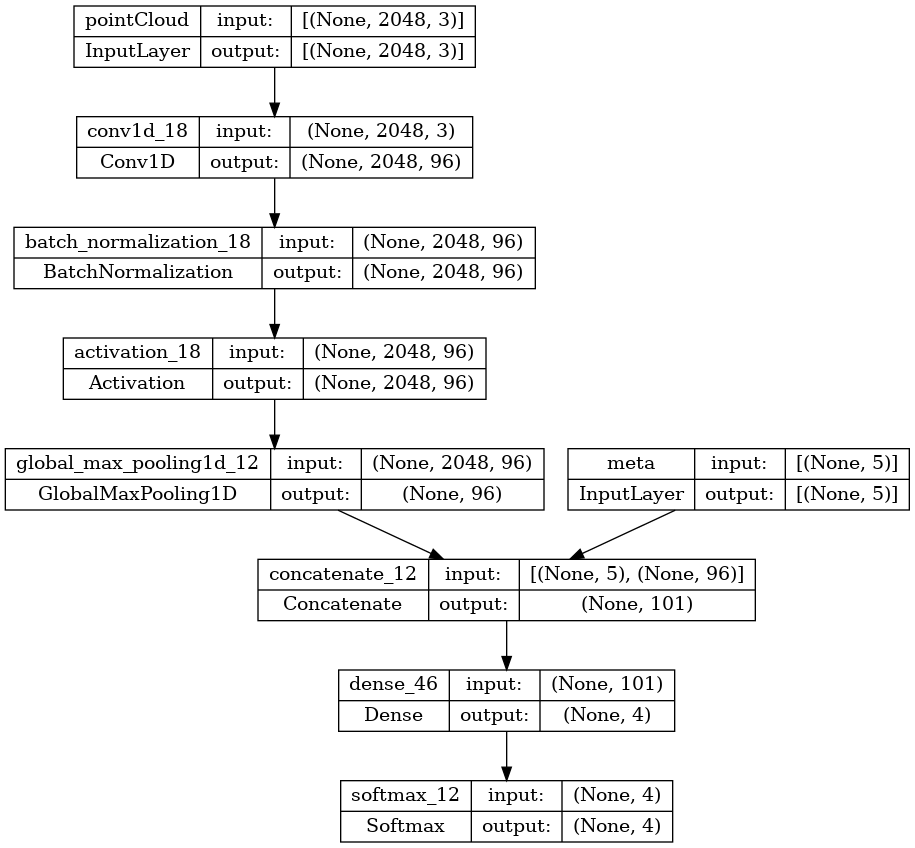

In [51]:
loaded_study = optuna.load_study(study_name='office1_is_test', storage='sqlite:///'+db_path)

best_trial = loaded_study.best_trial
best_model = total_model_builder(best_trial)
keras.utils.plot_model(best_model, show_shapes=True)

In [46]:
import pandas as pd

def plot_history(history:dict, ymax:float=None):
    history_df = pd.DataFrame(history)
    
    loss_df = history_df[["loss", "val_loss"]]
    loss_df.plot()
    plt.xlabel("epochs")
    plt.ylabel("Loss(MSE)")
    if ymax is not None:
        plt.ylim(0., ymax)
    plt.show()

    acc_df = history_df[["acc", "val_acc"]]
    acc_df.plot()
    plt.xlabel("epochs")
    plt.ylabel("Accuracy")
    plt.show()

## チューニングの再現

In [45]:
from keras.callbacks import TensorBoard
import datetime

tb_log_dir = "/mnt/MachineLearning/tblogs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
print("tb_log_dir = ", tb_log_dir)
# db_path = '/mnt/MachineLearning/OptunaLog/optuna_study.db'

"""
チューニング結果を確認するため、改めてチューニング時と同じデータセットで学習
最終テストは行わない
"""
tuning_dict = {}

for test_office in test_office_list:
    print("test_office:", test_office)
    
    val_office_list = [val_office for val_office in test_office_list if val_office != test_office]
    val_office = val_office_list[0]
    train_office_list = [office for office in fit_office_list if office != val_office]
    
    X_dict_train, y_train = get_officeDataset(train_office_list, df_ml, pointCloud_dict,
                                              objective_col="n_from2sec/S_bin", shuffle=True)
    X_dict_val, y_val = get_officeDataset([val_office], df_ml, pointCloud_dict,
                                          objective_col="n_from2sec/S_bin", shuffle=False)
    
    study_name = test_office + '_is_test'

    loaded_study = optuna.load_study(study_name=study_name, storage='sqlite:///'+db_path)

    best_trial = loaded_study.best_trial
    best_model = total_model_builder(best_trial)
    
    print(best_model.summary())
    
    tuning_history = best_model.fit(
        X_dict_train, y_train,
        validation_data = (X_dict_val, y_val),
        epochs = 200,
        batch_size=loaded_study.best_params["batch_size"],
        callbacks = [
            EarlyStopping(monitor='val_loss', min_delta=0.0, patience=10),
            TensorBoard(log_dir=tb_log_dir+"/"+test_office, histogram_freq=1, write_graph=True)
        ],
        # verbose=False,
    )

    tuning_dict[test_office] = {"best_trial":best_trial, "history":tuning_history}


tb_log_dir =  /mnt/MachineLearning/tblogs/20221222-090641
test_office: office1
Model: "predictionnet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 pointCloud (InputLayer)        [(None, 2048, 3)]    0           []                               
                                                                                                  
 conv1d_8 (Conv1D)              (None, 2048, 96)     384         ['pointCloud[0][0]']             
                                                                                                  
 batch_normalization_8 (BatchNo  (None, 2048, 96)    384         ['conv1d_8[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 activa

In [47]:
tb_log_dir

'/mnt/MachineLearning/tblogs/20221222-090641'

In [48]:
%load_ext tensorboard

In [49]:
%tensorboard  --logdir $tb_log_dir

Best trial (test for office1):
  Value: 1.272438144683838
  Params: 
    batch_size: 64
    conv_layers: 1
    dense_layers: 0
    filters_None-0: 96
    lr: 1.9167452826211662e-05


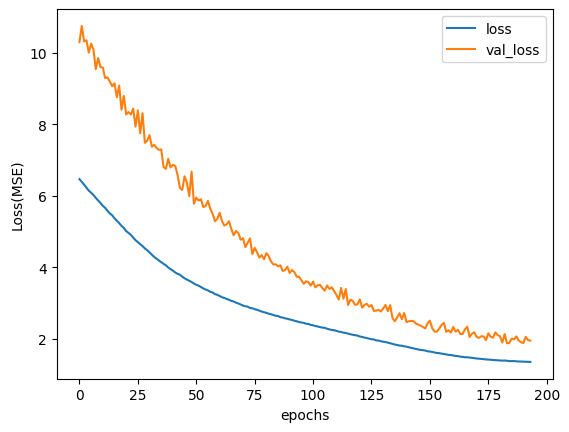

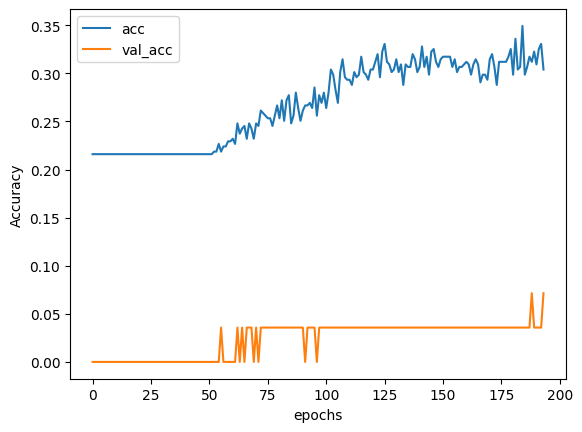

Best trial (test for office7):
  Value: 1.421665072441101
  Params: 
    activation: ReLU
    batch_size: 128
    conv_layers: 1
    dense_layers: 3
    dropout: 0.3
    filters_None-0: 128
    lr: 0.00013725419086486125
    units-0: 384
    units-1: 448
    units-2: 256


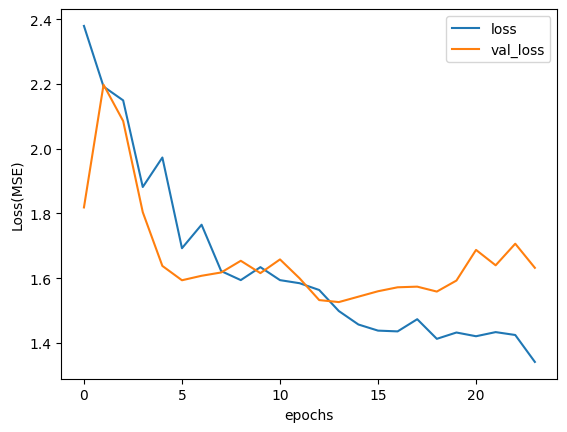

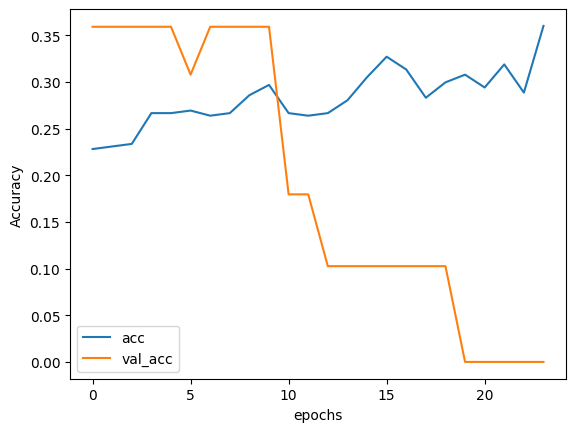

Best trial (test for office10):
  Value: 1.0626015424728394
  Params: 
    activation: ReLU
    batch_size: 128
    conv_layers: 3
    dense_layers: 2
    dropout: 0.5
    filters_None-0: 224
    filters_None-1: 192
    filters_None-2: 64
    lr: 1.0919719983639414e-05
    units-0: 64
    units-1: 384


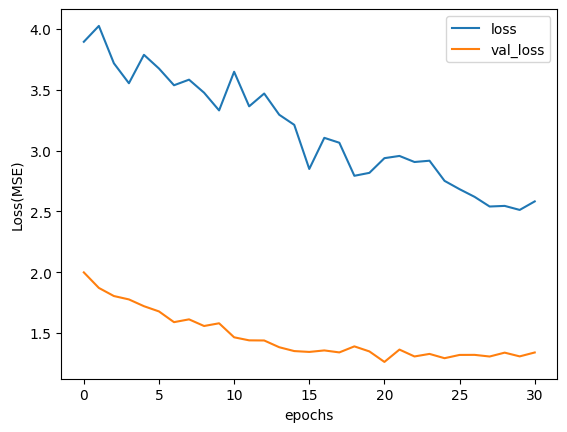

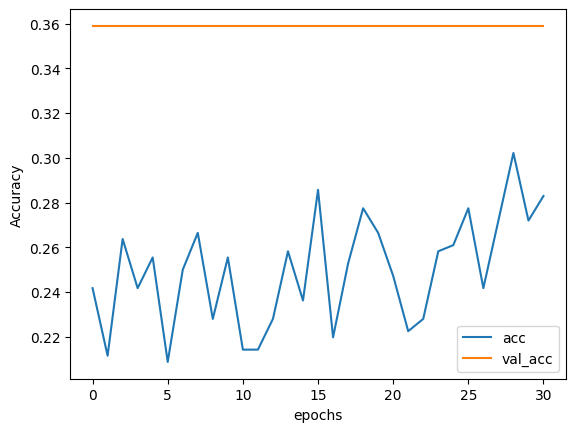

Best trial (test for office16):
  Value: 1.4770532369613647
  Params: 
    batch_size: 128
    conv_layers: 1
    dense_layers: 0
    filters_None-0: 64
    lr: 8.74808256137677e-05


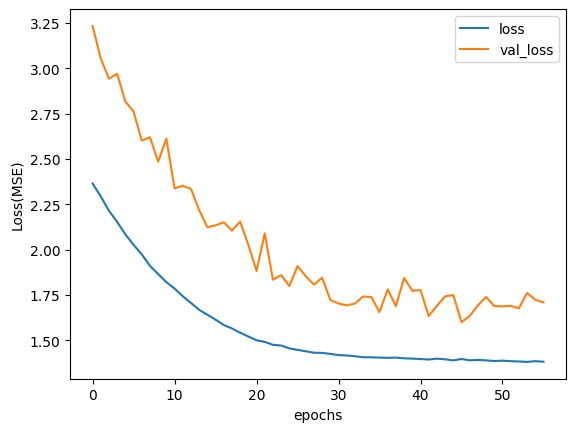

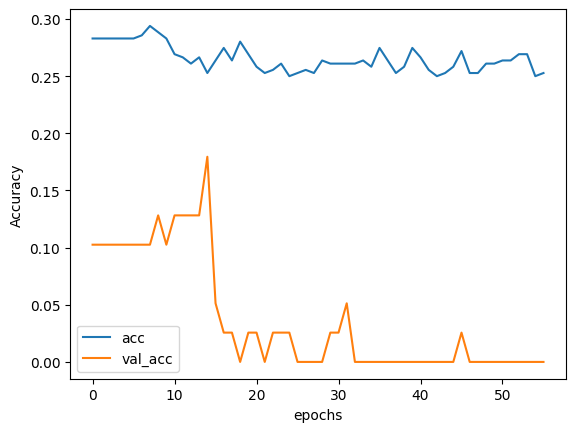

Best trial (test for office22):
  Value: 1.4294862508773805
  Params: 
    activation: ReLU
    batch_size: 32
    conv_layers: 3
    dense_layers: 4
    dropout: 0.5
    filters_None-0: 32
    filters_None-1: 224
    filters_None-2: 192
    lr: 0.0009275004091058049
    units-0: 320
    units-1: 64
    units-2: 320
    units-3: 128


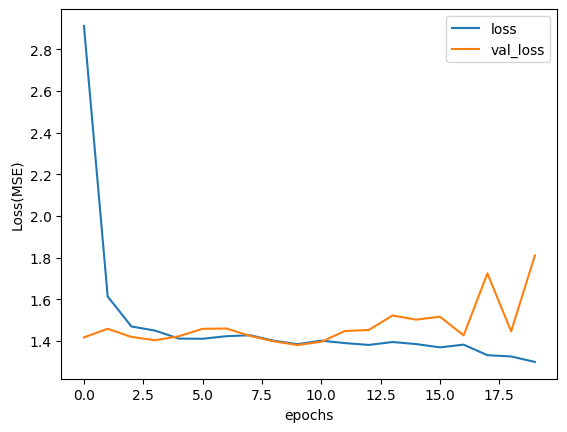

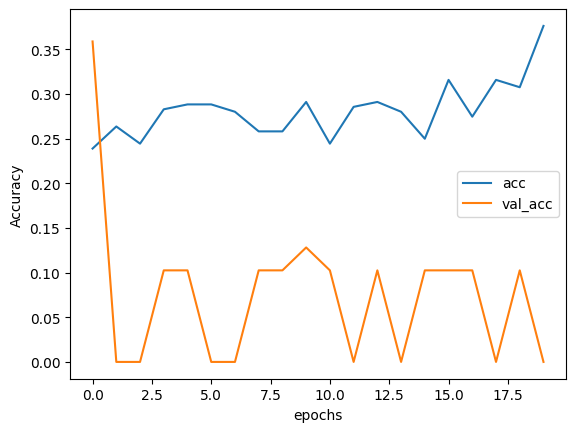

Best trial (test for office28):
  Value: 1.4064196586608886
  Params: 
    activation: ReLU
    batch_size: 64
    conv_layers: 1
    dense_layers: 3
    dropout: 0.5
    filters_None-0: 64
    lr: 0.00013775054997813412
    units-0: 320
    units-1: 64
    units-2: 128


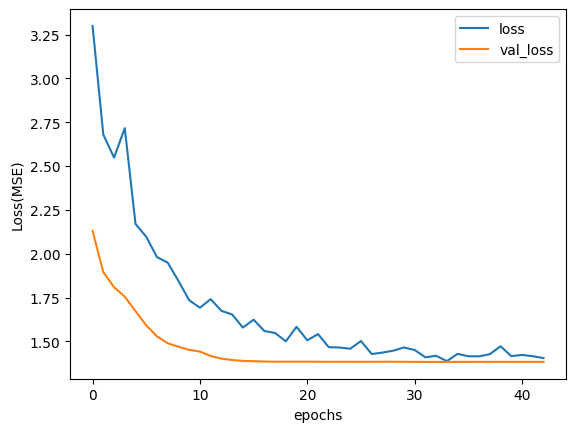

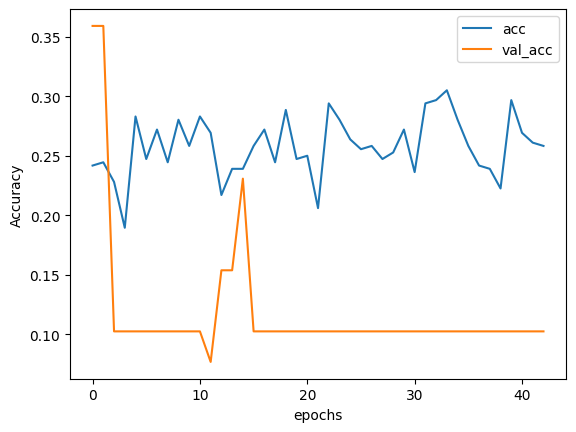

In [50]:
for test_office, result_dict in tuning_dict.items():
    print(f"Best trial (test for {test_office}):")
    best_trial = result_dict["best_trial"]

    print("  Value: {}".format(best_trial.value))

    print("  Params: ")
    for key, value in best_trial.params.items():
        print("    {}: {}".format(key, value))
        
    plot_history(result_dict["history"].history)

## 最終テスト

In [336]:
"""
最終テスト
チューナーに与えなかったオフィスを使って検証
"""

# db_path = '/mnt/MachineLearning/OptunaLog/optuna_study.db'

test_dict = {}

for test_office in test_office_list:
    print("test_office:", test_office)
    fit_office_list = [office for office in office_list if office != test_office]
    
    X_dict_fit, y_fit = get_officeDataset(fit_office_list, df_ml, pointCloud_dict, shuffle=True)
    X_dict_test, y_test = get_officeDataset([test_office], df_ml, pointCloud_dict, shuffle=False)
    
    study_name = test_office + '_is_test'

    loaded_study = optuna.load_study(study_name=study_name, storage='sqlite:///'+db_path)

    best_trial = loaded_study.best_trial
    best_model = total_model_builder(best_trial)

    test_history = best_model.fit(
        X_dict_fit, y_fit,
        batch_size = loaded_study.best_params["batch_size"],
        epochs = 200,
        validation_data = (X_dict_test, y_test),
        # callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.0, patience=20)]
    )
    
    test_dict[test_office] = {"best_trial":best_trial, "history":test_history}


test_office: office1
Epoch 1/200
1/1 [==============================] - 2s 2s/step - loss: 33026.3945 - mae: 179.2634 - val_loss: 37460.8242 - val_mae: 191.9627
Epoch 2/200
1/1 [==============================] - 0s 144ms/step - loss: 32656.3398 - mae: 178.2728 - val_loss: 37082.3828 - val_mae: 190.9747
Epoch 3/200
1/1 [==============================] - 0s 84ms/step - loss: 32523.3672 - mae: 177.8715 - val_loss: 36699.6836 - val_mae: 189.9702
Epoch 4/200
1/1 [==============================] - 0s 85ms/step - loss: 32191.2324 - mae: 177.0160 - val_loss: 36318.2031 - val_mae: 188.9635
Epoch 5/200
1/1 [==============================] - 0s 81ms/step - loss: 31893.7715 - mae: 176.1250 - val_loss: 35943.7891 - val_mae: 187.9703
Epoch 6/200
1/1 [==============================] - 0s 82ms/step - loss: 31642.3184 - mae: 175.3997 - val_loss: 35571.4922 - val_mae: 186.9775
Epoch 7/200
1/1 [==============================] - 0s 83ms/step - loss: 31368.3359 - mae: 174.6447 - val_loss: 35207.0000 - val_

Best trial (test for office1):
  Value: 669.6648010253906
  Params: 
    activation: LeakyReLU
    batch_size: 256
    conv_layers: 3
    dense_layers: 2
    dropout: 0.3
    filters_None-0: 224
    filters_None-1: 128
    filters_None-2: 192
    lr: 3.289682707922679e-05
    units-0: 448
    units-1: 256


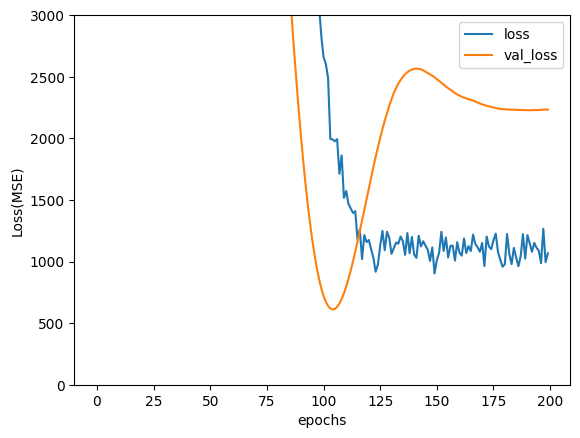

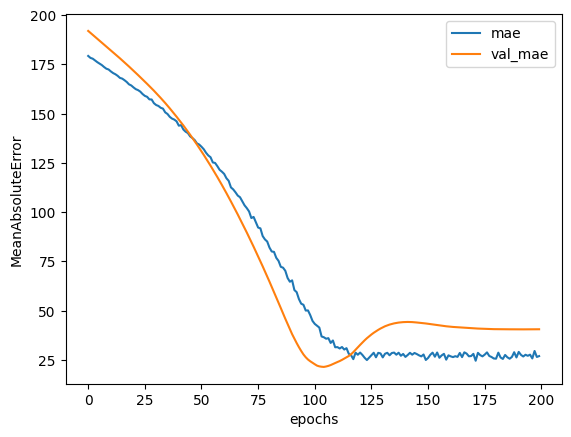

Best trial (test for office2):
  Value: 565.6798583984375
  Params: 
    batch_size: 256
    conv_layers: 2
    dense_layers: 0
    filters_None-0: 224
    filters_None-1: 224
    lr: 0.000398483193859419


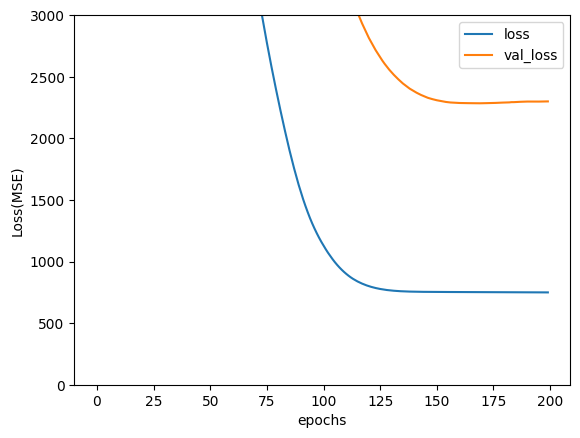

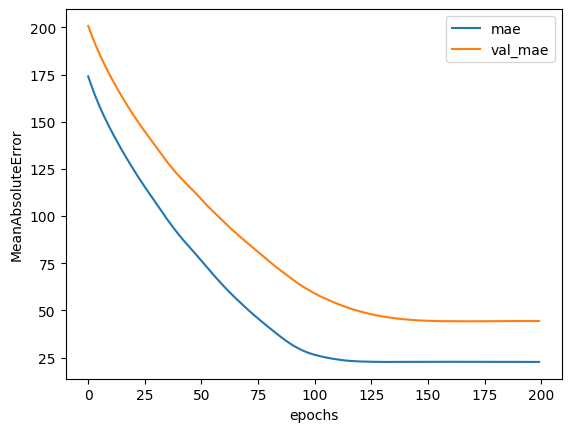

Best trial (test for office3):
  Value: 713.9701507568359
  Params: 
    activation: LeakyReLU
    batch_size: 128
    conv_layers: 1
    dense_layers: 1
    dropout: 0.3
    filters_None-0: 32
    lr: 0.0004244058470088153
    units-0: 384


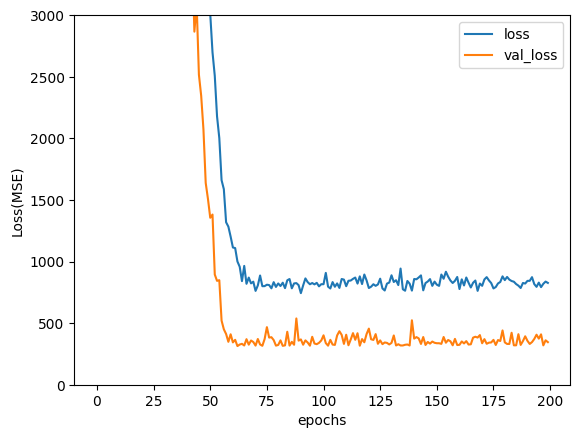

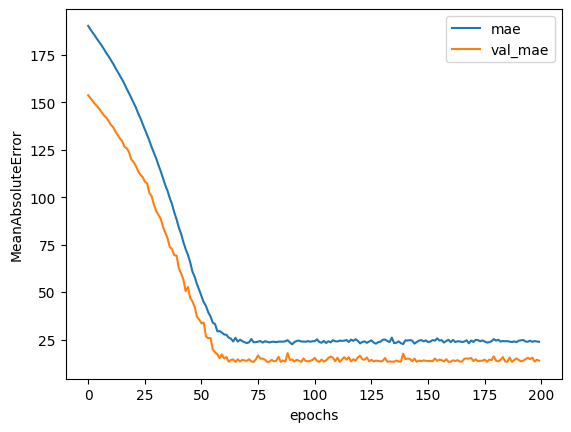

Best trial (test for office4):
  Value: 824.2126525878906
  Params: 
    activation: ReLU
    batch_size: 128
    conv_layers: 1
    dense_layers: 2
    dropout: 0.5
    filters_None-0: 96
    lr: 0.00013132483481858838
    units-0: 320
    units-1: 64


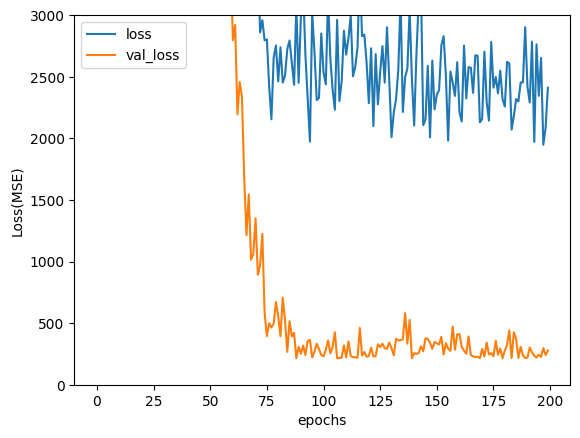

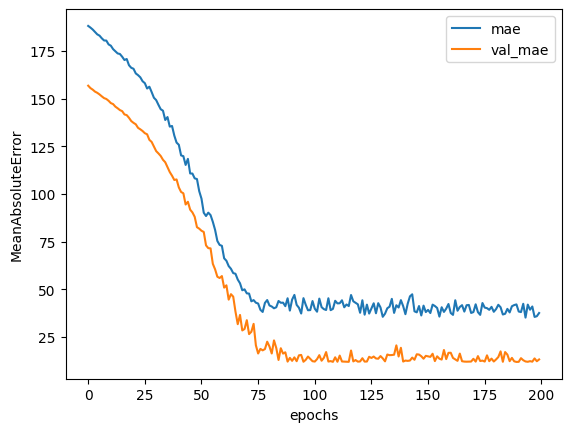

Best trial (test for office5):
  Value: 859.8818054199219
  Params: 
    activation: ELU
    batch_size: 32
    conv_layers: 1
    dense_layers: 1
    dropout: None
    filters_None-0: 256
    lr: 7.733893654961031e-05
    units-0: 448


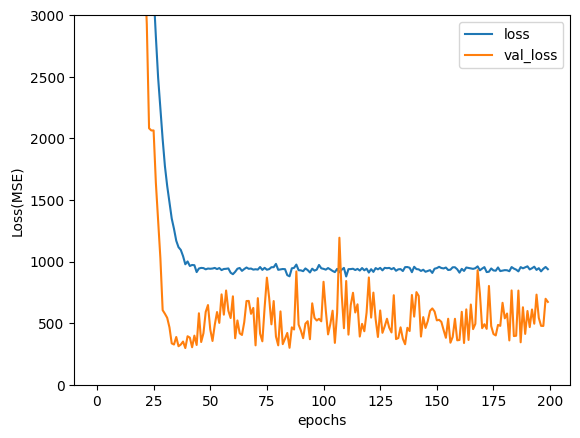

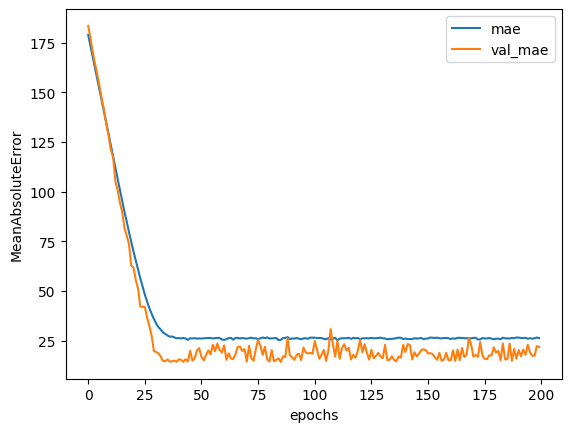

Best trial (test for office6):
  Value: 683.5925750732422
  Params: 
    activation: LeakyReLU
    batch_size: 128
    conv_layers: 1
    dense_layers: 3
    dropout: 0.5
    filters_None-0: 96
    lr: 4.792103265846719e-05
    units-0: 384
    units-1: 448
    units-2: 192


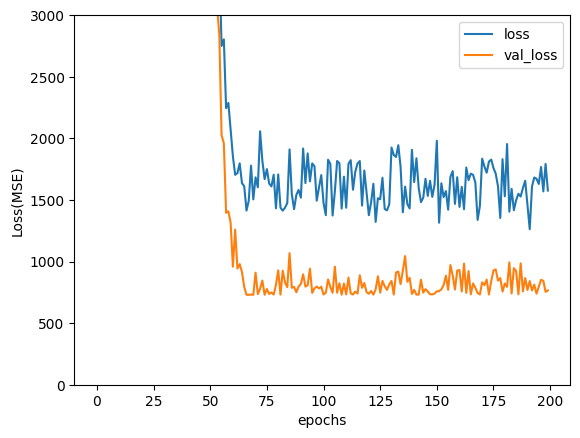

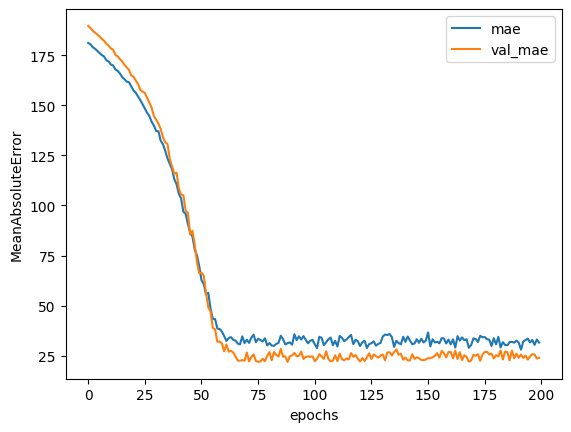

In [338]:
for test_office, result_dict in test_dict.items():
    print(f"Best trial (test for {test_office}):")
    best_trial = result_dict["best_trial"]

    print("  Value: {}".format(best_trial.value))

    print("  Params: ")
    for key, value in best_trial.params.items():
        print("    {}: {}".format(key, value))
        
        
    plot_history(result_dict["history"].history, ymax=3000.)

test_office: office1
Epoch 1/200
1/1 [==============================] - 1s 1s/step - loss: 34108.5938 - mae: 182.2961 - val_loss: 39144.4688 - val_mae: 196.3020
Epoch 2/200
1/1 [==============================] - 0s 88ms/step - loss: 33666.0703 - mae: 181.0462 - val_loss: 38738.5391 - val_mae: 195.2655
Epoch 3/200
1/1 [==============================] - 0s 86ms/step - loss: 33487.6445 - mae: 180.5275 - val_loss: 38330.4297 - val_mae: 194.2176
Epoch 4/200
1/1 [==============================] - 0s 100ms/step - loss: 33118.1797 - mae: 179.5370 - val_loss: 37918.5508 - val_mae: 193.1542
Epoch 5/200
1/1 [==============================] - 0s 79ms/step - loss: 32738.6973 - mae: 178.5599 - val_loss: 37500.2812 - val_mae: 192.0683
Epoch 6/200
1/1 [==============================] - 0s 90ms/step - loss: 32464.3398 - mae: 177.6803 - val_loss: 37085.8789 - val_mae: 190.9864
Epoch 7/200
1/1 [==============================] - 0s 81ms/step - loss: 32255.6172 - mae: 177.1651 - val_loss: 36664.9688 - val_

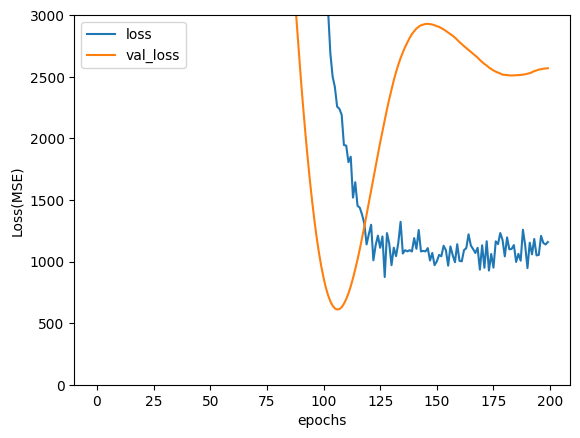

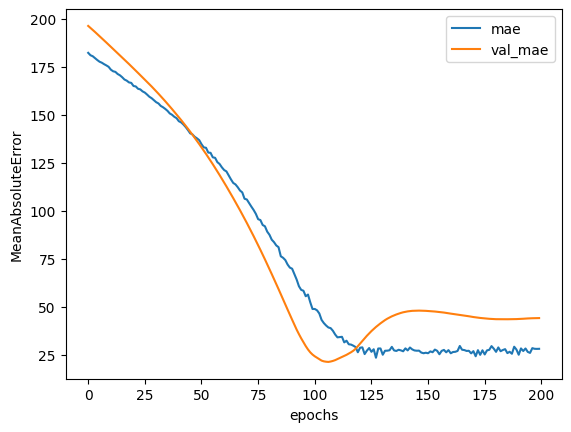

In [339]:
"""
最終テスト
only office1
"""

test_office="office1"

print("test_office:", test_office)
fit_office_list = [office for office in office_list if office != test_office]
    
X_dict_fit, y_fit = get_officeDataset(fit_office_list, df_ml, pointCloud_dict, shuffle=True)
X_dict_test, y_test = get_officeDataset([test_office], df_ml, pointCloud_dict, shuffle=False)

study_name = test_office + '_is_test'

loaded_study = optuna.load_study(study_name=study_name, storage='sqlite:///'+db_path)

best_trial = loaded_study.best_trial
best_model = total_model_builder(best_trial)

test_history = best_model.fit(
    X_dict_fit, y_fit,
    batch_size = loaded_study.best_params["batch_size"],
    epochs = 200,
    validation_data = (X_dict_test, y_test),
    # callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.0, patience=20)]
)

print("  Value: {}".format(best_trial.value))

print("  Params: ")
for key, value in best_trial.params.items():
    print("    {}: {}".format(key, value))

plot_history(test_history.history, ymax=3000.)

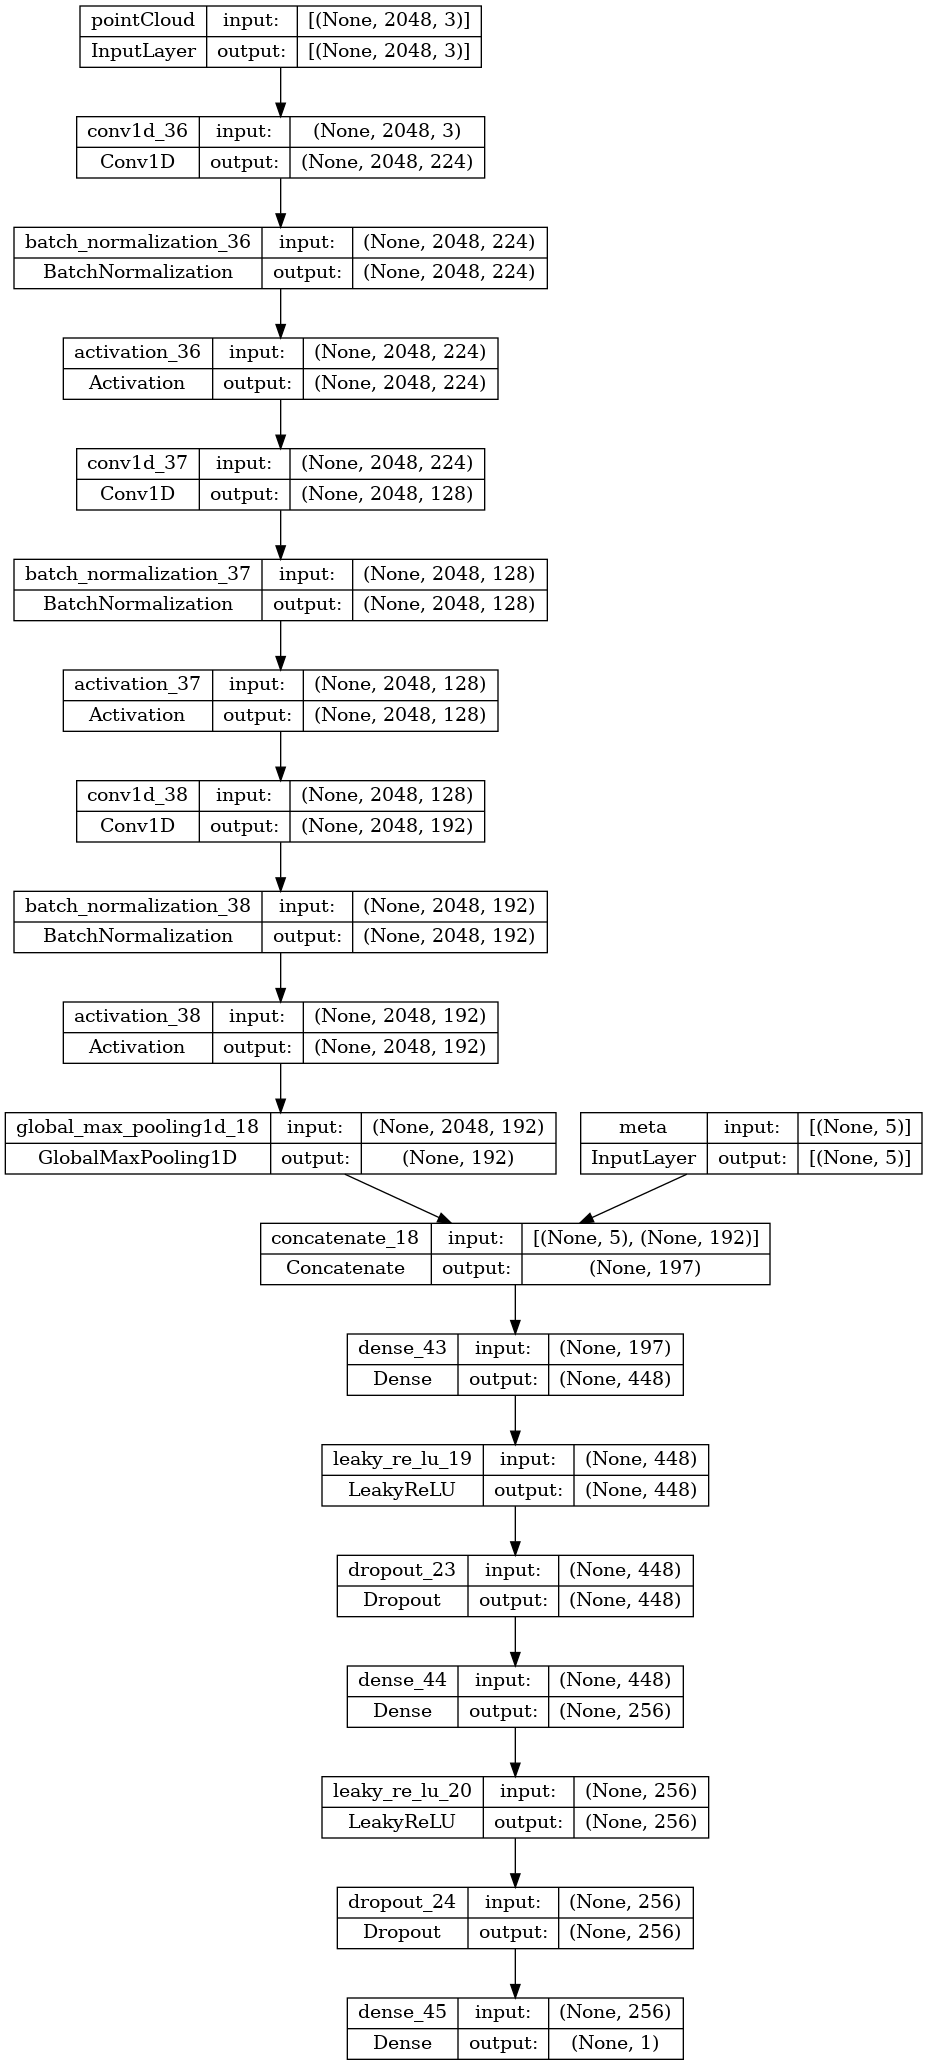

In [340]:
keras.utils.plot_model(best_model, show_shapes=True)

In [341]:
y_fit_pred = best_model.predict(X_dict_fit)
y_test_pred = best_model.predict(X_dict_test)

2/2 [==============================] - 0s 4ms/step


In [342]:
X_dict_fit

{'meta':                         aircon  ventilation  exhaust_a  exhaust_b  exhaust_off
 case_name                                                                     
 office3_660_246_aout  0.446455     1.265523   1.147695  -0.871311    -0.398249
 office4_0_246_aout   -1.384552     1.265523   1.147695  -0.871311    -0.398249
 office2_360_0        -0.385821    -1.666952  -0.871311  -0.871311     2.510993
 office3_960_164_aout  1.278731     0.288031   1.147695  -0.871311    -0.398249
 office5_360_164_aout -0.385821     0.288031   1.147695  -0.871311    -0.398249
 ...                        ...          ...        ...        ...          ...
 office2_360_164_bout -0.385821     0.288031  -0.871311   1.147695    -0.398249
 office5_660_82_aout   0.446455    -0.689460   1.147695  -0.871311    -0.398249
 office4_360_246_bout -0.385821     1.265523  -0.871311   1.147695    -0.398249
 office6_0_82_aout    -1.384552    -0.689460   1.147695  -0.871311    -0.398249
 office3_660_82_aout   0.446455 

In [343]:
def show_office_residual_plot(train_x, train_y, test_x, test_y, office_array, figsize=[10, 8]):
    xlim = [min(min(train_x), min(test_x))-5, max(max(train_x), max(test_x))+5]
    fig= plt.figure(figsize=figsize)

    plt.figure(figsize=[10, 8])

    #カラーマップ等の準備
    markers = ("s", "x", "o", "^", "v", "<", ">", "1", "2", "3", "4", "8")
    colors = ("red", "blue", "limegreen", "gray", "cyan", "black", "purple", "green",
              "orange", "yellow", "crimson", "goldenrod", "orchid", "khaki", "darkgray")

    idx = 0
    for target_office_name in np.unique(office_list):
        if target_office_name == "office10":
            continue
            
        target_office_index = [i for i in range(len(office_array)) if target_office_name+"_" in office_array[i]]
        print(target_office_name, len(target_office_index))
        
        plt.scatter(train_x[target_office_index], train_y[target_office_index], 
                    s=80, c=colors[idx], marker=markers[2], edgecolor="white", label="Training:"+target_office_name)
        
        idx+=1
        
    plt.scatter(test_x, test_y, s=80, c="steelblue", marker="x", edgecolor="white", label="Test data")
    plt.xlabel("Predicted values")
    plt.ylabel("Residuals")
    plt.legend(loc="best")
    plt.hlines(y=0, xmin=xlim[0], xmax=xlim[1], color="black", lw=2)
    plt.xlim(xlim)
    plt.tight_layout()
    plt.show()

In [344]:
y_fit.to_numpy().shape

(140,)

In [345]:
X_dict_fit["meta"].index

Index(['office3_660_246_aout', 'office4_0_246_aout', 'office2_360_0',
       'office3_960_164_aout', 'office5_360_164_aout', 'office2_960_82_bout',
       'office6_660_82_aout', 'office6_960_246_bout', 'office6_360_246_aout',
       'office2_360_164_aout',
       ...
       'office5_0_246_bout', 'office4_660_0', 'office5_0_246_aout',
       'office3_360_164_aout', 'office2_960_0', 'office2_360_164_bout',
       'office5_660_82_aout', 'office4_360_246_bout', 'office6_0_82_aout',
       'office3_660_82_aout'],
      dtype='object', name='case_name', length=140)

office1 0
office2 28
office3 28
office4 28
office5 28
office6 28


/tmp/ipykernel_745275/113909597.py:25: UserWarning: You passed a edgecolor/edgecolors ('white') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(test_x, test_y, s=80, c="steelblue", marker="x", edgecolor="white", label="Test data")


<Figure size 1000x800 with 0 Axes>

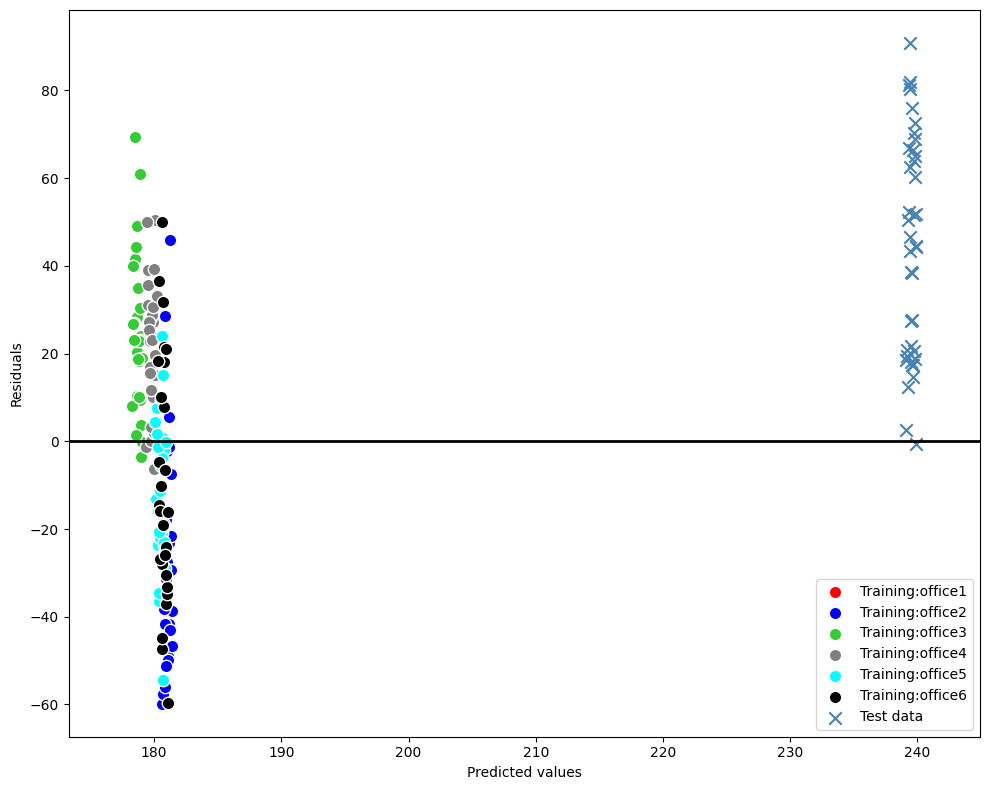

In [346]:
# #正規表現で書いており、.extractはパターンにマッチした最初の文字列のみを抜き出す。office+0-9までの数字1桁または2桁を探索
# office_array = X_index.str.extract("(office+[0-9]{1,2})").to_numpy()

#残差プロット
show_office_residual_plot(train_x=y_fit_pred, train_y=y_fit_pred - y_fit.to_numpy().reshape((-1,1)), 
                            test_x=y_test_pred, test_y=y_test_pred - y_test.to_numpy().reshape((-1,1)), 
                            office_array=X_dict_fit["meta"].index
                                  )

In [133]:
X_dict_fit

{'meta': array([[-1.38455178,  1.2655225 , -0.87131147,  1.14769521, -0.39824886],
        [ 1.27873108,  1.2655225 ,  1.14769521, -0.87131147, -0.39824886],
        [-1.38455178,  1.2655225 ,  1.14769521, -0.87131147, -0.39824886],
        ...,
        [ 0.44645519,  1.2655225 , -0.87131147,  1.14769521, -0.39824886],
        [ 1.27873108, -0.68946029, -0.87131147,  1.14769521, -0.39824886],
        [ 0.44645519, -1.66695169, -0.87131147, -0.87131147,  2.51099278]]),
 'pointCloud_aircon': array([[[ 1.3765091 , -2.0106473 , -0.52029866],
         [ 1.3765091 , -1.8412895 , -0.52029866],
         [ 1.3765091 , -1.7396748 , -0.52029866],
         ...,
         [ 2.7313716 , -0.92675734, -0.52029866],
         [ 2.7313716 , -0.8251426 , -0.52029866],
         [ 2.7313716 , -0.6557848 , -0.52029866]],
 
        [[-0.6557848 , -0.99450046, -0.52029866],
         [-0.6557848 , -0.8251426 , -0.52029866],
         [-0.6557848 , -0.72352785, -0.52029866],
         ...,
         [ 0.6990778 ,  0

In [78]:
import gc
 
gc.collect()

8887

In [79]:
from keras.backend import clear_session

# Clear clutter from previous Keras session graphs.
clear_session()